# Azoospermia Data Integration

In [1]:
# libraries
suppressMessages(library(dplyr))
suppressMessages(library(Seurat))
suppressMessages(library(Matrix))
suppressMessages(library(gplots))
suppressMessages(library(ggplot2))
suppressMessages(library(openxlsx))
suppressMessages(library(cowplot))
suppressMessages(library(patchwork))
suppressMessages(library(repr))
suppressMessages(library(cowplot))
suppressMessages(library("viridis"))
suppressMessages(library('pals'))
suppressMessages(library("viridis"))
suppressMessages(library(RColorBrewer))
suppressMessages(library(wesanderson))

library(magick)
#library(Venn)

Linking to ImageMagick 6.9.9.39
Enabled features: cairo, fontconfig, freetype, lcms, pango, rsvg, webp
Disabled features: fftw, ghostscript, x11



In [2]:
#Work directory
setwd("/Users/tascini.annasofia/ctgb_cluster_root/lustre2/scratch/bioinfotree/common/bioinfotree/prj/AlfanoM_904_infertilita_epigenetics/dataset/20200110/seraut")

In [3]:
outdir = '/Users/tascini.annasofia/Dropbox (HSR Global)/Alfano_904_paperDraft/NewPlots/'

Load data previosly produced

In [ ]:
# load variable saved in seurat_script.R
## raw matrixes imported as Seraut 
load('pz.198.raw')
load('pz.205.raw')
load('pz.204sx.raw.polished')
#load('NEW_pz_204sx/pz.204sx.raw')

In [ ]:
pz.204sx.raw <- pz.204sx.raw.polished

In [6]:
# load custom functions
source('/Users/tascini.annasofia/ctgb_cluster_root/lustre2/scratch/bioinfotree/common/bioinfotree/prj/AlfanoM_904_infertilita_epigenetics/local/src/mySeuratfunctions.R')

In [7]:
#brewer.pal(9, 'Oranges')[2:9]
colors_Alf <- data.frame(celltype = c("SSCs","Differentiated S'gonia",
                                      "Early primary S'cytes",
                                      "Late primary S'cyte",
                                      "Round S'tidis",
                                      "Elong. S'tidis S1",
                                      "Elong. S'tidis S2",
                                      "Sperm",
                                      "Sperm1",
                                      "Sperm2",
                                      "Primary S'cytes",
                                      "LEY",
                                      "MYD",
                                      "SRT",
                                      "MCR",
                                      "TCL",
                                      "END",
                                     "STRO",
                                     "UND",
                                     "UN3"), 
                        cols = c(brewer.pal(9, 'Oranges')[2:9],
                                 '#932F04',
                                 '#7F2704',
                                 '#FD9E54',
                                 '#E41A1C', #L
                                 '#3399FF', #M
                                 '#FFCC33', #S
                                 '#9900FF', #M
                                 '#FF33CC', #Tcell
                                 '#4DAF4A',
                                'cadetblue2',
                                '#999999',
                                'grey'))
rownames(colors_Alf) <- colors_Alf$celltype

# Integration

In [8]:
#metadata
pz.198.raw$sample <- 'pz198'
pz.204sx.raw$sample <- 'pz204sx'
pz.205.raw$sample <- 'pz205'
pz.198.raw <- RenameCells(pz.198.raw, add.cell.id = 'pz198_')
pz.204sx.raw <- RenameCells(pz.204sx.raw, add.cell.id = 'pz204sx_')
pz.205.raw <- RenameCells(pz.205.raw, add.cell.id = 'pz205_')

In [9]:
mean(c(mean(Matrix::colSums(pz.198.raw, slot = 'counts')),
mean(Matrix::colSums(pz.204sx.raw, slot = 'counts')),
mean(Matrix::colSums(pz.205.raw, slot = 'counts'))))

merge1 = merge(pz.198.raw, pz.204sx.raw)
merge = merge(merge1, pz.205.raw)
summary(colSums(GetAssayData(object = pz.198.raw, slot = "counts")>0))
summary(colSums(GetAssayData(object = pz.204sx.raw, slot = "counts")>0))
summary(colSums(GetAssayData(object = pz.205.raw, slot = "counts")>0))
summary(colSums(GetAssayData(object = merge, slot = "counts")>0))
summary(colSums(GetAssayData(object = azoospermia.integrated.new, slot = "counts")>0))
summary( Matrix::colSums(azoospermia.integrated.new, slot = 'counts'))

[1] 7005.499

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  108.0   460.5  2175.0  2062.2  3228.5  9897.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     48     165    1134    2088    4108    8362 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     48      62     300    1376    3069    8917 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   48.0   267.8  1560.0  1924.0  3303.0  9897.0 

ERROR: Error in GetAssayData(object = azoospermia.integrated.new, slot = "counts"): object 'azoospermia.integrated.new' not found


In [ ]:
n.reads = Matrix::colSums(azoospermia.integrated.new, slot = 'counts')
mean(n.reads)
mean(n.reads[grepl("198",names(n.genes))])
mean(n.reads[grepl("204",names(n.genes))])
mean(n.reads[grepl("205",names(n.genes))])

n.genes=colSums(GetAssayData(object = azoospermia.integrated.new, slot = "counts")>0)
mean(n.genes)
mean(n.genes[grepl("198",names(n.genes))])
mean(n.genes[grepl("204",names(n.genes))])
mean(n.genes[grepl("205",names(n.genes))])

In [10]:
# list creation
azoospermia.list <- list(pz.198.raw, pz.204sx.raw, pz.205.raw)
names(azoospermia.list) <- c('pz198', 'pz204sx','pz205')
print("input_samples:")
print(azoospermia.list)

[1] "input_samples:"
$pz198
An object of class Seurat 
26427 features across 4995 samples within 1 assay 
Active assay: RNA (26427 features, 0 variable features)

$pz204sx
An object of class Seurat 
18808 features across 1091 samples within 1 assay 
Active assay: RNA (18808 features, 0 variable features)

$pz205
An object of class Seurat 
18770 features across 1586 samples within 1 assay 
Active assay: RNA (18770 features, 0 variable features)



Prior to finding anchors, we perform standard preprocessing (log-normalization), and identify variable features individually for each. Note that Seurat v3 implements an improved method for variable feature selection based on a variance stabilizing transformation ("vst")

In [11]:
#### Use the same filtering for all the patients

min_nFeature_RNA = 500
max_nFeature_RNA = 6500
max_percent_MT = 20

for (i in 1:length(azoospermia.list)) {
    
    azoospermia.list[[i]][["percent.mt"]] <- PercentageFeatureSet(azoospermia.list[[i]], pattern = "^MT-")
    azoospermia.list[[i]] <-  subset(azoospermia.list[[i]],
                                     subset = nFeature_RNA > min_nFeature_RNA & nFeature_RNA < max_nFeature_RNA & percent.mt < max_percent_MT)
    azoospermia.list[[i]] <- NormalizeData(azoospermia.list[[i]], 
                                           verbose = FALSE)
    azoospermia.list[[i]] <- FindVariableFeatures(azoospermia.list[[i]], 
                                                  selection.method = 'vst',
                                                  nfeatures = 2000,
                                                  verbose = FALSE)
}
print("samples after QC filters")
print(azoospermia.list)

[1] "samples after QC filters"
$pz198
An object of class Seurat 
26427 features across 2838 samples within 1 assay 
Active assay: RNA (26427 features, 2000 variable features)

$pz204sx
An object of class Seurat 
18808 features across 492 samples within 1 assay 
Active assay: RNA (18808 features, 2000 variable features)

$pz205
An object of class Seurat 
18770 features across 550 samples within 1 assay 
Active assay: RNA (18770 features, 2000 variable features)



Warning message:
“Adding a command log without an assay associated with it”
Warning message:
“The following features are not present in the object: MLF1IP, RRM2, CDC45, EXO1, E2F8, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: MKI67, AURKB, HJURP, CDC25C, CENPA, not searching for symbol synonyms”
Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:57:53 UMAP embedding parameters a = 0.9922 b = 1.112

14:57:53 Read 3880 rows and found 20 numeric columns

14:57:53 Using Annoy for neighbor search, n_neighbors = 30

14:57:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*

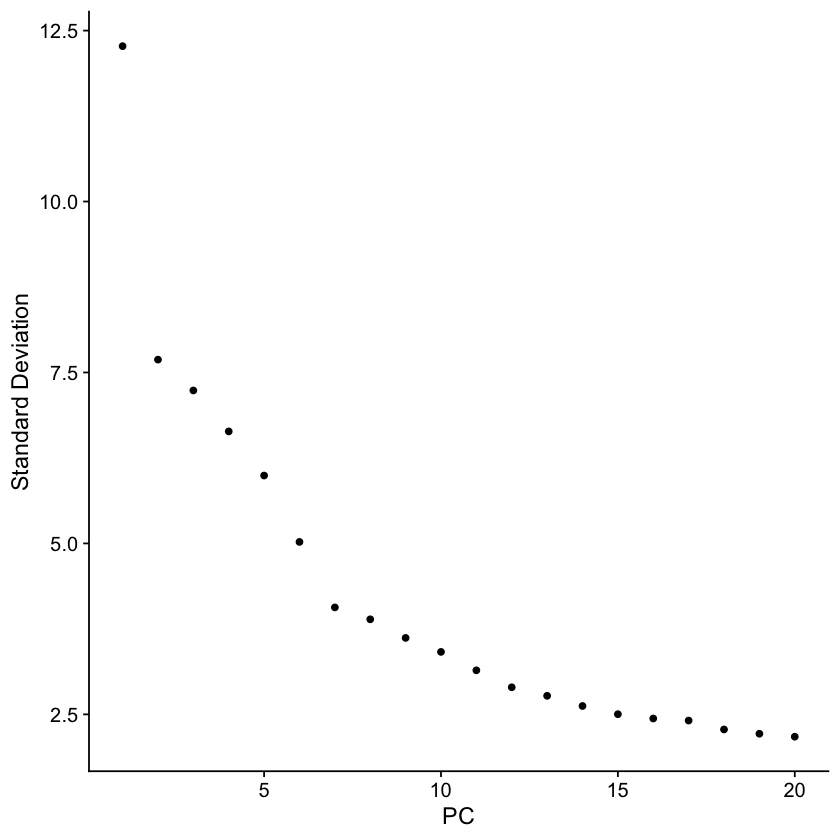

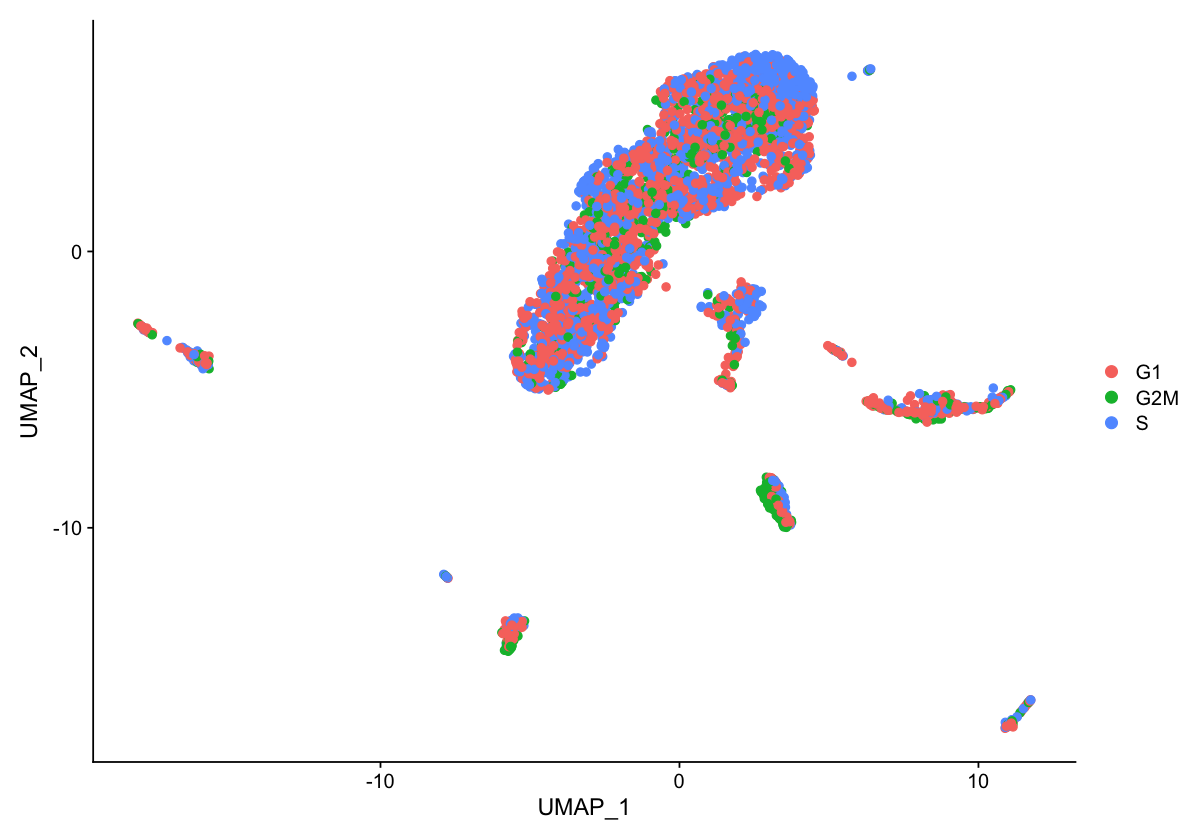

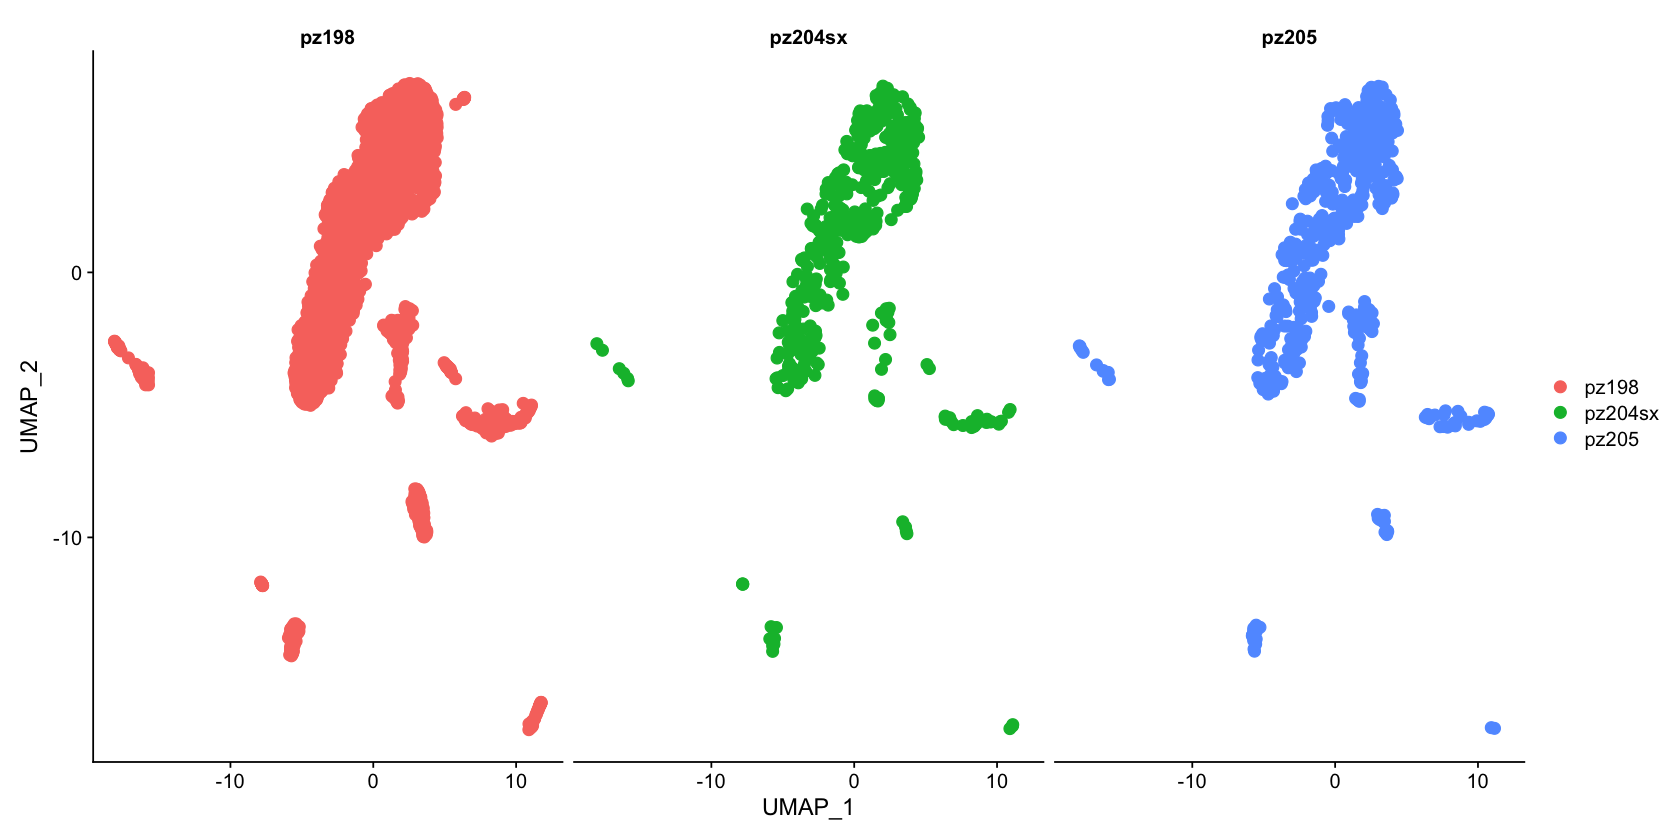

In [12]:
# integration
azoospermia.anchors <- FindIntegrationAnchors(object.list = azoospermia.list, dims = 1:30, verbose = FALSE)
azoospermia.integrated <- IntegrateData(anchorset = azoospermia.anchors, dims = 1:30, verbose = FALSE)

DefaultAssay(azoospermia.integrated) <- "RNA"
all.genes <- row.names(azoospermia.integrated)

# Regress for Cell Cycle
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
azoospermia.integrated <- CellCycleScoring(azoospermia.integrated, 
                                           s.features = s.genes, 
                                           g2m.features = g2m.genes, 
                                           set.ident = TRUE,
                                           verbose  = FALSE)

# switch to integrated assay. 
# The variable features of this assay are automatically set during IntegrateData
DefaultAssay(azoospermia.integrated) <- "integrated"

# Run the standard workflow for visualization and clustering

# SCALE and regress data
azoospermia.integrated <- ScaleData(azoospermia.integrated, 
                                    verbose = FALSE, 
                                    vars.to.regress = c("percent.mt", "nFeature_RNA"), 
                                    features = all.genes)

azoospermia.integrated <- ScaleData(azoospermia.integrated,
                                    verbose  = FALSE,
                                    vars.to.regress = c("S.Score", "G2M.Score"), 
                                    features = all.genes) 

azoospermia.integrated <- RunPCA(azoospermia.integrated, npcs = 30, verbose = FALSE)
options(repr.plot.width=7, repr.plot.height=7)

ElbowPlot(azoospermia.integrated)

azoospermia.integrated <- RunUMAP(azoospermia.integrated, reduction = "pca", dims = 1:20, verbose  = T)
options(repr.plot.width=10, repr.plot.height=7)
DimPlot(azoospermia.integrated, reduction = "umap", pt.size = 2)
options(repr.plot.width=14, repr.plot.height=7)
DimPlot(azoospermia.integrated, reduction = "umap", pt.size = 3, split.by = 'sample', group.by = 'sample')

# Clustering integration

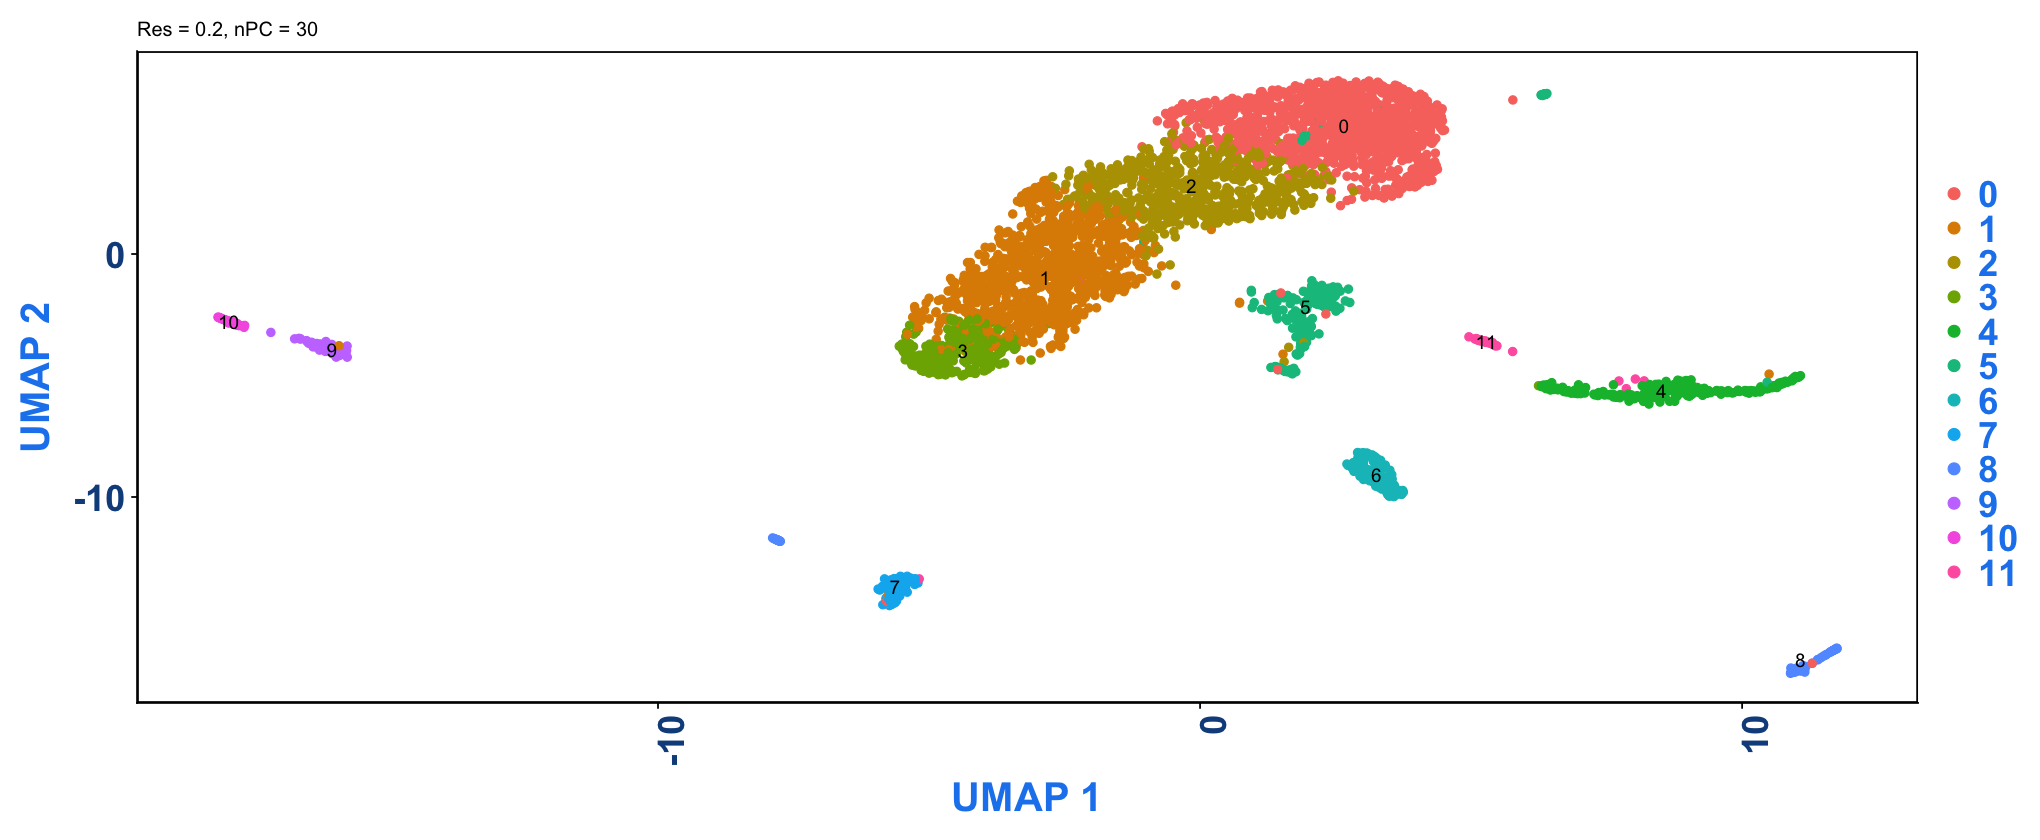

In [13]:
res = 0.5
nPC = 20
azoospermia.integrated <- FindNeighbors(azoospermia.integrated, dims = 1:nPC, verbose  = FALSE)
azoospermia.integrated <- FindClusters(azoospermia.integrated, resolution = res, verbose  = FALSE)
azoospermia.integrated <- RunUMAP(azoospermia.integrated, dims = 1:nPC, verbose  = FALSE)
azoospermia.integrated <- RunTSNE(azoospermia.integrated, dims = 1:nPC, verbose  = FALSE)
options(repr.plot.width=17, repr.plot.height=7)
p1 = DimPlot(azoospermia.integrated, reduction = "umap", label = T, pt.size = 2) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 
p1

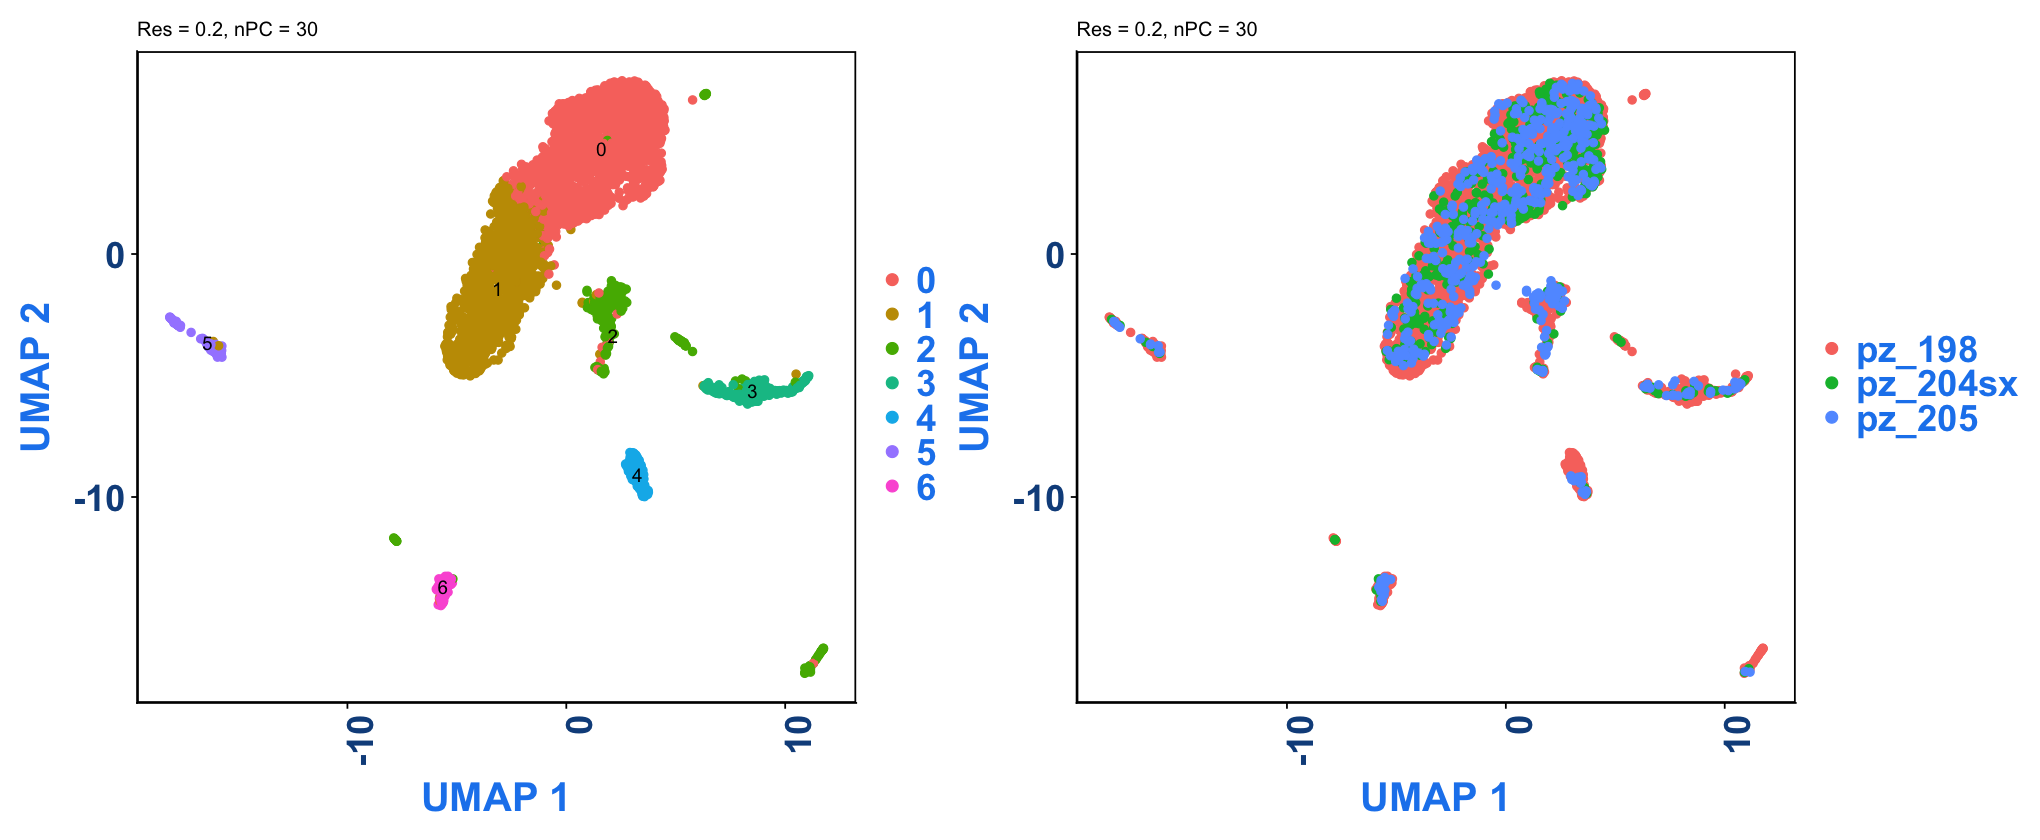

In [14]:
res = 0.2
nPC = 20
azoospermia.integrated <- FindNeighbors(azoospermia.integrated, dims = 1:nPC, verbose  = FALSE)
azoospermia.integrated <- FindClusters(azoospermia.integrated, resolution = res , verbose  = FALSE)
azoospermia.integrated <- RunUMAP(azoospermia.integrated, dims = 1:nPC, verbose  = FALSE)
azoospermia.integrated <- RunTSNE(azoospermia.integrated, dims = 1:nPC, verbose  = FALSE)
options(repr.plot.width=17, repr.plot.height=7)
p1 = DimPlot(azoospermia.integrated, reduction = "umap", label = T, pt.size = 2) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 
p2 = DimPlot(azoospermia.integrated, reduction = "umap", group.by = 'orig.ident',label = F, pt.size = 2) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 


p1 | p2

[1] 0.1


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3880
Number of edges: 144895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9487
Number of communities: 7
Elapsed time: 0 seconds


16:16:38 UMAP embedding parameters a = 0.9922 b = 1.112

16:16:38 Read 3880 rows and found 20 numeric columns

16:16:38 Using Annoy for neighbor search, n_neighbors = 30

16:16:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:16:39 Writing NN index file to temp file /var/folders/3c/v7x37fdj30g6366675kvdg5rdlczmc/T//RtmpswV2dr/file117be3dfd92

16:16:39 Searching Annoy index using 1 thread, search_k = 3000

16:16:41 Annoy recall = 100%

16:16:41 Commencing smooth kNN distance calibration using 1 thread

16:16:41 Initializing from normalized Laplacian + noise

16:16:42 Commencing optimization for 500 epochs, with 160504 positive edges

16:16:48 Optimization finished



[1] 0.2


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3880
Number of edges: 144895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9183
Number of communities: 7
Elapsed time: 0 seconds


16:16:49 UMAP embedding parameters a = 0.9922 b = 1.112

16:16:49 Read 3880 rows and found 20 numeric columns

16:16:49 Using Annoy for neighbor search, n_neighbors = 30

16:16:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:16:50 Writing NN index file to temp file /var/folders/3c/v7x37fdj30g6366675kvdg5rdlczmc/T//RtmpswV2dr/file117b23c7f228

16:16:50 Searching Annoy index using 1 thread, search_k = 3000

16:16:51 Annoy recall = 100%

16:16:51 Commencing smooth kNN distance calibration using 1 thread

16:16:52 Initializing from normalized Laplacian + noise

16:16:52 Commencing optimization for 500 epochs, with 160504 positive edges

16:16:58 Optimization finished



[1] 0.3


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3880
Number of edges: 144895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8957
Number of communities: 10
Elapsed time: 0 seconds


16:16:59 UMAP embedding parameters a = 0.9922 b = 1.112

16:16:59 Read 3880 rows and found 20 numeric columns

16:16:59 Using Annoy for neighbor search, n_neighbors = 30

16:16:59 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:17:00 Writing NN index file to temp file /var/folders/3c/v7x37fdj30g6366675kvdg5rdlczmc/T//RtmpswV2dr/file117b7ae69976

16:17:00 Searching Annoy index using 1 thread, search_k = 3000

16:17:01 Annoy recall = 100%

16:17:02 Commencing smooth kNN distance calibration using 1 thread

16:17:02 Initializing from normalized Laplacian + noise

16:17:02 Commencing optimization for 500 epochs, with 160504 positive edges

16:17:09 Optimization finished



[1] 0.4


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3880
Number of edges: 144895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8741
Number of communities: 12
Elapsed time: 0 seconds


16:17:10 UMAP embedding parameters a = 0.9922 b = 1.112

16:17:10 Read 3880 rows and found 20 numeric columns

16:17:10 Using Annoy for neighbor search, n_neighbors = 30

16:17:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:17:11 Writing NN index file to temp file /var/folders/3c/v7x37fdj30g6366675kvdg5rdlczmc/T//RtmpswV2dr/file117b559b5ec5

16:17:11 Searching Annoy index using 1 thread, search_k = 3000

16:17:12 Annoy recall = 100%

16:17:12 Commencing smooth kNN distance calibration using 1 thread

16:17:13 Initializing from normalized Laplacian + noise

16:17:13 Commencing optimization for 500 epochs, with 160504 positive edges

16:17:19 Optimization finished



[1] 0.5


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3880
Number of edges: 144895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8565
Number of communities: 12
Elapsed time: 0 seconds


16:17:20 UMAP embedding parameters a = 0.9922 b = 1.112

16:17:20 Read 3880 rows and found 20 numeric columns

16:17:20 Using Annoy for neighbor search, n_neighbors = 30

16:17:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:17:21 Writing NN index file to temp file /var/folders/3c/v7x37fdj30g6366675kvdg5rdlczmc/T//RtmpswV2dr/file117b70a6c8be

16:17:21 Searching Annoy index using 1 thread, search_k = 3000

16:17:22 Annoy recall = 100%

16:17:22 Commencing smooth kNN distance calibration using 1 thread

16:17:23 Initializing from normalized Laplacian + noise

16:17:23 Commencing optimization for 500 epochs, with 160504 positive edges

16:17:29 Optimization finished



[1] 0.6


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3880
Number of edges: 144895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8406
Number of communities: 13
Elapsed time: 0 seconds


16:17:30 UMAP embedding parameters a = 0.9922 b = 1.112

16:17:30 Read 3880 rows and found 20 numeric columns

16:17:30 Using Annoy for neighbor search, n_neighbors = 30

16:17:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:17:31 Writing NN index file to temp file /var/folders/3c/v7x37fdj30g6366675kvdg5rdlczmc/T//RtmpswV2dr/file117b1b2ead30

16:17:31 Searching Annoy index using 1 thread, search_k = 3000

16:17:33 Annoy recall = 100%

16:17:33 Commencing smooth kNN distance calibration using 1 thread

16:17:33 Initializing from normalized Laplacian + noise

16:17:33 Commencing optimization for 500 epochs, with 160504 positive edges

16:17:40 Optimization finished



[1] 0.7


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3880
Number of edges: 144895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8257
Number of communities: 13
Elapsed time: 0 seconds


16:17:41 UMAP embedding parameters a = 0.9922 b = 1.112

16:17:41 Read 3880 rows and found 20 numeric columns

16:17:41 Using Annoy for neighbor search, n_neighbors = 30

16:17:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:17:42 Writing NN index file to temp file /var/folders/3c/v7x37fdj30g6366675kvdg5rdlczmc/T//RtmpswV2dr/file117b38128238

16:17:42 Searching Annoy index using 1 thread, search_k = 3000

16:17:43 Annoy recall = 100%

16:17:43 Commencing smooth kNN distance calibration using 1 thread

16:17:44 Initializing from normalized Laplacian + noise

16:17:44 Commencing optimization for 500 epochs, with 160504 positive edges

16:17:50 Optimization finished



[1] 0.8


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3880
Number of edges: 144895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8124
Number of communities: 15
Elapsed time: 0 seconds


16:17:51 UMAP embedding parameters a = 0.9922 b = 1.112

16:17:51 Read 3880 rows and found 20 numeric columns

16:17:51 Using Annoy for neighbor search, n_neighbors = 30

16:17:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:17:52 Writing NN index file to temp file /var/folders/3c/v7x37fdj30g6366675kvdg5rdlczmc/T//RtmpswV2dr/file117b342a27c

16:17:52 Searching Annoy index using 1 thread, search_k = 3000

16:17:54 Annoy recall = 100%

16:17:54 Commencing smooth kNN distance calibration using 1 thread

16:17:54 Initializing from normalized Laplacian + noise

16:17:55 Commencing optimization for 500 epochs, with 160504 positive edges

16:18:01 Optimization finished



[1] 0.9


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3880
Number of edges: 144895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8009
Number of communities: 15
Elapsed time: 0 seconds


16:18:02 UMAP embedding parameters a = 0.9922 b = 1.112

16:18:02 Read 3880 rows and found 20 numeric columns

16:18:02 Using Annoy for neighbor search, n_neighbors = 30

16:18:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:18:04 Writing NN index file to temp file /var/folders/3c/v7x37fdj30g6366675kvdg5rdlczmc/T//RtmpswV2dr/file117b5ab73924

16:18:04 Searching Annoy index using 1 thread, search_k = 3000

16:18:05 Annoy recall = 100%

16:18:05 Commencing smooth kNN distance calibration using 1 thread

16:18:06 Initializing from normalized Laplacian + noise

16:18:06 Commencing optimization for 500 epochs, with 160504 positive edges

16:18:12 Optimization finished



[1] 1


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3880
Number of edges: 144895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7894
Number of communities: 15
Elapsed time: 0 seconds


16:18:13 UMAP embedding parameters a = 0.9922 b = 1.112

16:18:13 Read 3880 rows and found 20 numeric columns

16:18:13 Using Annoy for neighbor search, n_neighbors = 30

16:18:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

16:18:15 Writing NN index file to temp file /var/folders/3c/v7x37fdj30g6366675kvdg5rdlczmc/T//RtmpswV2dr/file117b2dc79a85

16:18:15 Searching Annoy index using 1 thread, search_k = 3000

16:18:16 Annoy recall = 100%

16:18:16 Commencing smooth kNN distance calibration using 1 thread

16:18:16 Initializing from normalized Laplacian + noise

16:18:17 Commencing optimization for 500 epochs, with 160504 positive edges

16:18:23 Optimization finished

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwor

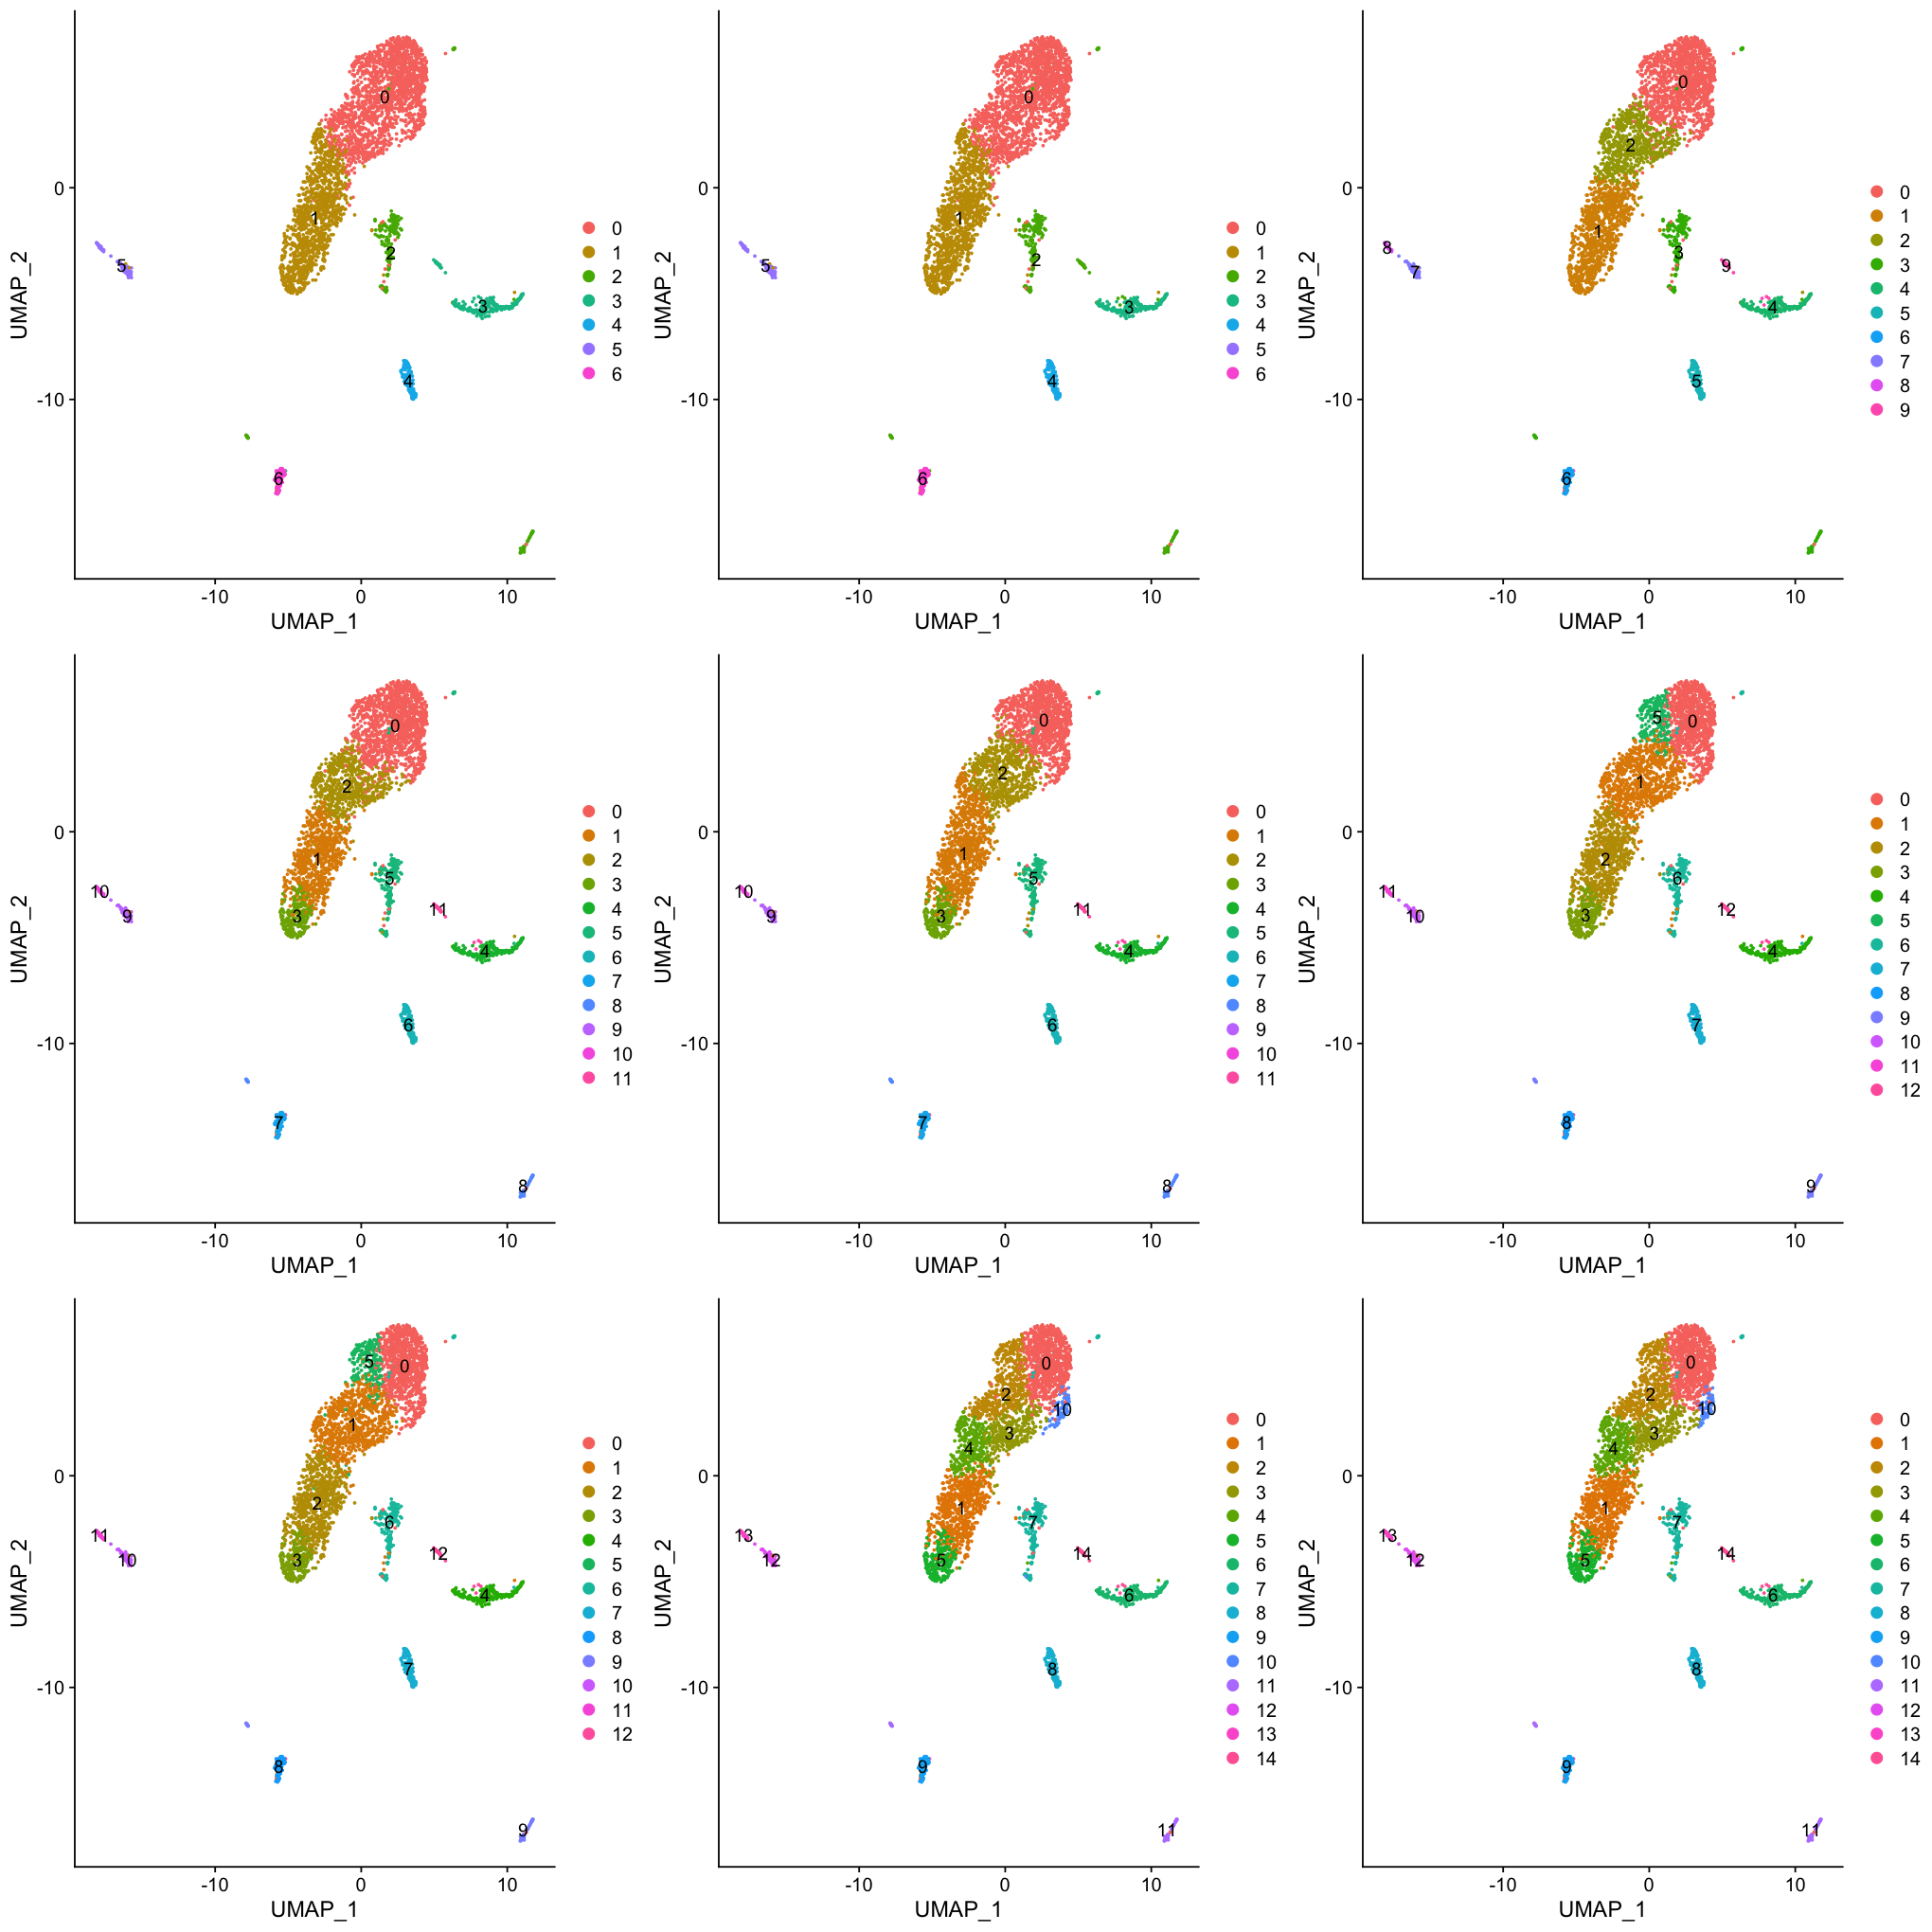

In [15]:
res.combined.plot <- VaryResolution(azoospermia.integrated)
options(repr.plot.width=17, repr.plot.height=17)
res.combined.plot

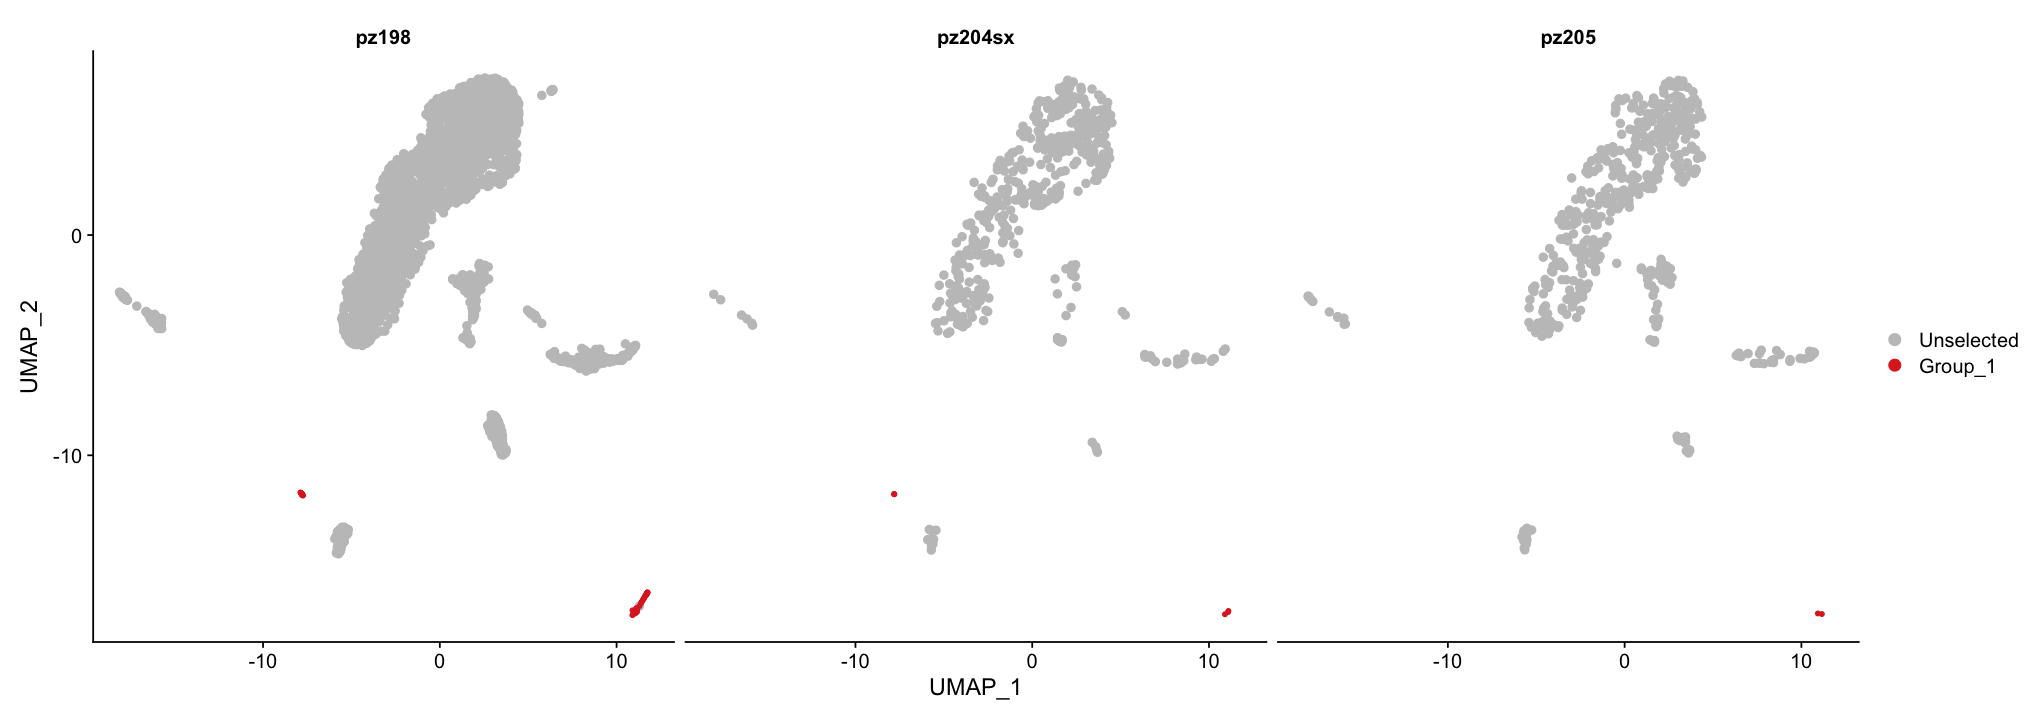

In [15]:
cellEndothelial <- colnames(azoospermia.integrated)[azoospermia.integrated@meta.data$integrated_snn_res.0.5 == '8']
options(repr.plot.width=17, repr.plot.height=6)
DimPlot(azoospermia.integrated, cells.highlight = cellEndothelial, order = T, pt.size = 2, split.by = 'sample')

In [16]:
azoospermia.integrated.end <- SetIdent(object = azoospermia.integrated,
                                       cells = cellEndothelial,
                                       value = '7')


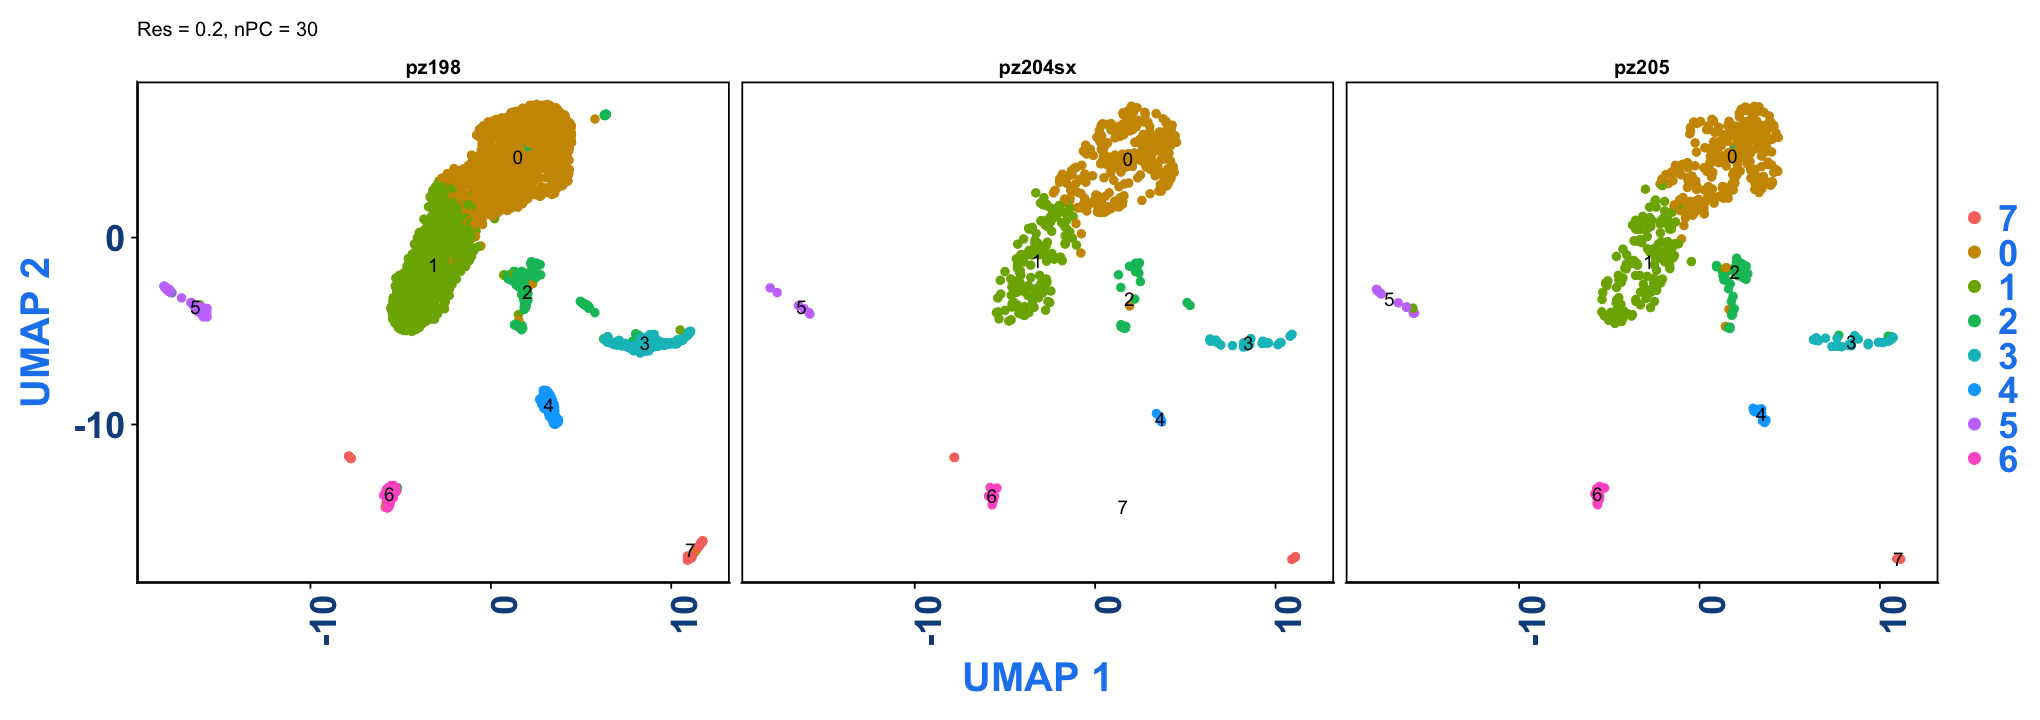

In [17]:
options(repr.plot.width=17, repr.plot.height=6)
DimPlot(azoospermia.integrated.end, reduction = "umap", label = T, pt.size = 2, split.by = 'sample') + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 

In [ ]:
pF <- FeaturePlot(azoospermia.integrated.end, features = 'nFeature_RNA')
pM <- FeaturePlot(azoospermia.integrated.end, features = 'percent.mt')
pF | pM

In [19]:
levels(azoospermia.integrated.end)

[1] "7" "0" "1" "2" "3" "4" "5" "6"

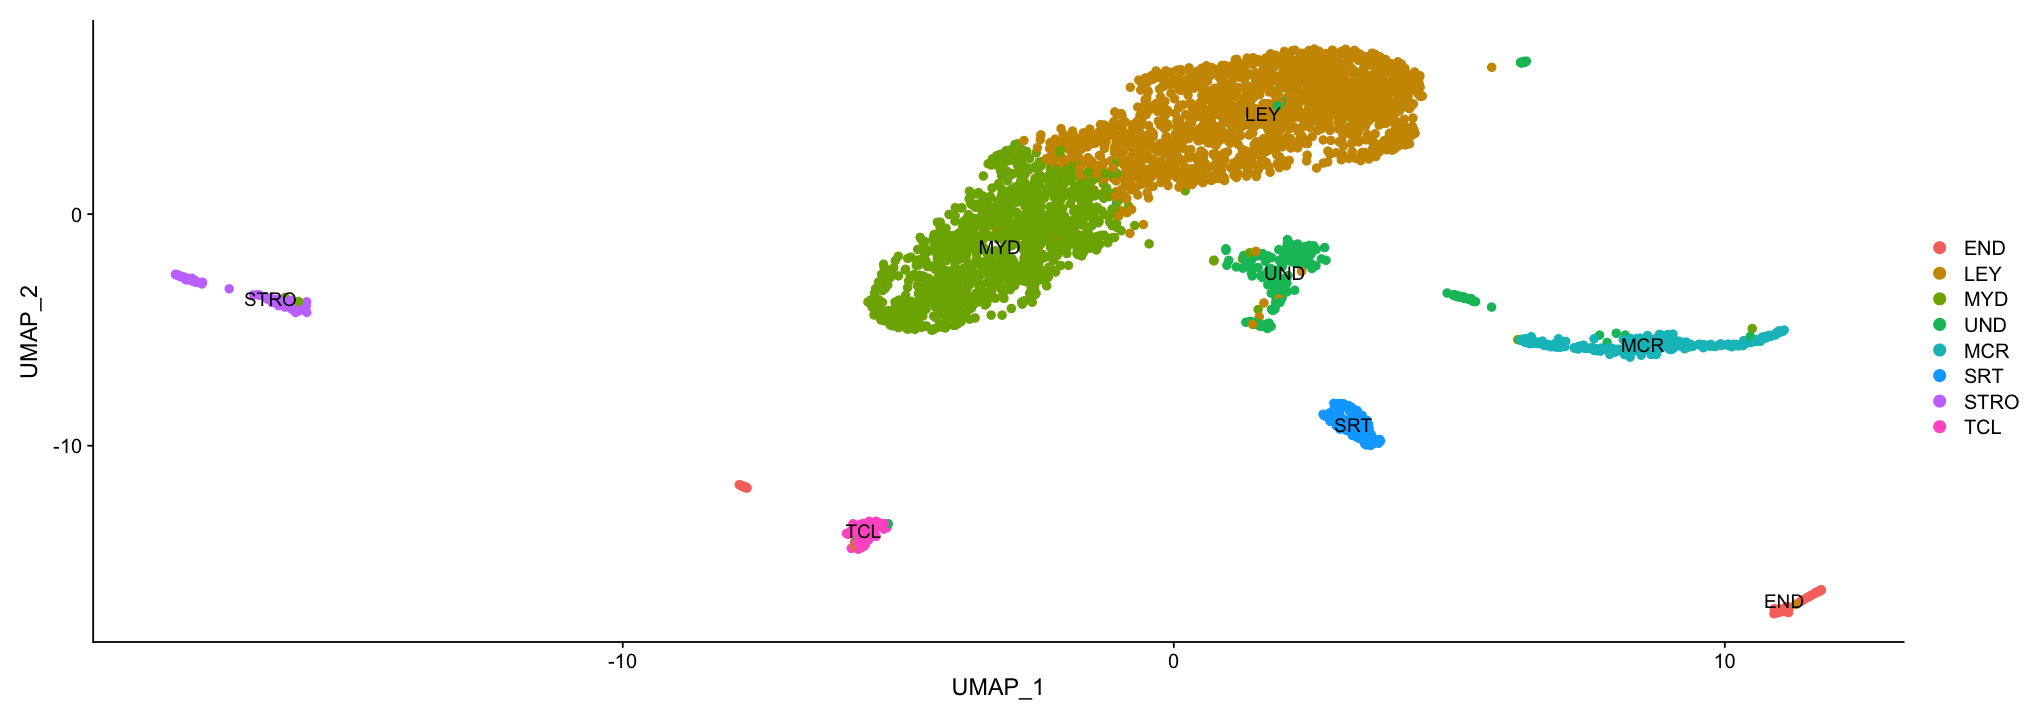

In [18]:
new.cluster.ids <- c("END",
                     "LEY",
                     "MYD",
                     "UND",
                     "MCR",
                     "SRT",
                     "STRO",
                     "TCL")
    
names(new.cluster.ids) <- levels(azoospermia.integrated.end)
azoospermia.integrated.new <- RenameIdents(azoospermia.integrated.end, 
                                             new.cluster.ids)
DimPlot(azoospermia.integrated.new, reduction = "umap", 
        label = TRUE, pt.size = 2)

azoospermia.integrated.new@meta.data$cell_type=Idents(azoospermia.integrated.new)
azoospermia.integrated.new$cell_type <- azoospermia.integrated.new@meta.data$cell_type


In [19]:
order.2.plot <- c("LEY",
                 "MYD",
                 "SRT",
                 "MCR",
                 "TCL",
                 "END",
                 "STRO",
                 "UND")
levels(azoospermia.integrated.new) <- order.2.plot 

In [ ]:
options(repr.plot.width=10, repr.plot.height=6)
Seurat.object = azoospermia.integrated.new
DefaultAssay(Seurat.object) <- 'RNA'
FeaturePlot(Seurat.object, 
            reduction = "umap", 
            pt.size = 2,
            features = c('ACE2'), 
            label = T, 
            order= T,
            #max.cutoff = 'q99',
            cols = c("lightgrey", "red")) + theme(legend.position = 'right')
FeaturePlot(Seurat.object, 
            reduction = "umap", 
            slot = 'counts',
            pt.size = 2,
            features = c('TMPRSS2'), 
            label = T, 
            order= T,
            #max.cutoff = 'q99',
            cols = c("lightgrey", "red"))+ theme(legend.position = 'right')

In [22]:
DefaultAssay(azoospermia.integrated.new) <- 'integrated'
HM_azo <- SaveMarkers(Seurat.object = azoospermia.integrated.new, 
                      filename_xlsx = paste(outdir,'iNOA.intergrated.MK_logFCpos.xlsx',sep=''),
                      LogFC.onlypos = TRUE)


Calculating cluster LEY

Calculating cluster MYD

Calculating cluster SRT

Calculating cluster MCR

Calculating cluster TCL

Calculating cluster END

Calculating cluster STRO

Calculating cluster UND

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



In [205]:
n.reads = Matrix::colSums(azoospermia.integrated.new, slot = 'counts')
mean(n.reads)
mean(n.reads[grepl("198",names(n.genes))])
mean(n.reads[grepl("204",names(n.genes))])
mean(n.reads[grepl("205",names(n.genes))])

n.genes=colSums(GetAssayData(object = azoospermia.integrated.new, slot = "counts")>0)
mean(n.genes)
mean(n.genes[grepl("198",names(n.genes))])
mean(n.genes[grepl("204",names(n.genes))])
mean(n.genes[grepl("205",names(n.genes))])

In [23]:
Plot_sign <- function(Seraut.object, signature, operator = sum, title = '') {
    x <- Seraut.object
    DefaultAssay(x) <- "RNA"
    x[["Sign_exp"]] <- apply(FetchData(object = x, 
                                       vars = signature),
                             1,
                             operator)
    FP <- FeaturePlot(x, reduction = "umap", 
                      features = 'Sign_exp', 
                      label = T, 
                      order = T,
                      repel = T,
                      label.size = 3,
                      cols = c("lightgrey", "red")) +
                      #cols = as.vector(coolwarm(5))) +
    theme(plot.title = element_text(color="black", size=16, face="bold.italic"),
          plot.subtitle = element_text(color="black", size=9, face="italic"),
          axis.text.x = element_text(angle = 90, face = "bold", color = 'black', size=12, hjust =1), 
          axis.title.x = element_text(face = "bold", color = "black", size = 14),
          axis.text.y = element_text(angle = 0, face = "bold", color = 'black', size=12),
          axis.title.y = element_text(face = "bold", color = "black", size = 14),
          legend.text = element_text(face = "bold", color = "black", size = 12),
          panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
    labs(title = title, 
         subtitle = paste('MarkerGenes: ',toString(signature), sep=''), 
         x = "UMAP 1", y = "UMAP 2") 
    return(FP)
    }

# UMAP

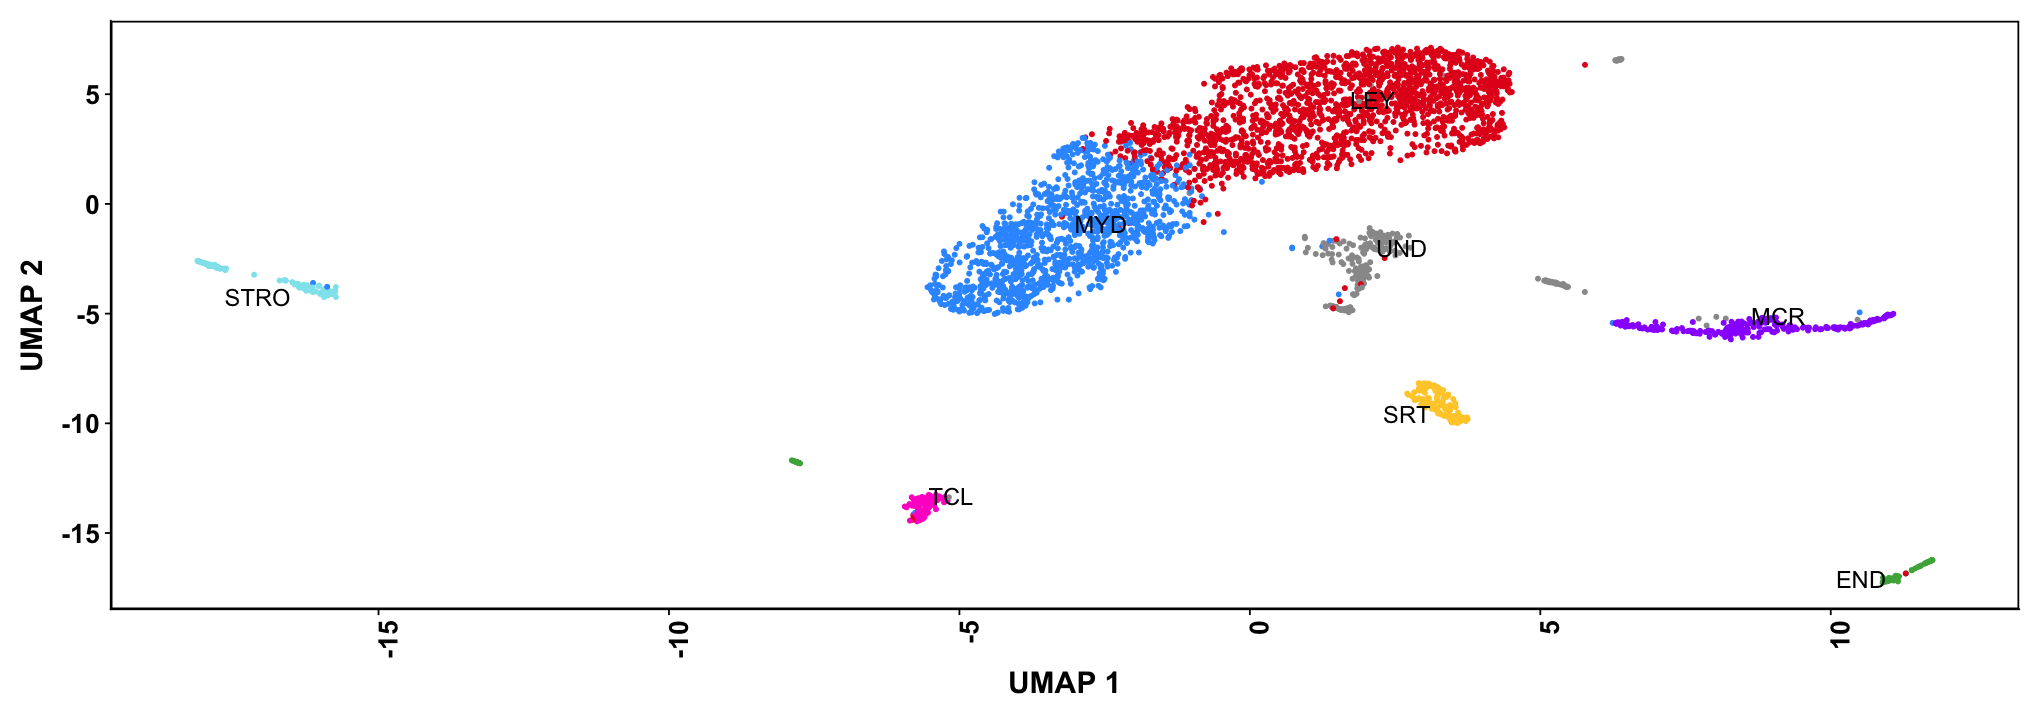

In [28]:
col = as.character(colors_Alf[levels(azoospermia.integrated.new),]$cols)
p.az <- DimPlot(azoospermia.integrated.new, reduction = "umap", repel = T, label = T, pt.size = 1, label.size = 5) +
scale_color_manual(values = (col)) +
scale_x_continuous(breaks = c(-15,-10,-5,0,5,10))+
scale_y_continuous(breaks = c(-15,-10,-5,0,5,10))+
    theme(plot.title = element_text(color="black", size=22, face="bold.italic"),
          plot.subtitle = element_text(color="black", size=16, face="italic"),
          axis.text.x = element_text(angle = 90, face = "bold", color = 'black', size=16, hjust =1), 
          axis.title.x = element_text(face = "bold", color = "black", size = 18),
          axis.text.y = element_text(angle = 0, face = "bold", color = 'black', size=16),
          axis.title.y = element_text(face = "bold", color = "black", size = 18),
          legend.text = element_text(face = "bold", color = "black", size = 20),
          legend.position = 'bottom',
          panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "UMAP 1", y = "UMAP 2")  + NoLegend()

p.az

In [27]:
?DimPlot

# PLOT Markers

pdf 
  2

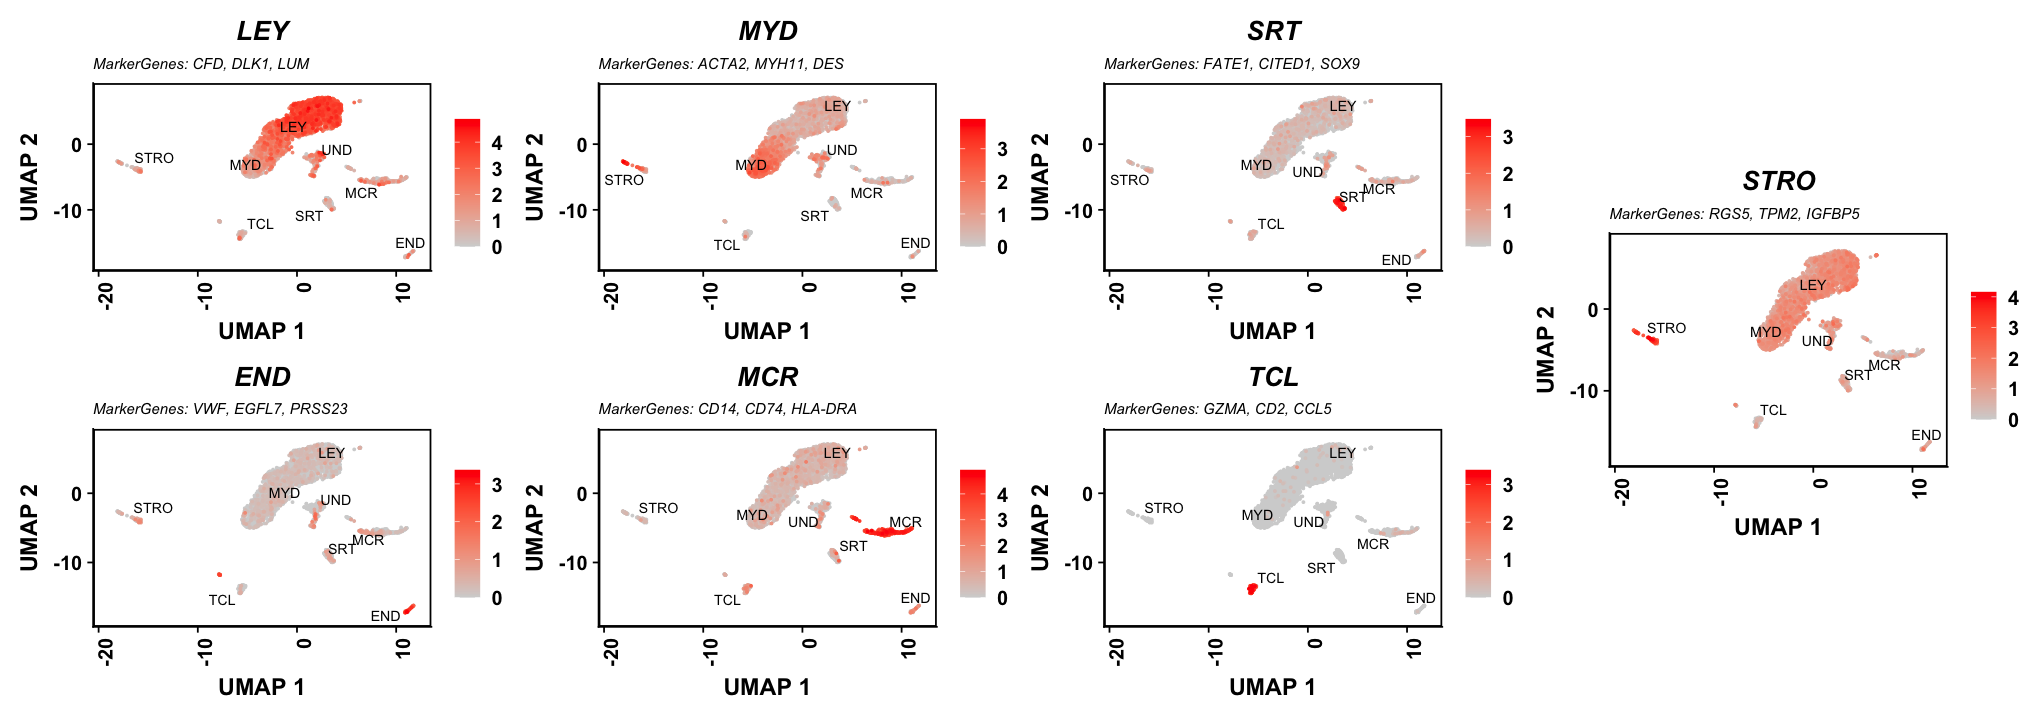

In [24]:
Seurat.object = azoospermia.integrated.new


leydig_signature = c('CFD','DLK1','LUM','CALB2')
myoid_signature = c('ACTA2','MYH11','DES', 'MYL9')
sertoli_signature = c('FATE1','CITED1','SOX9','AMH','CLDN11')
macrophage_signature = c('CD14','CD74','HLA-DRA','HLA-DRB1')
endothelial_signature = c('VWF', "EGFL7",'CD34', 'PRSS23', "RBP7")
t_cell_signature =  c('GZMA','GZMK','CD2','CCL5','NKG7')

DefaultAssay(Seurat.object) <- 'RNA'
pL <- Plot_sign(Seurat.object,
          signature= c('CFD','DLK1','LUM'), 
          operator = mean, title = 'LEY')
pM <- Plot_sign(Seurat.object,
          signature= c('ACTA2','MYH11','DES'), 
          operator = mean, title = 'MYD')
pS <- Plot_sign(Seurat.object,
          signature= c('FATE1','CITED1','SOX9'), 
          operator = mean, title = 'SRT')
pMa <- Plot_sign(Seurat.object,
          signature= c('CD14','CD74','HLA-DRA'), 
          operator = mean, title = 'MCR')
pE <- Plot_sign(Seurat.object,
          signature= c('VWF',"EGFL7", 'PRSS23'), 
          operator = mean, title = 'END')
pT <- Plot_sign(Seurat.object,
          signature= c('GZMA','CD2','CCL5'), 
          operator = mean, title = 'TCL')
pSTRO <- Plot_sign(Seurat.object,
          signature= c('RGS5','TPM2','IGFBP5'), 
          operator = mean, title = 'STRO')
layout <- '
AABBCC##
AABBCC##
AABBCCDD
EEFFGGDD
EEFFGG##
EEFFGG##
'
wrap_plots(A = pL, B = pM, C = pS, D = pSTRO, E = pE, F = pMa, G =pT, design = layout)

pdf(paste(outdir,"Figure1_panelC.pdf",sep=''),  width=14, height=6)
wrap_plots(A = pL, B = pM, C = pS, D = pSTRO, E = pE, F = pMa, G =pT, design = layout)
dev.off()


In [56]:
indir = '/Users/tascini.annasofia/Dropbox (HSR Global)/Alfano_904_paperDraft/JoseComments/'
im = image_read_pdf(paste(indir, "FigureS1M.pdf", sep=''),density = 200)
image_write(im, path = paste(indir,"FigureS1M.tiff", sep=''), format = "tiff")

im = image_read_pdf(paste(indir, "FigureS1N.pdf", sep=''),density = 200)
image_write(im, path = paste(indir,"FigureS1N.tiff", sep=''), format = "tiff")

im = image_read_pdf(paste(indir, "Figure2_panelE.pdf", sep=''),density = 200)
image_write(im, path = paste(indir,"Figure2_panelE.tiff", sep=''), format = "tiff")

In [ ]:
save.image(paste(outdir,"integrationAZOO.RData",sep=''))

pdf 
  2

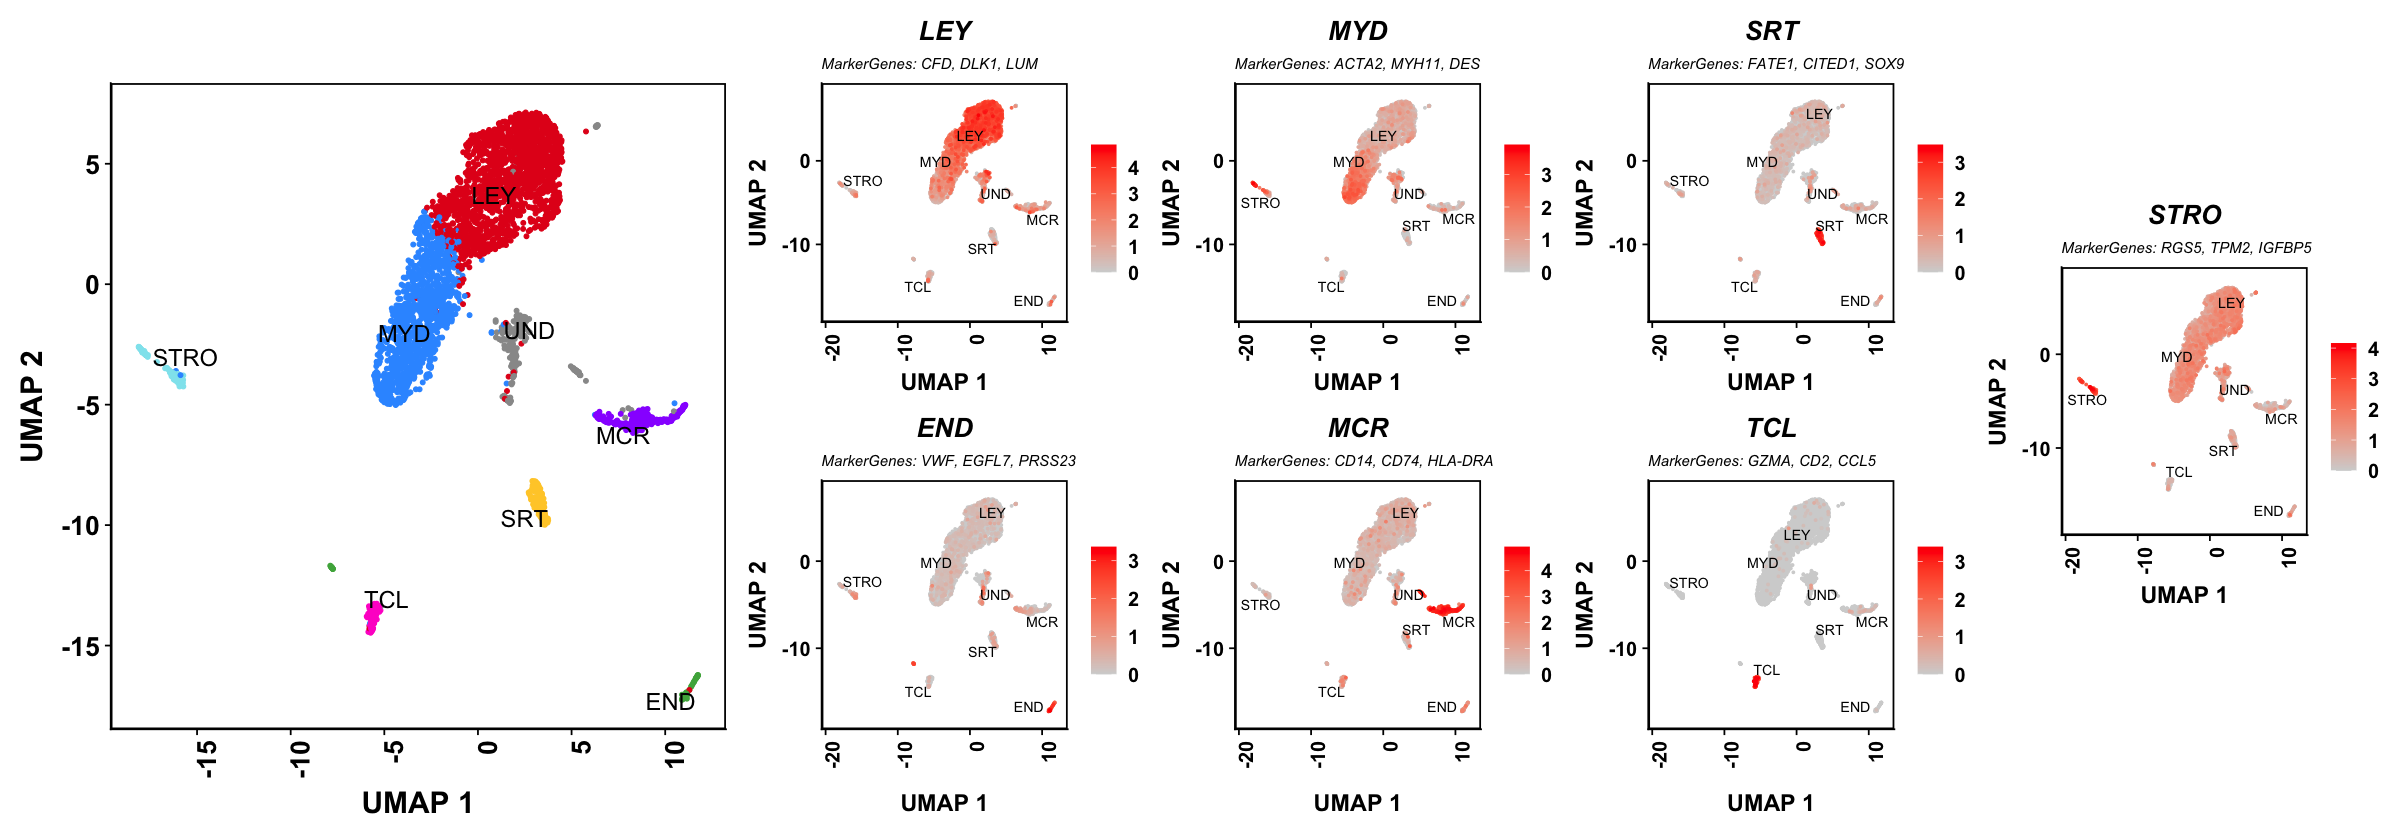

In [33]:
layout <- '
UUUUUAABBCC##
UUUUUAABBCC##
UUUUUAABBCCDD
UUUUUEEFFGGDD
UUUUUEEFFGG##
UUUUUEEFFGG##
'
options(repr.plot.width=20, repr.plot.height=7)
wrap_plots(U = p.az, A = pL, B = pM, C = pS, D = pSTRO, E = pE, F = pMa, G =pT, design = layout)

pdf(paste(outdir,"Figure1_panel_B_C.pdf",sep=''),  width=20, height=6)
wrap_plots(U = p.az, A = pL, B = pM, C = pS, D = pSTRO, E = pE, F = pMa, G =pT, design = layout)
dev.off()

im = image_read_pdf(paste(outdir,"Figure1_panel_B_C.pdf",sep=''),density = 140)
image_write(im, path = paste(outdir,"Figure1_panel_B_C.tiff", sep=''), format = "tiff")

In [35]:
im = image_read_pdf(paste(outdir,"198umap.L.pdf",sep=''),density = 200)
image_write(im, path = paste(outdir,"198umap.tiff", sep=''), format = "tiff")
im = image_read_pdf(paste(outdir,"204umap.pdf",sep=''),density = 200)
image_write(im, path = paste(outdir,"204umap.tiff", sep=''), format = "tiff")
im = image_read_pdf(paste(outdir,"205umap.pdf",sep=''),density = 200)
image_write(im, path = paste(outdir,"205umap.tiff", sep=''), format = "tiff")

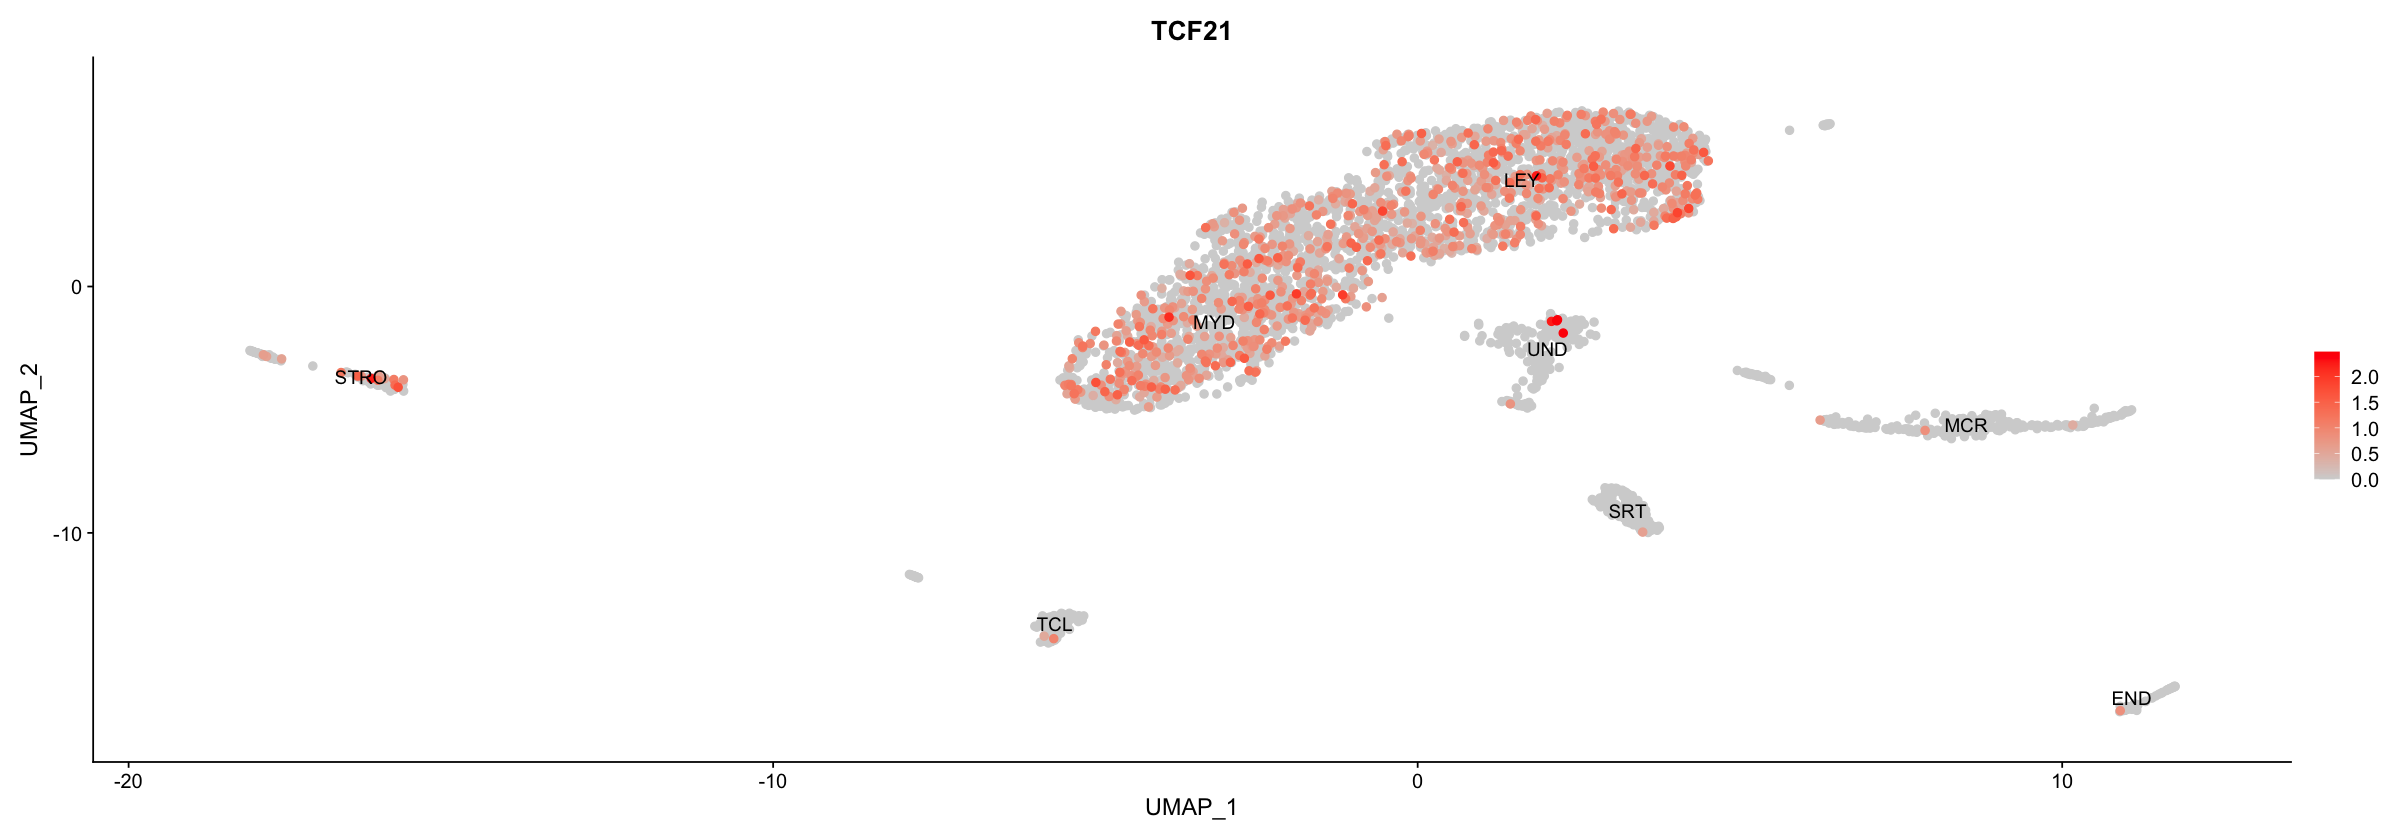

In [223]:

FeaturePlot(Seurat.object, 
            reduction = "umap", 
            pt.size = 2,
            features = c('TCF21'), 
            label = T, 
            order= T,
            #max.cutoff = 'q99',
            cols = c("lightgrey", "red")) + theme(legend.position = 'right')

In [225]:
table(Idents(pz.literature.new))
pz.lit.somatic =  subset(pz.literature.new, idents = c('LEY','MYD','SRT','MCR','END','STRO'))


                  SSCs Differentiated S'gonia  Early primary S'cytes 
                   285                    193                    728 
   Late primary S'cyte          Round S'tidis      Elong. S'tidis S1 
                   217                    221                    718 
     Elong. S'tidis S2                  Sperm                    LEY 
                  1252                   1069                    615 
                   MYD                    SRT                    MCR 
                   307                     35                    340 
                   END                   STRO 
                   355                     24 

In [229]:
save(pz.lit.somatic, file = 'pz.lit.somatic')

# Marker Genes

In [39]:
Seurat.object = azoospermia.integrated.new
DefaultAssay(Seurat.object) = 'integrated'
thresh.use = 0.25; min.pct = 0.25; min.diff.pct = -Inf; test.use = "wilcox"; LogFC.onlypos = TRUE
cluster.markers = FindAllMarkers(Seurat.object, 
                                thresh.use = thresh.use, 
                                test.use=test.use, 
                                min.pct=min.pct, 
                                min.diff.pct=min.diff.pct, 
                                only.pos=LogFC.onlypos)
write.xlsx(cluster.markers,
           file= paste(outdir,'TableSX_iNOA_MG.xlsx', sep=''), 
           row.names = T,
           asTable = T)

top10 <- cluster.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

cluster.markers_f = cluster.markers[cluster.markers$pct.1 >0.7,]
top10_f <- cluster.markers_f %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)



Calculating cluster LEY

Calculating cluster MYD

Calculating cluster SRT

Calculating cluster MCR

Calculating cluster TCL

Calculating cluster END

Calculating cluster STRO

Calculating cluster UND



In [194]:
cluster.markers_f = cluster.markers[cluster.markers$pct.1 >0.7,]
top10_f <- cluster.markers_f %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

In [67]:
dir_MG = '/Users/tascini.annasofia/Dropbox (HSR Global)/Alfano_904_paperDraft/xlsx.table/infertility_MarkerGenes/'
write.xlsx(cluster.markers,
           file= paste(dir_MG,"iNOA.intergrated.MK_logFCpos.xlsx", sep=''), 
           row.names = T,
           asTable = T)

In [55]:
# Subset object and plot HM
azoospermia.integrated.new.small <- subset(azoospermia.integrated.new, downsample = 100)
col =  
HM <- DoHeatmap(azoospermia.integrated.new.small, 
                features = top10$gene, 
                group.colors = col,
                disp.min = -2,
                disp.max = 2,
                angle = 90) +
scale_fill_gradientn(colours = coolwarm(200))

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



In [ ]:
options(repr.plot.width=12, repr.plot.height=16)
HM
pdf(paste(outdir,"azoospermia.HM.UPD_NOLegend.pdf",sep=''),  width=11, height=14)
HM
dev.off()

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



pdf 
  2

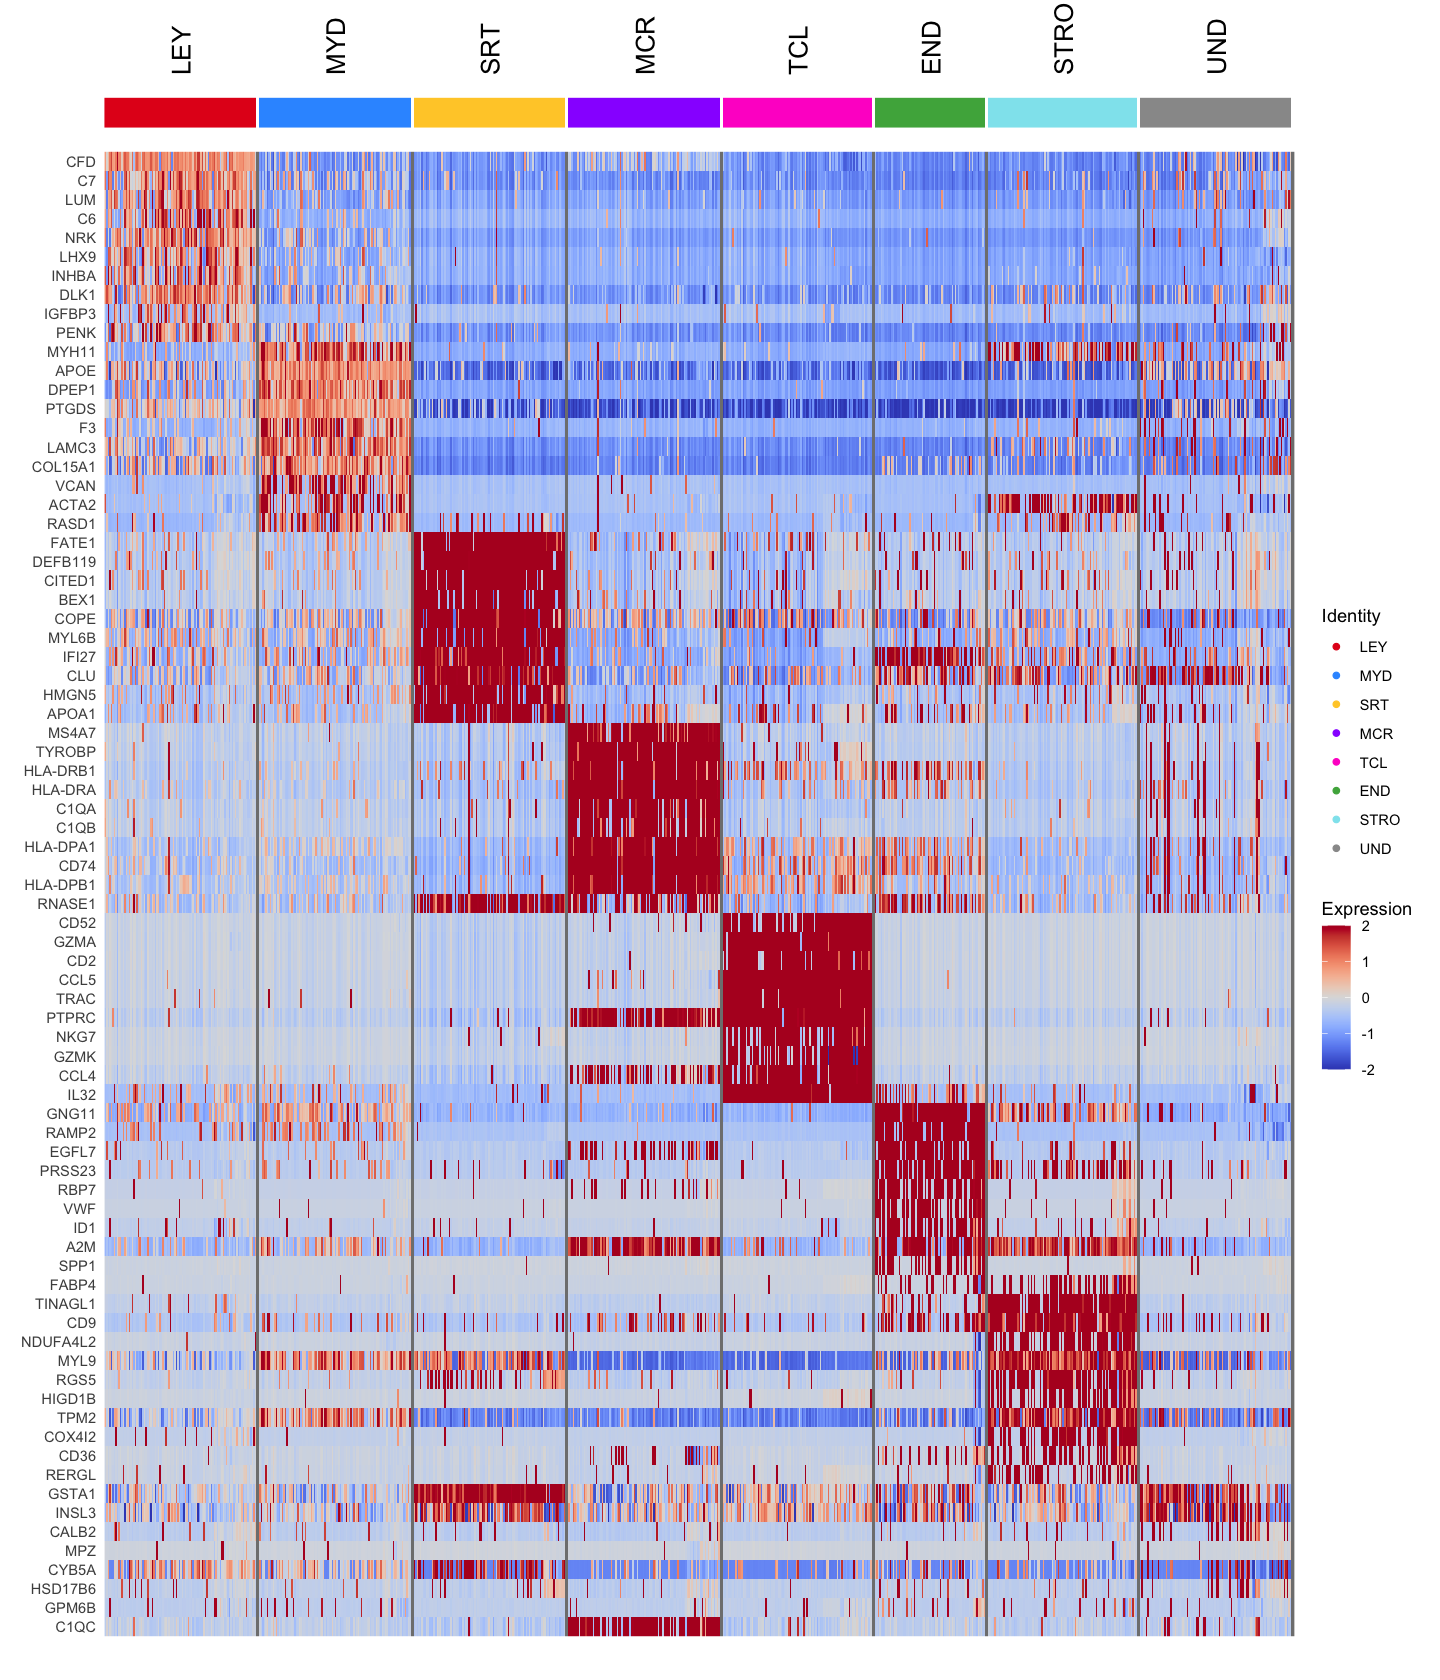

In [41]:
azoospermia.integrated.new.small <- subset(azoospermia.integrated.new, downsample = 100)
HM_f <- DoHeatmap(azoospermia.integrated.new.small, 
                features = top10_f$gene, 
                group.colors = col,
                disp.min = -2,
                disp.max = 2,
                angle = 90) +
scale_fill_gradientn(colours = coolwarm(200))
options(repr.plot.width=12, repr.plot.height=14)
HM_f
pdf(paste(outdir,"azoospermia.HM.UPD_NOLegend_filteredPC1.pdf",sep=''),  width=11, height=14)
HM_f
dev.off()

In [263]:
max(azoospermia.integrated.new.small@assays$integrated@scale.data)
min(azoospermia.integrated.new.small@assays$integrated@scale.data)

[1] 10

[1] -14.34355

In [268]:
?VlnPlot

# cell per type

pdf 
  2

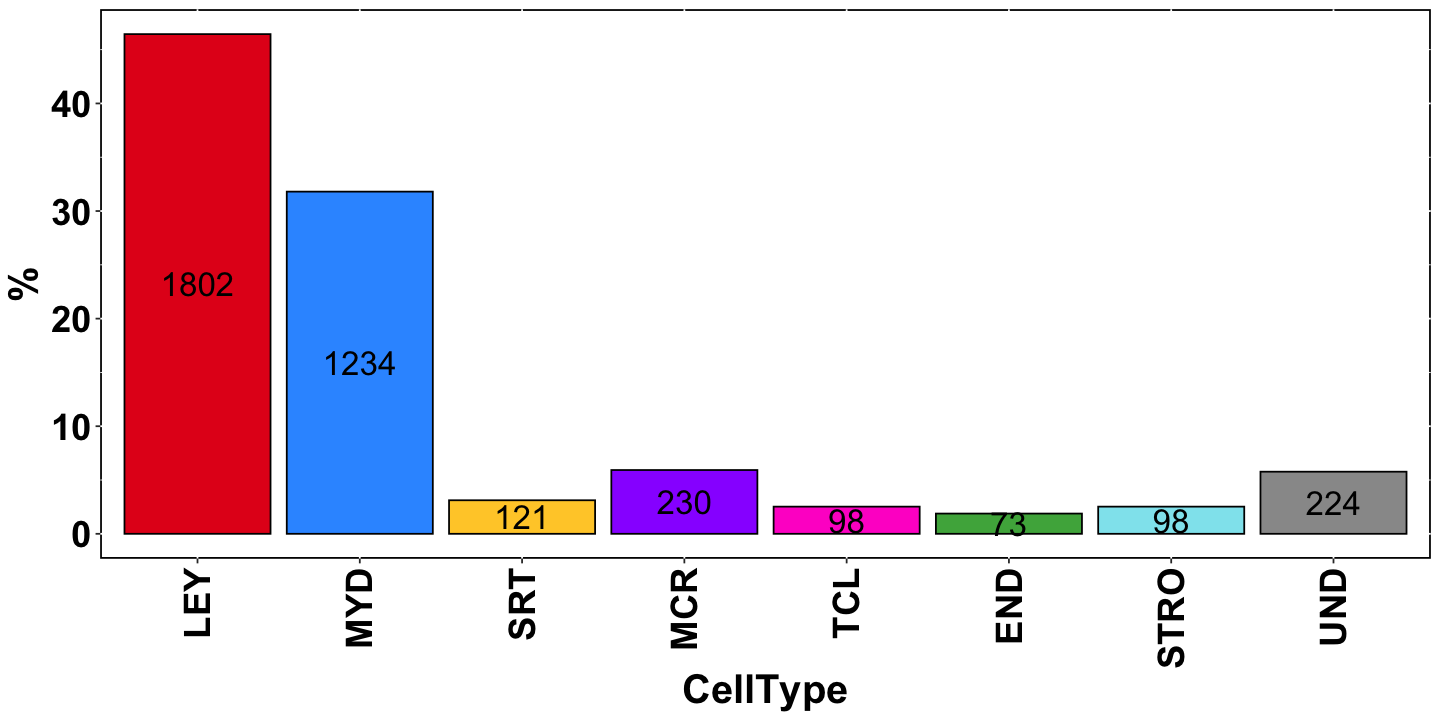

In [56]:
col = col = as.character(colors_Alf[levels(azoospermia.integrated.new),]$cols)
A <- data.frame(prop.table(table(Idents(azoospermia.integrated.new)))*100)
A2 <- data.frame(table(Idents(azoospermia.integrated.new)))
A$N <- A2$Freq
options(repr.plot.width=12, repr.plot.height=6)
ct <- ggplot(data=A, aes(x=Var1, y=Freq,  label=N)) +
geom_bar(stat="identity",  color="black", fill=col, position=position_dodge()) + 
theme(plot.title = element_text(color="black", size=26, face="bold.italic"),
      axis.text.x = element_text(angle = 90, face = "bold", color = "black", size=22, vjust =.5, hjust = 1), 
      axis.title.x = element_text(face = "bold", color = "black", size = 24),
      axis.text.y = element_text(angle = 0, face = "bold", color = "black", size=22),
      axis.title.y = element_text(face = "bold", color = "black", size = 24),
      legend.text = element_text(face = "bold", color = "black", size = 12),
      legend.position="top",
      panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "CellType", y = "%")+ 
geom_text(size = 7, position = position_stack(vjust = 0.5)) 

ct
pdf(paste(outdir,"az_celltypes.pdf",sep=''),  width=10, height=5)
ct
dev.off()

# Enrichment MG

In [36]:
suppressMessages(library(enrichR))

dir_MG = '/Users/tascini.annasofia/Dropbox (HSR Global)/Alfano_904_paperDraft/xlsx.table/infertility_MarkerGenes/'
dir_enrichR = '/Users/tascini.annasofia/Dropbox (HSR Global)/Alfano_904_paperDraft/xlsx.table/infertility_MG_enrichR/'

databases <- listEnrichrDbs()
# databases to make the enrichment of
enrich.databases <- c("GO_Biological_Process_2018",
                      "GO_Cellular_Component_2018",
                      "GO_Molecular_Function_2018",
                      "Reactome_2016",
                      "KEGG_2016",
                      "WikiPathways_2016",
                      "BioCarta_2016",
                     "BioPlanet_2019")

MG_file = paste(dir_MG,"iNOA.intergrated.MK_logFCpos.xlsx", sep='')

A <- read.xlsx(MG_file)
clusters_names = unique(A$cluster)
MARGER_gene_list <- list()
for (n in clusters_names) {
    MARGER_gene_list[[paste('CLUSTER_',n, sep ='')]] <- A$gene[A$cluster==n]
}

enrichr.list <- list()
for (i in 1:length(MARGER_gene_list)){
  print(paste("> cluster ", i))
  genes <- MARGER_gene_list[[i]]
  enrichr.list[[i]] <- enrichR::enrichr(genes, databases = enrich.databases)
  #print(paste("> Enriched: ", enrichr.list[[i]]))
}
names(enrichr.list) <- names(MARGER_gene_list)

for (i in 1:length(MARGER_gene_list)){
    filename = paste(dir_enrichR,'enrichR_MG.iNOA_',
                     names(MARGER_gene_list)[[i]],
                     ".xlsx",
                     sep="")
    write.xlsx(x = enrichr.list[[i]], file = filename)
}


[1] "> cluster  1"
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
  Querying GO_Cellular_Component_2018... Done.
  Querying GO_Molecular_Function_2018... Done.
  Querying Reactome_2016... Done.
  Querying KEGG_2016... Done.
  Querying WikiPathways_2016... Done.
  Querying BioCarta_2016... Done.
  Querying BioPlanet_2019... Done.
Parsing results... Done.
[1] "> cluster  2"
Uploading data to Enrichr... 

ERROR: Error in curl::curl_fetch_memory(url, handle = handle): Operation was aborted by an application callback


# Pathway plot

[1] "LEY"
[1] "MYD"
[1] "SRT"
[1] "MCR"
[1] "TCL"
[1] "END"
[1] "STRO"
[1] "UND"


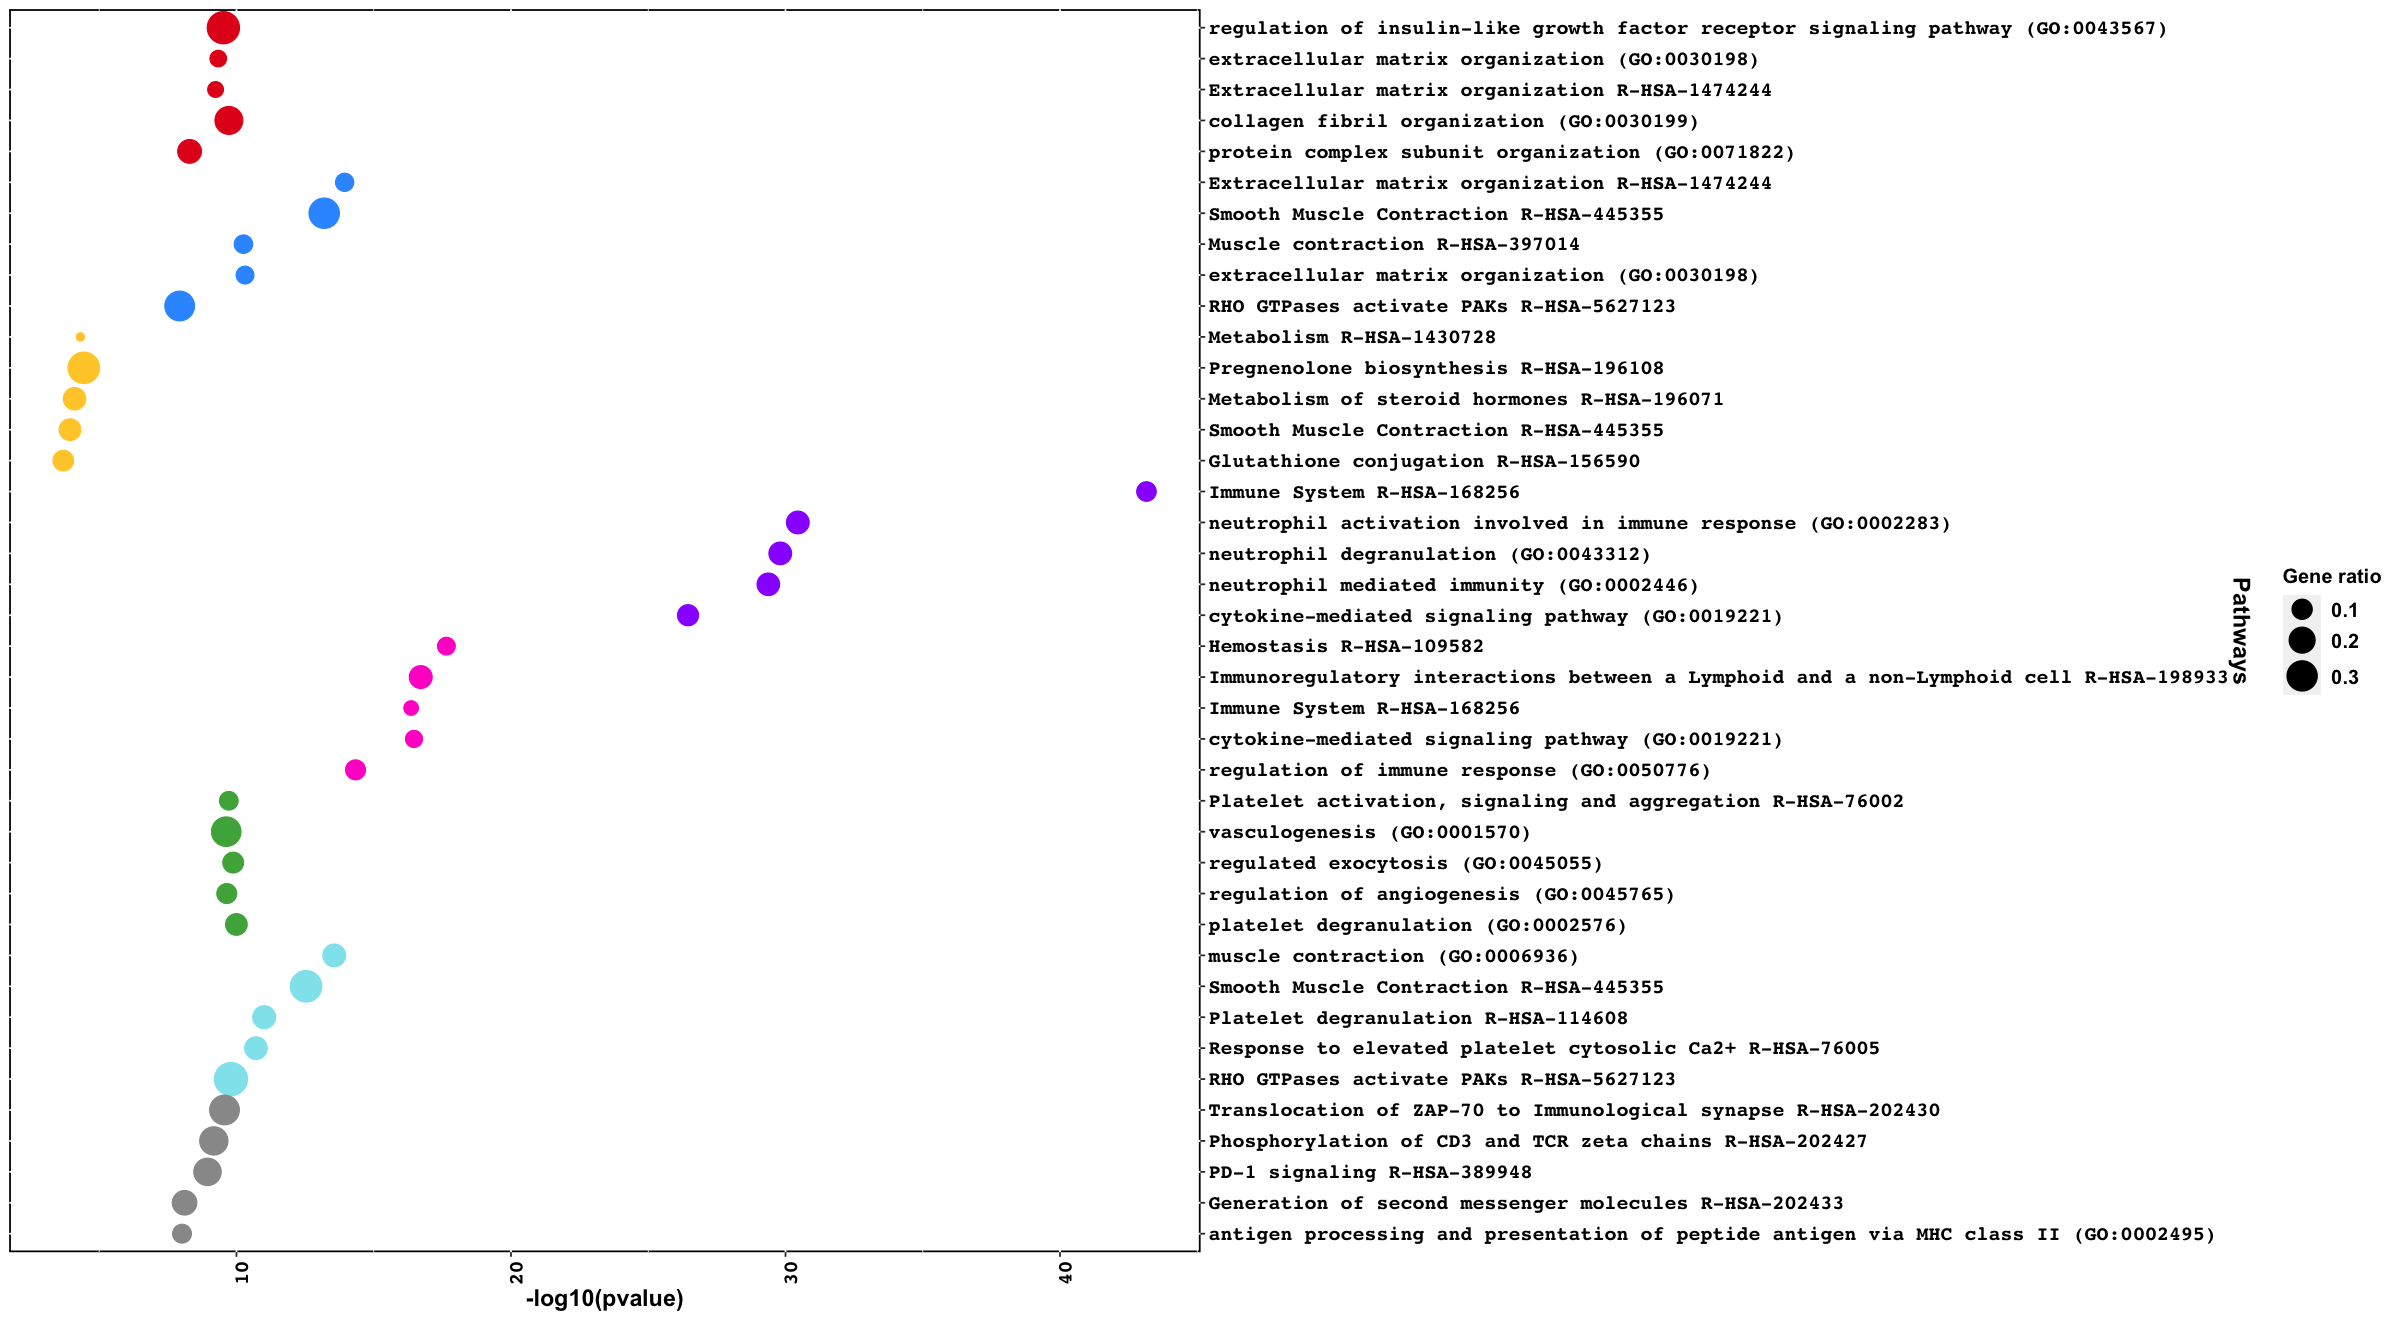

In [43]:
outdir = '/Users/tascini.annasofia/Dropbox (HSR Global)/Alfano_904_paperDraft/Plots'
dir_enrichR = dir_enrichR = '/Users/tascini.annasofia/Dropbox (HSR Global)/Alfano_904_paperDraft/xlsx.table/infertility_MG_enrichR/'
# empty dataframe 
pathways.dataframe = data.frame(cellType = character(),
                                Pathway = character(),
                                gene.ratio = numeric(),
                                p.value = numeric(),
                                p.value.adj = numeric(),
                                stringsAsFactors=FALSE)
# cell types
all.cell.types= c("LEY",
                  "MYD",
                  "SRT",
                  "MCR",
                  "TCL",
                  "END",
                  "STRO",
                  "UND")

database =  c('Reactome_2016' ,'GO_Biological_Process_2018')
# plot the N most significant pathways
N=5

fx <- function(x) eval(parse(text=enrichR.table$Overlap[x]))
# fx <- function(x) eval(parse(text=enrichR.table[x,]$Overlap))

for (cell_type in all.cell.types) {
  print(cell_type)
  # enrichR file path
  enrichR.file = paste(dir_enrichR,"enrichR_MG.iNOA_CLUSTER_",cell_type,".xlsx",sep='')
  #load the enrichR pathway table for all the databases you want 
  
  enrichR.table  = data.frame()
  for (dat in database) {
    Table <- read.xlsx(xlsxFile = enrichR.file, 
                       sheet = dat, 
                       startRow = 1, 
                       colNames = TRUE,
                       rowNames = TRUE, 
                       detectDates = FALSE, 
                       skipEmptyRows = TRUE,
                       skipEmptyCols = TRUE,
                       na.strings = "NA", 
                       fillMergedCells = FALSE)
    
    enrichR.table  = rbind(enrichR.table, Table)
  }
  # reorder by p adj value
  enrichR.table <- enrichR.table[order(enrichR.table$Adjusted.P.value, decreasing = F),]

  pathways.dataframe.entry = data.frame(cellType = rep(cell_type, N),
                                            Pathway = row.names(enrichR.table)[1:N],
                                            gene.ratio = sapply(1:N, fx),
                                            p.value = enrichR.table$P.value[1:N],
                                            p.value.adj=enrichR.table$Adjusted.P.value[1:N])
  pathways.dataframe <- rbind(pathways.dataframe, pathways.dataframe.entry)

}

pathways.dataframe$Pathway.num = dim(pathways.dataframe)[1]:1
pathways.dataframe$Pathway.num = as.factor(pathways.dataframe$Pathway.num )

# Remove Home Sapiens from pathway to shorten the title
removeHomo <- function(str, stopwords='Homo') {
  x <- unlist(strsplit(as.character(str), " "))
  paste(x[!x %in% stopwords], collapse = " ")
}
removeSapiens <- function(str, stopwords='sapiens') {
  x <- unlist(strsplit(as.character(str), " "))
  paste(x[!x %in% stopwords], collapse = " ")
}
pathways.dataframe$Pathway <- sapply(pathways.dataframe$Pathway, removeHomo)
pathways.dataframe$Pathway <- sapply(pathways.dataframe$Pathway, removeSapiens)

## Dotcolors
color = c('#E41A1C', #L
          '#3399FF', #M
          '#FFCC33', #S
          '#9900FF', #M
          '#FF33CC', #Tcell
          '#4DAF4A', #E
          'cadetblue2', #U
          '#999999') #U

# plots
PP <- ggplot(pathways.dataframe, aes(Pathway.num,-log10(p.value))) + 
  geom_point(aes(size = gene.ratio, col=cellType)) +
  scale_colour_manual(values=color, guide = FALSE) +
  scale_size_continuous(range = c(2,9), name = "Gene ratio") +
  coord_flip() +
  scale_x_discrete(breaks=pathways.dataframe$Pathway.num, 
                   labels=pathways.dataframe$Pathway,
                   position = "top") +
  theme(plot.title = element_text(color="black", size=22, face="bold.italic"),
        plot.subtitle = element_text(color="black", size=12, face="italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'black', size=12, hjust =1,family = "mono"), 
        axis.title.x = element_text(face = "bold", color = "black", size = 14),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'black', size=12, family = "mono"),
        axis.title.y = element_text(face = "bold", color = "black", size = 14),
        legend.text = element_text(face = "bold", color = "black", size = 12),
        legend.title = element_text(face = "bold", color = "black", size = 12),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(x = "Pathways", y = "-log10(pvalue)")#+ NoLegend()
PP

In [59]:
# chosen pathways to plot
pathways2plot <- list()
pathways2plot[['LEY']] = c('Extracellular matrix organization Homo sapiens R-HSA-1474244', 
                          'Collagen biosynthesis and modifying enzymes Homo sapiens R-HSA-1650814',
                          'Collagen formation Homo sapiens R-HSA-147429')
pathways2plot[['MYD']] = c('Extracellular matrix organization Homo sapiens R-HSA-1474244',
                          'Smooth Muscle Contraction Homo sapiens R-HSA-445355',
                          'Scavenging by Class A Receptors Homo sapiens R-HSA-3000480')
pathways2plot[['SRT']] = c('Pregnenolone biosynthesis Homo sapiens R-HSA-196108',
                          'Metabolism of steroid hormones Homo sapiens R-HSA-196071',
                          'Glutathione conjugation Homo sapiens R-HSA-156590')
pathways2plot[['MCR']] = c('Interferon gamma signaling Homo sapiens R-HSA-877300',
                           'MHC class II antigen presentation Homo sapiens R-HSA-2132295',
                           'PD-1 signaling Homo sapiens R-HSA-389948')
pathways2plot[['TCL']] = c('Phosphorylation of CD3 and TCR zeta chains Homo sapiens R-HSA-202427',
                           'Cytokine Signaling in Immune system Homo sapiens R-HSA-1280215',
                          'PD-1 signaling Homo sapiens R-HSA-389948')
pathways2plot[['END']] = c('Endosomal/Vacuolar pathway Homo sapiens R-HSA-1236977',
                          'Interferon alpha/beta signaling Homo sapiens R-HSA-909733',
                          'VEGFR2 mediated vascular permeability Homo sapiens R-HSA-5218920')
pathways2plot[['STRO']] = c('Smooth Muscle Contraction Homo sapiens R-HSA-445355',
                           'RHO GTPases activate PAKs Homo sapiens R-HSA-5627123',
                           'Extracellular matrix organization Homo sapiens R-HSA-1474244')
pathways2plot[['UND']] = c('Translocation of ZAP-70 to Immunological synapse Homo sapiens R-HSA-202430',
                          'Phosphorylation of CD3 and TCR zeta chains Homo sapiens R-HSA-202427',
                           'PD-1 signaling Homo sapiens R-HSA-389948')

In [44]:
pathways.dataframe = data.frame(cellType = character(),
                                Pathway = character(),
                                gene.ratio = numeric(),
                                p.value = numeric(),
                                p.value.adj = numeric(),
                                stringsAsFactors=FALSE)
all.cell.types= c("LEY",
                 "MYD",
                 "SRT",
                 "MCR",
                 "TCL",
                 "END",
                 "STRO",
                 "UND")
database = 'Reactome_2016' 
N=3
fx <- function(x) eval(parse(text=enrichR.table$Overlap[x]))
fx <- function(x) eval(parse(text=enrichR.table[x,]$Overlap))
for (cell_type in all.cell.types) {
    print(cell_type)
    enrichR.file = paste(dir_enrichR,"enrichR_MG.iNOA_CLUSTER_",cell_type,".xlsx",sep='')
    enrichR.table <- read.xlsx(xlsxFile = enrichR.file, 
                            sheet = database, 
                            startRow = 1, 
                            colNames = TRUE,
                            rowNames = TRUE, 
                            detectDates = FALSE, 
                            skipEmptyRows = TRUE,
                            skipEmptyCols = TRUE,
                            na.strings = "NA", 
                            fillMergedCells = FALSE)
    enrichR.table <- enrichR.table[order(enrichR.table$Adjusted.P.value, decreasing = F),]
    pathways.dataframe.entry = data.frame(cellType = rep(cell_type, N),
                                          Pathway = pathways2plot[[cell_type]],
                                          gene.ratio = sapply(pathways2plot[[cell_type]], fx),
                                          p.value = enrichR.table[pathways2plot[[cell_type]],]$P.value,
                                          p.value.adj = enrichR.table[pathways2plot[[cell_type]],]$Adjusted.P.value)
    #pathways.dataframe.entry = data.frame(cellType = rep(cell_type, N),
    #                                          Pathway = row.names(enrichR.table)[1:N],
    #                                        gene.ratio = sapply(1:N, fx),
    #                                          p.value = enrichR.table$P.value[1:N],
    #                                          p.value.adj=enrichR.table$Adjusted.P.value[1:N])
    pathways.dataframe <- rbind(pathways.dataframe, pathways.dataframe.entry)
       
    
}

pathways.dataframe$Pathway.num = dim(pathways.dataframe)[1]:1
pathways.dataframe$Pathway.num = as.factor(pathways.dataframe$Pathway.num )

removeHomo <- function(str, stopwords='Homo') {
  x <- unlist(strsplit(as.character(str), " "))
  paste(x[!x %in% stopwords], collapse = " ")
}
removeSapiens <- function(str, stopwords='sapiens') {
  x <- unlist(strsplit(as.character(str), " "))
  paste(x[!x %in% stopwords], collapse = " ")
}
pathways.dataframe$Pathway <- sapply(pathways.dataframe$Pathway, removeHomo)
pathways.dataframe$Pathway <- sapply(pathways.dataframe$Pathway, removeSapiens)

color = c('#E41A1C', #L
        '#3399FF', #M
        '#FFCC33', #S
        '#9900FF', #M
        '#FF33CC', #Tcell
        '#4DAF4A', #E
        'cadetblue2', #U
#        'grey83', #U
        '#999999') #U

PP <- ggplot(pathways.dataframe, aes(Pathway.num,-log10(p.value))) + 
geom_point(aes(size = gene.ratio, col=cellType)) +
scale_colour_manual(values=color, guide = FALSE) +
scale_size_continuous(range = c(2,9), name = "Gene ratio") +
coord_flip() +
scale_x_discrete(breaks=pathways.dataframe$Pathway.num, 
                 labels=pathways.dataframe$Pathway,
                 position = "top") +
theme(plot.title = element_text(color="black", size=22, face="bold.italic"),
          plot.subtitle = element_text(color="black", size=16, face="italic"),
          axis.text.x = element_text(angle = 90, face = "bold", color = 'black', size=16, hjust =1,family = "mono"), 
          axis.title.x = element_text(face = "bold", color = "black", size = 16),
          axis.text.y = element_text(angle = 0, face = "bold", color = 'black', size=16, family = "mono"),
          axis.title.y = element_text(face = "bold", color = "black", size = 16),
          legend.text = element_text(face = "bold", color = "black", size = 16),
          legend.title = element_text(face = "bold", color = "black", size = 16),
          panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "Relevant pathways", y = "-log10(pvalue)")#+ NoLegend()
PP

#pdf(paste(outdir,"iNOA.PlotPathway_bigDot.pdf",sep=''),  width=13, height=13)
#PP
#dev.off()

[1] "LEY"


ERROR: Error in data.frame(cellType = rep(cell_type, N), Pathway = pathways2plot[[cell_type]], : object 'pathways2plot' not found


pdf 
  2

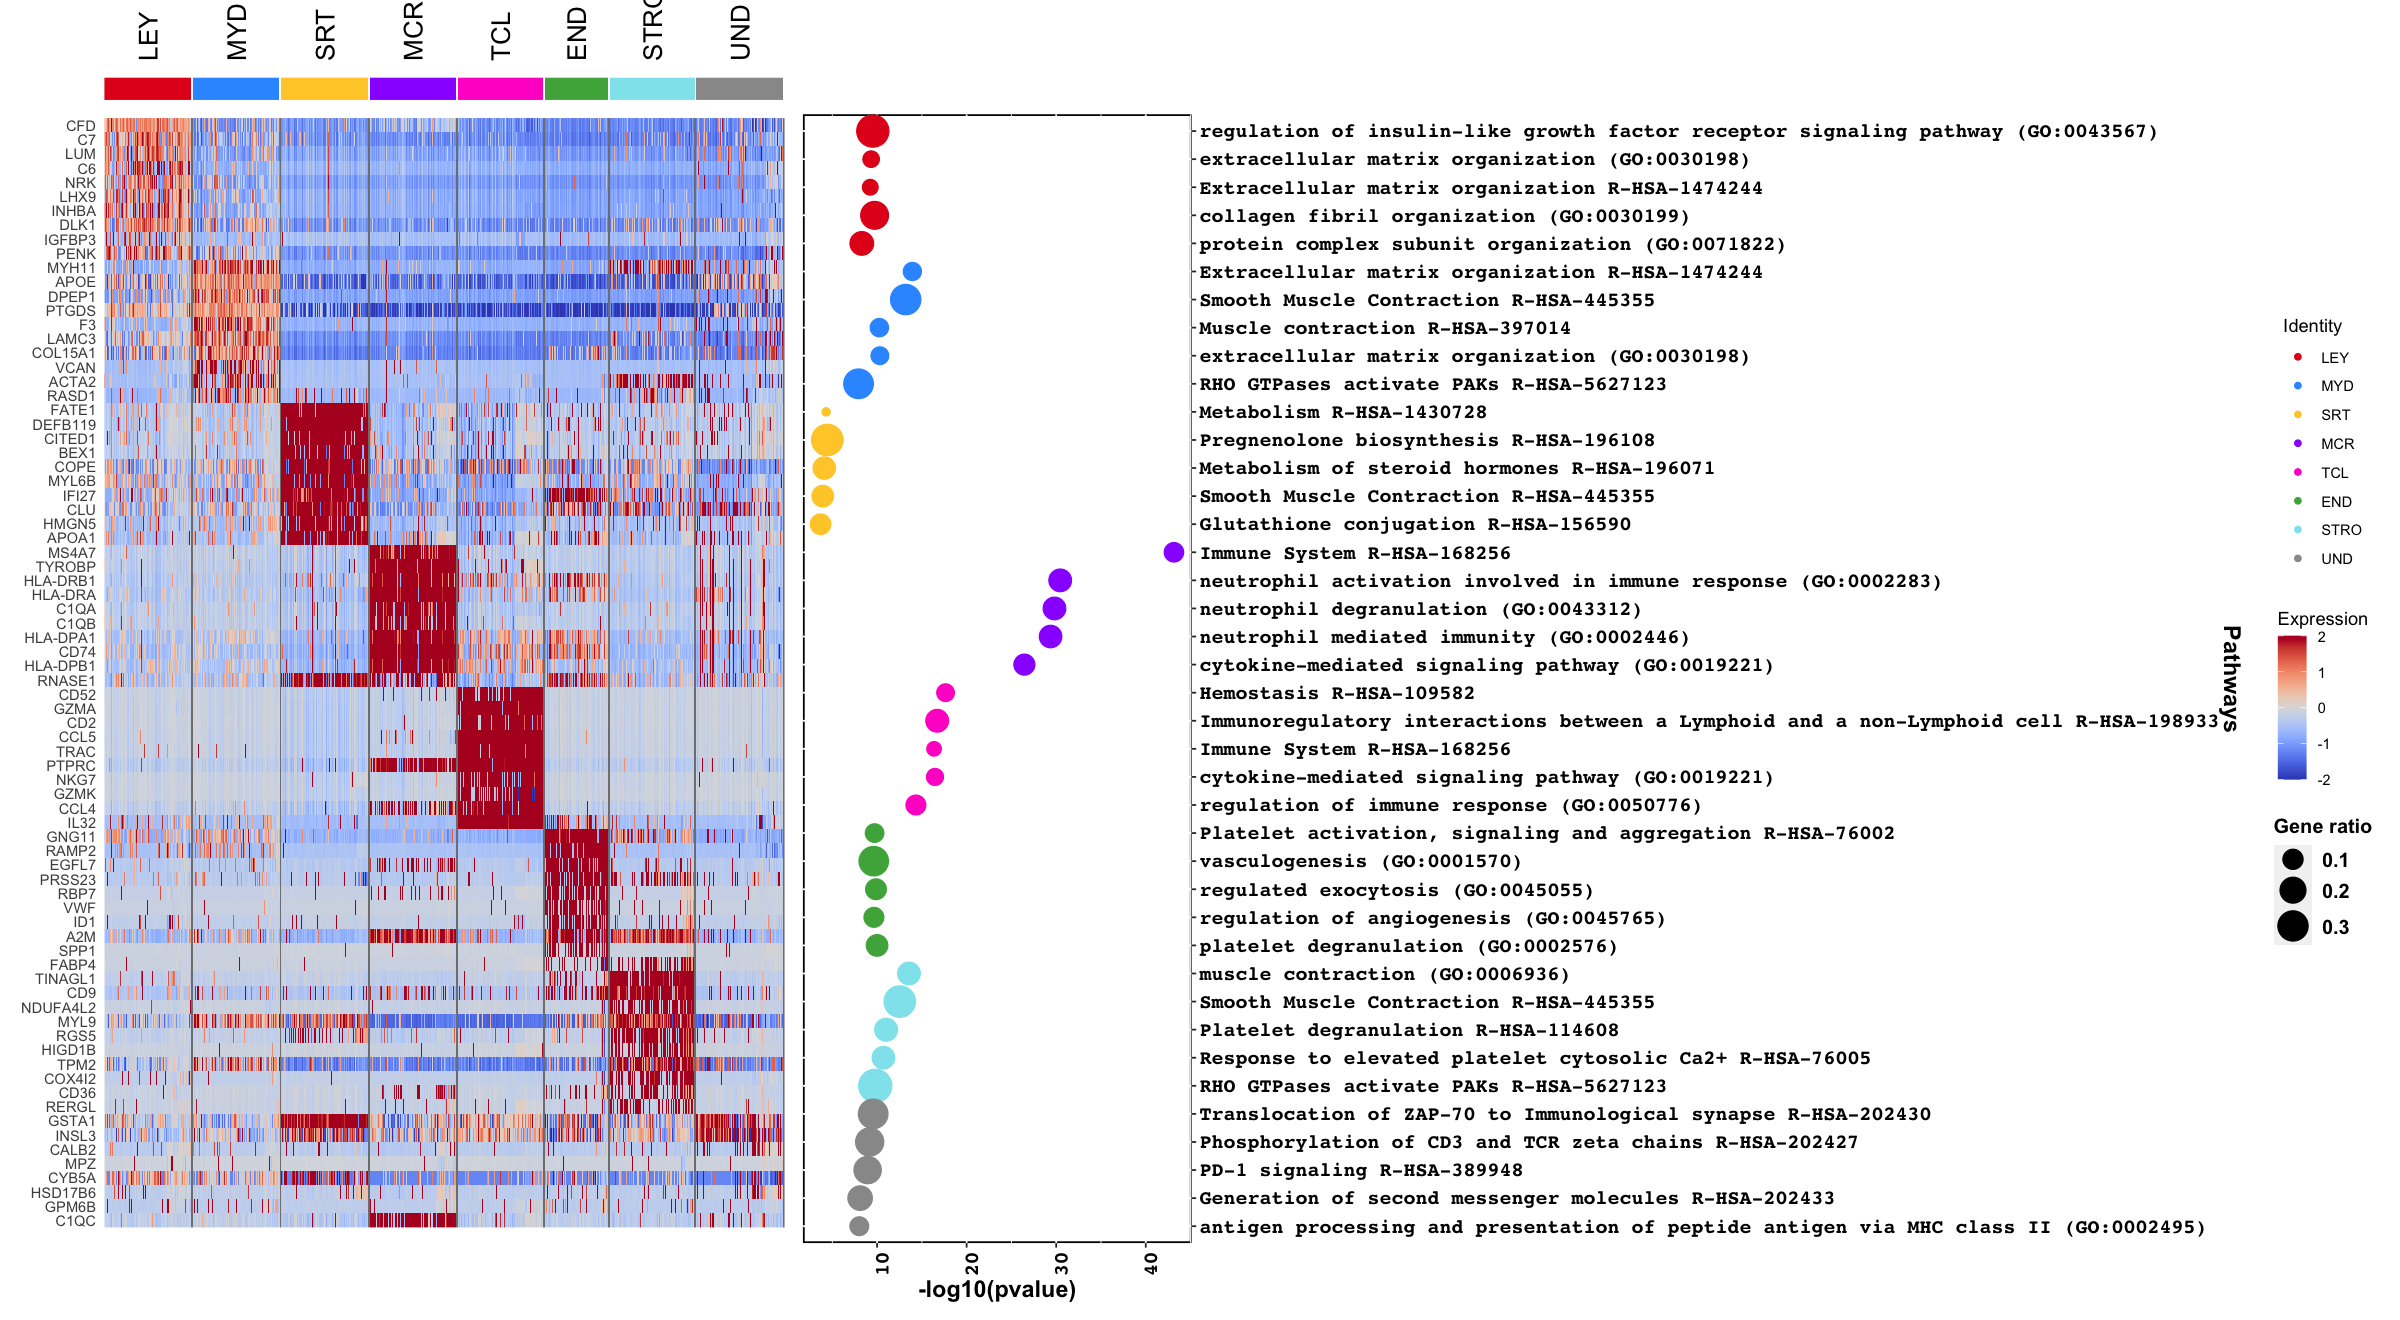

In [47]:
options(repr.plot.width=20, repr.plot.height=11)

#HM + PP + plot_layout(guides = 'collect')

layout <- '
AAAAAAA####
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
'
wrap_plots(A = HM_f, B = PP, design = layout) + plot_layout(guides = 'collect')

pdf(paste(outdir,"Figure1_panel_D_pc1Filtered.pdf",sep=''),  width=20, height=11)
wrap_plots(A = HM_f, B = PP, design = layout) + plot_layout(guides = 'collect')
dev.off()


im = image_read_pdf(paste(outdir,"Figure1_panel_D_pc1Filtered.pdf",sep=''),density = 70)
image_write(im, path = paste(outdir,"Figure1_panel_D_pc1Filtered.tiff", sep=''), format = "tiff")

In [46]:
outdir

[1] "/Users/tascini.annasofia/Dropbox (HSR Global)/Alfano_904_paperDraft/Plots"

pdf 
  2

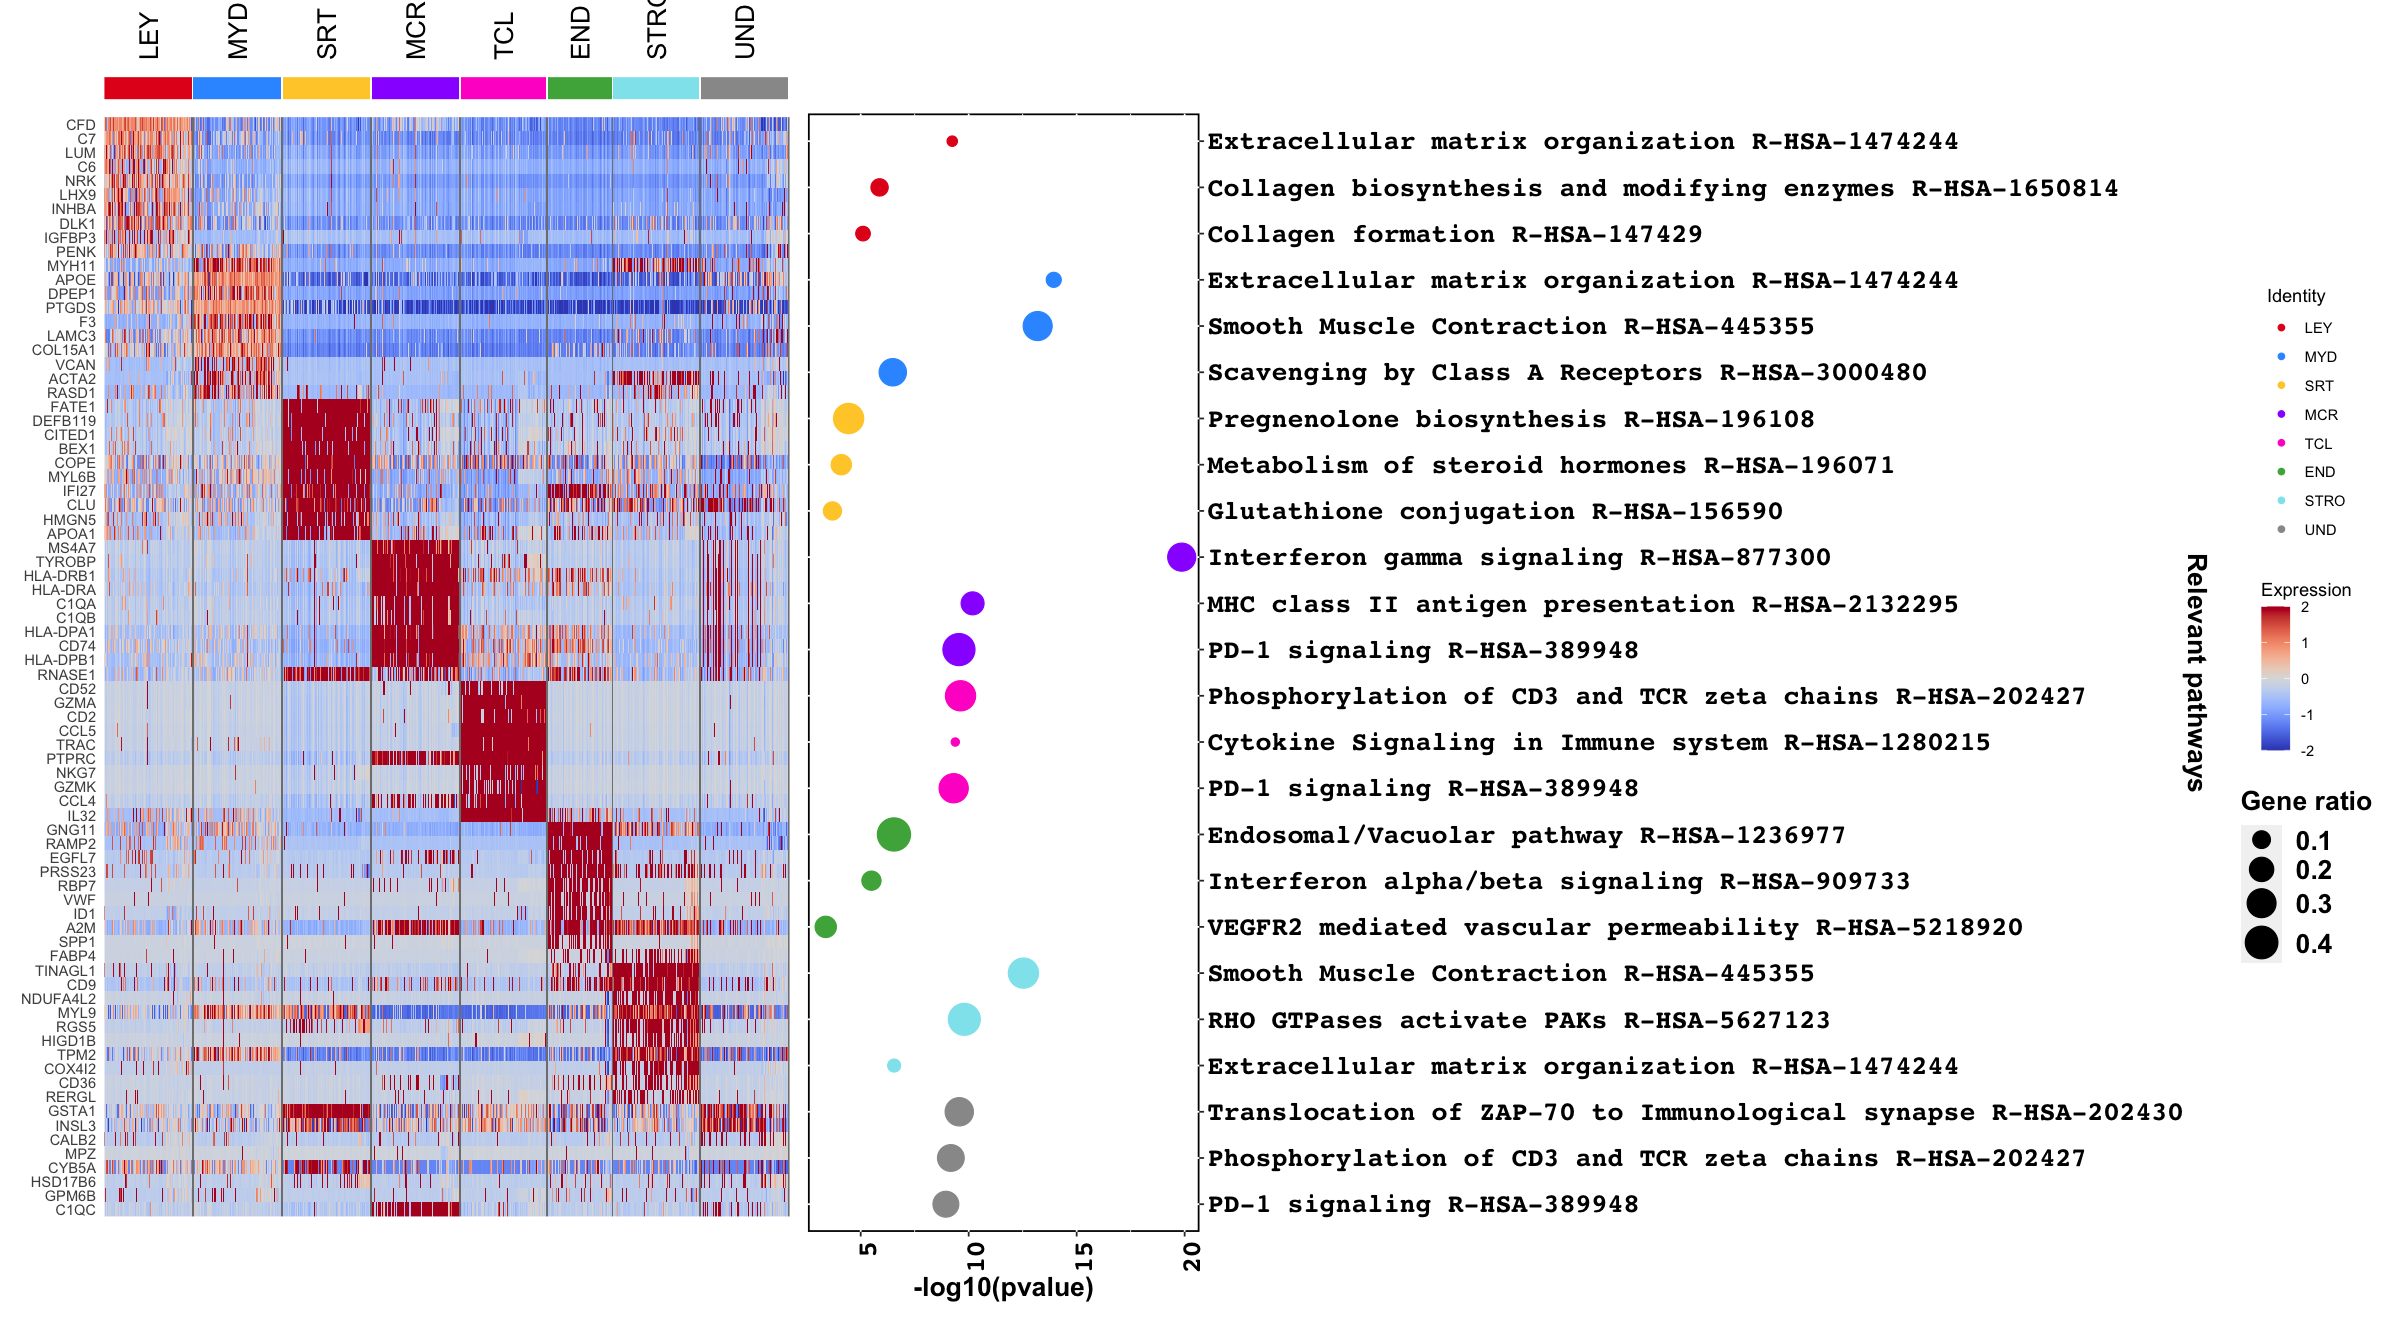

In [190]:
options(repr.plot.width=20, repr.plot.height=11)

#HM + PP + plot_layout(guides = 'collect')

layout <- '
AAAAAAA####
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
AAAAAAABBBB
'
wrap_plots(A = HM, B = PP, design = layout) + plot_layout(guides = 'collect')

pdf(paste(outdir,"Figure1_panelD.pdf",sep=''),  width=20, height=11)
wrap_plots(A = HM, B = PP, design = layout) + plot_layout(guides = 'collect')
dev.off()

im = image_read_pdf(paste(outdir,"Figure1_panelD.pdf",sep=''),density = 140)
image_write(im, path = paste(outdir,"Figure1_panelD.tiff", sep=''), format = "tiff")

In [258]:
log2(max(azoospermia.integrated.new.small@assays$integrated@scale.data))
log2(min(azoospermia.integrated.new.small@assays$integrated@scale.data))

[1] 3.321928

Warning message in eval(expr, envir, enclos):
“NaNs produced”


[1] NaN

In [259]:
?DoHeatmap

# Comparison with literature

In [184]:
load("pz.literature")

An object of class Seurat 
26266 features across 6359 samples within 1 assay 
Active assay: RNA (26266 features, 5000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

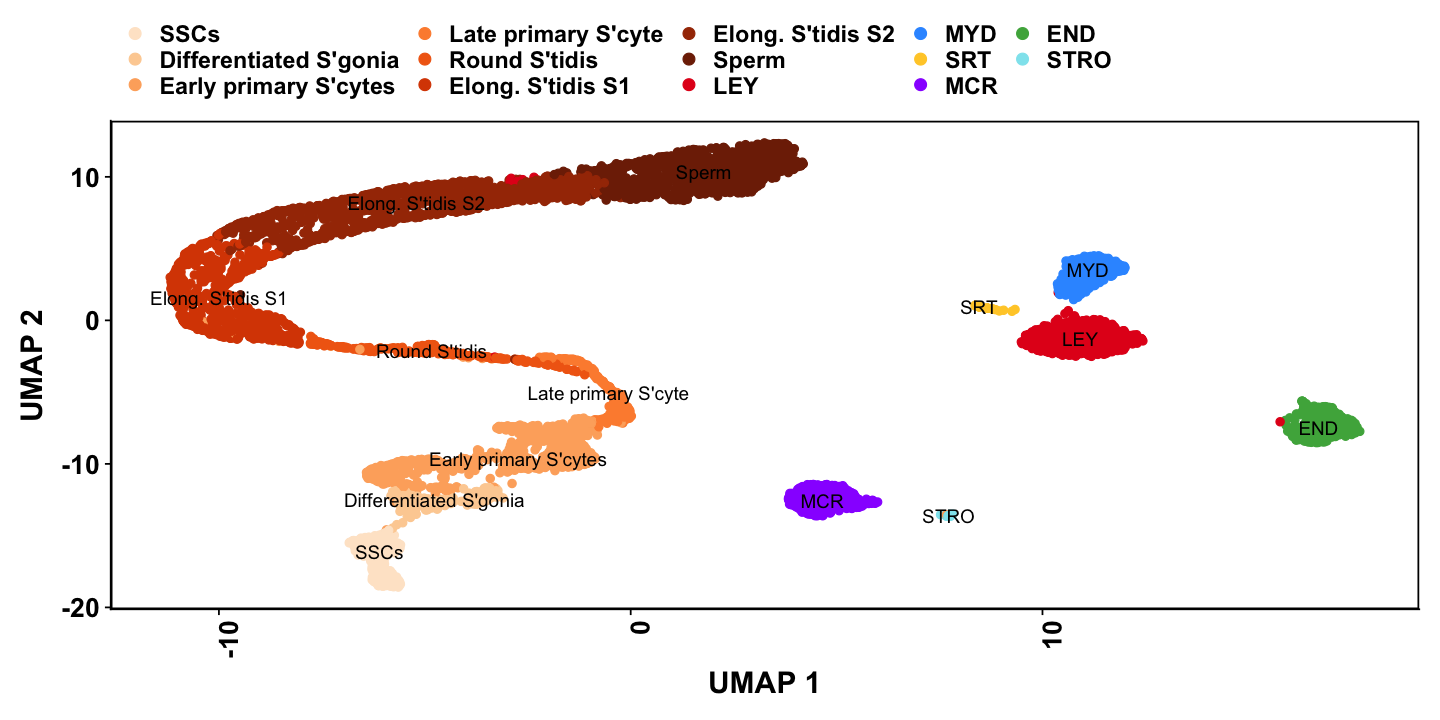

In [185]:
SO_tmp <- pz.literature
res = 0.2; nPC=20
SO_tmp <- FindNeighbors(SO_tmp, dims = 1:nPC, verbose = F)
SO_tmp <- FindClusters(SO_tmp, resolution = res, verbose = F) 
RunUMAP(SO_tmp, dims = 1:nPC, verbose = F)
pz.literature.new <- SO_tmp
new.cluster.ids <- c("Elong. S'tidis S2",
                     "Sperm",
                     "Early primary S'cytes",
                     "Elong. S'tidis S1",
                     "LEY",
                     "END",
                     "MCR",
                     "MYD",
                     "SSCs",
                     "Round S'tidis",
                     "Late primary S'cyte",
                     "Differentiated S'gonia",
                     "SRT",
                     "STRO")
    
names(new.cluster.ids) <- levels(pz.literature.new)
pz.literature.new <- RenameIdents(pz.literature.new, new.cluster.ids)
pz.literature.new@meta.data$cell_type=Idents(pz.literature.new)
pz.literature.new$cell_type <- pz.literature.new@meta.data$cell_type

order.2.plot <- c("SSCs",
                  "Differentiated S'gonia",
                  "Early primary S'cytes",
                  "Late primary S'cyte",
                  "Round S'tidis",
                  "Elong. S'tidis S1",
                  "Elong. S'tidis S2",
                  "Sperm",
                  "LEY",
                 "MYD",
                 "SRT",
                 "MCR",
                 "END",
                  "STRO")
levels(pz.literature.new) <- order.2.plot 
options(repr.plot.width=12, repr.plot.height=6)
col = c(brewer.pal(9, 'Oranges')[2:9],'#E41A1C', #L
        '#3399FF', #M
        '#FFCC33', #S
        '#9900FF', #M, 
        '#4DAF4A', #end
       'cadetblue2') 
pLit <- DimPlot(pz.literature.new, reduction = "umap", label = T, pt.size = 2) +
scale_color_manual(values = (col)) +
    theme(plot.title = element_text(color="black", size=22, face="bold.italic"),
          plot.subtitle = element_text(color="black", size=16, face="italic"),
          axis.text.x = element_text(angle = 90, face = "bold", color = 'black', size=16, hjust =1), 
          axis.title.x = element_text(face = "bold", color = "black", size = 18),
          axis.text.y = element_text(angle = 0, face = "bold", color = 'black', size=16),
          axis.title.y = element_text(face = "bold", color = "black", size = 18),
          legend.text = element_text(face = "bold", color = "black", size = 14),
          legend.position = 'top',
          panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "UMAP 1", y = "UMAP 2")  #+ NoLegend() 
pLit

pdf 
  2

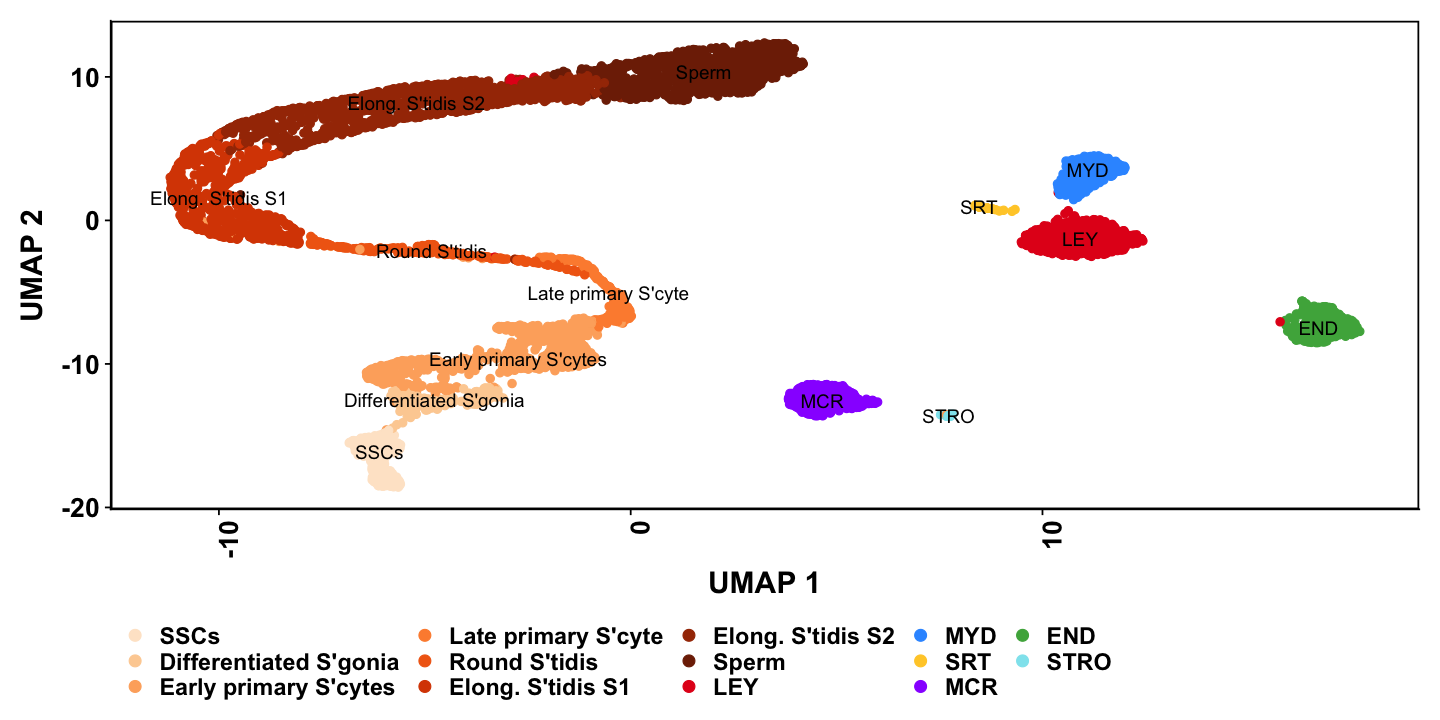

In [186]:
pLit <- DimPlot(pz.literature.new, reduction = "umap", label = T, pt.size = 2) +
scale_color_manual(values = (col)) +
    theme(plot.title = element_text(color="black", size=22, face="bold.italic"),
          plot.subtitle = element_text(color="black", size=16, face="italic"),
          axis.text.x = element_text(angle = 90, face = "bold", color = 'black', size=16, hjust =1), 
          axis.title.x = element_text(face = "bold", color = "black", size = 18),
          axis.text.y = element_text(angle = 0, face = "bold", color = 'black', size=16),
          axis.title.y = element_text(face = "bold", color = "black", size = 18),
          legend.text = element_text(face = "bold", color = "black", size = 14),
          legend.position = 'bottom',
          panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "UMAP 1", y = "UMAP 2")  #+ NoLegend() 
pLit
pdf(paste(outdir,"Litumap.pdf",sep=''),  width=10, height=12)
pLit
dev.off()

In [48]:
load('pz.179.processed.150minRNA')

In [51]:
testis.query <- pz.179.processed.150minRNA
testis.anchors <- FindTransferAnchors(reference = pz.literature.new, query = testis.query, 
                                      dims = 1:30)
predictions <- TransferData(anchorset = testis.anchors, refdata = pz.literature$cell_type, 
                            dims = 1:30)
testis.query <- AddMetaData(testis.query, metadata = predictions)

ERROR: Error in FindTransferAnchors(reference = pz.literature.new, query = testis.query, : object 'pz.literature.new' not found


In [ ]:
table(testis.query@meta.data$predicted.id)

In [50]:
pz.179 <- pz.179.processed.150minRNA
#levels(testis.query)
Seurat.object <- pz.179
new.cluster.ids <- c("spermatogenesis0",
                     "spermatogenesis1", 
                     "spermatogenesis2",
                     "spermatogenesis3",
                     "spermatogenesis4",
                     "spermatogenesis5",
                     "spermatogenesis6",
                     "spermatogenesis7",
                     "Sertoli",
                     "spermatogenesis9",
                     "Leydig")                 

names(new.cluster.ids) <- levels(Seurat.object)
Seurat.object <- RenameIdents(Seurat.object, new.cluster.ids)
pz.179 <- Seurat.object

cell2rename <- colnames(testis.query)[testis.query@meta.data$predicted.id == 'Macrophage']
pz.179.new <- SetIdent(object = pz.179, cells = cell2rename, value = 'Macrophage')

options(repr.plot.width=17, repr.plot.height=6)
a <- DimPlot(testis.query, reduction = "umap", label = F, pt.size = 3, group.by = 'predicted.id') +
#scale_color_manual(values = (col)) +
theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
      axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
      axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
      axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
      axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
      legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
      legend.position="left",
      panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "UMAP 1", y = "UMAP 2") 
b <- DimPlot(pz.179.new, reduction = "umap", label = F, pt.size = 1) +
#scale_color_manual(values = (col)) +
theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
      axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
      axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
      axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
      axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
      legend.text = element_text(face = "bold", color = "dodgerblue2", size = 12),
      legend.position="right",
      panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "UMAP 1", y = "UMAP 2")
a | b

Warning message in `Idents<-.Seurat`(object = `*tmp*`, cells = cells, value = value):
“Cannot find cells provided”


ERROR: Error in `[[.Seurat`(object, group.by): Cannot find 'predicted.id' in this Seurat object


In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
SO_tmp <- pz.179.new
res = 0.3; nPC=20
SO_tmp <- FindNeighbors(SO_tmp, dims = 1:nPC, verbose = F)
SO_tmp <- FindClusters(SO_tmp, resolution = res, verbose = F) 
RunUMAP(SO_tmp, dims = 1:nPC, verbose = F)
DimPlot(SO_tmp, reduction = "umap", label = TRUE)
table(Idents(SO_tmp))
cell2rename <- colnames(testis.query)[testis.query@meta.data$predicted.id == 'Macrophage']
SO_tmp.new <- SetIdent(object = SO_tmp, cells = cell2rename, value = 'Macrophage')

In [ ]:
pz.179.update <- SO_tmp.new
new.cluster.ids <- c("MCR",
                     "Sperm1",
                     "Sperm2",
                     "Primary S'cytes",
                     "Differentiated S'gonia",                     
                     "Elong. S'tidis S1",
                     "Elong. S'tidis S2",
                     "Round S'tidis" ,                    
                     "SRT",
                     "LEY")
    
names(new.cluster.ids) <- levels(pz.179.update)
pz.179.update<- RenameIdents(pz.179.update, new.cluster.ids)
pz.179.update@meta.data$cell_type=Idents(pz.179.update)
pz.179.update$cell_type <- pz.179.update@meta.data$cell_type

order.2.plot <- c("Differentiated S'gonia",
                  "Primary S'cytes",
                  "Round S'tidis",
                  "Elong. S'tidis S1",
                  "Elong. S'tidis S2",
                  "Sperm1",
                  "Sperm2",
                  "LEY",
                 "SRT",
                 "MCR")
levels(pz.179.update) <- order.2.plot 
options(repr.plot.width=8, repr.plot.height=6)
DimPlot(pz.179.update, reduction = "umap", label = TRUE)

In [ ]:
col = as.character(colors_Alf[levels(pz.179.update),]$cols)
A <- data.frame(prop.table(table(Idents(pz.179.update)))*100)
A2 <- data.frame(table(Idents(pz.179.update)))
A$N <- A2$Freq
options(repr.plot.width=12, repr.plot.height=6)
ct <- ggplot(data=A, aes(x=Var1, y=Freq,  label=N)) +
geom_bar(stat="identity",  color="black", fill=col, position=position_dodge()) + 
theme(plot.title = element_text(color="black", size=26, face="bold.italic"),
      axis.text.x = element_text(angle = 90, face = "bold", color = "black", size=22, vjust = .5, hjust =1), 
      axis.title.x = element_text(face = "bold", color = "black", size = 24),
      axis.text.y = element_text(angle = 0, face = "bold", color = "black", size=22),
      axis.title.y = element_text(face = "bold", color = "black", size = 24),
      legend.text = element_text(face = "bold", color = "black", size = 12),
      legend.position="top",
      panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "CellType", y = "%")+ 
geom_text(size = 7, position = position_stack(vjust = 0.5)) 

ct
pdf(paste(outdir,"CF_celltypes.pdf",sep=''),  width=10, height=7.2)
ct
dev.off()

In [ ]:
Seurat.object = pz.179.update
top10 <- SaveMarkers(Seurat.object = Seurat.object,
                          filename_xlsx = paste(outdir,'179.MK.xlsx',sep=''),
                          LogFC.onlypos = TRUE)
HM <- DoHeatmap(Seurat.object, 
                features = top10$gene, 
                group.colors = as.character(colors_Alf[levels(pz.179.update),]$cols),
                disp.min = -2,
                disp.max = 2,
                angle = 0) +
scale_fill_gradientn(colours = coolwarm(200)) + NoLegend()
pdf(paste(outdir,"179_HM.pdf",sep=''),  width=7, height=13)
HM
dev.off()

In [ ]:
Seurat.object = pz.literature.new
top10 <- SaveMarkers(Seurat.object = Seurat.object,
                          filename_xlsx = paste(outdir,'Guoetal.MK.xlsx',sep=''),
                          LogFC.onlypos = TRUE)
HM <- DoHeatmap(Seurat.object, 
                features = top10$gene, 
                group.colors = as.character(colors_Alf[levels(pz.literature.new),]$cols),
                disp.min = -2,
                disp.max = 2,
                angle = 0) +
scale_fill_gradientn(colours = coolwarm(200)) + NoLegend()
pdf(paste(outdir,"Guoetal_HM.pdf",sep=''),  width=7, height=13)
HM
dev.off()

In [187]:
#dataset to TEST (testis.query) against a reference (pz.literature)
SO <- azoospermia.integrated.new 
DefaultAssay(SO) <- "RNA"
testis.query <- SO
 
testis.anchors <- FindTransferAnchors(reference = pz.literature.new, query = testis.query,
                                      dims = 1:30, verbose = F)
predictions <- TransferData(anchorset = testis.anchors, refdata = pz.literature.new$cell_type,
                            dims = 1:30, verbose = F)
testis.query <- AddMetaData(testis.query, metadata = predictions) 

pdf 
  2

pdf 
  2

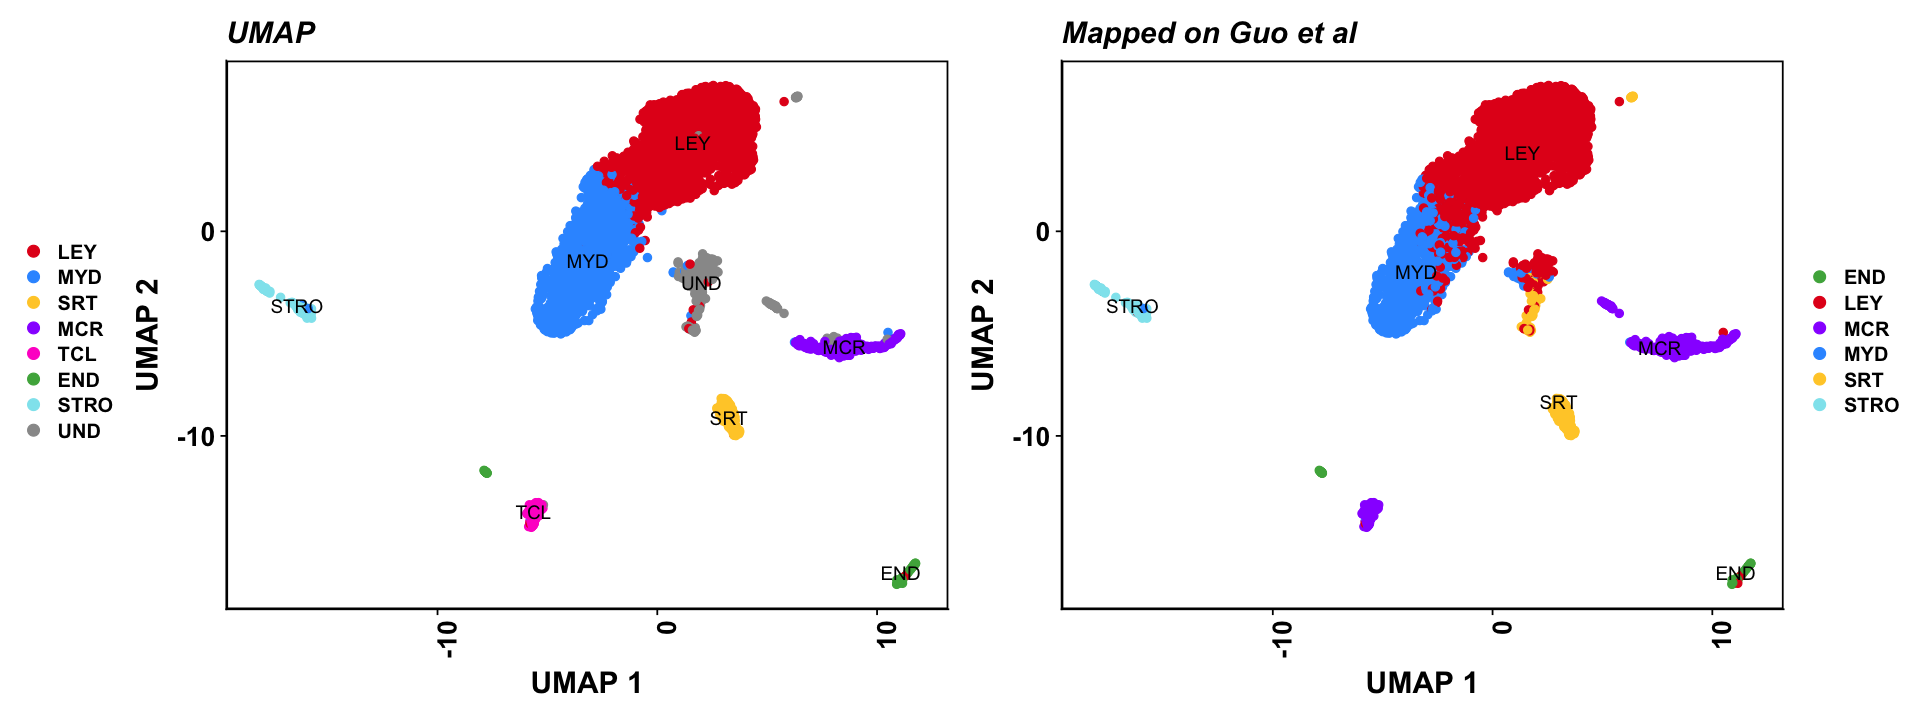

In [188]:
# compare predictions and clusters
col = as.character(colors_Alf[row.names(table(testis.query@meta.data$predicted.id)),]$cols)
b <- DimPlot(testis.query, reduction = "umap", label = T, pt.size = 2, group.by = 'predicted.id') +
scale_color_manual(values = col) +
    theme(plot.title = element_text(color="black", size=18, face="bold.italic"),
          plot.subtitle = element_text(color="black", size=16, face="italic"),
          axis.text.x = element_text(angle = 90, face = "bold", color = 'black', size=16, hjust =1), 
          axis.title.x = element_text(face = "bold", color = "black", size = 18),
          axis.text.y = element_text(angle = 0, face = "bold", color = 'black', size=16),
          axis.title.y = element_text(face = "bold", color = "black", size = 18),
          legend.text = element_text(face = "bold", color = "black", size = 12),
          legend.position="right",
          panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "UMAP 1", y = "UMAP 2",title = 'Mapped on Guo et al')

col = as.character(colors_Alf[levels(testis.query),]$cols)
a <- DimPlot(testis.query, reduction = "umap", label = T, pt.size = 2) +
scale_color_manual(values = col) +
    theme(plot.title = element_text(color="black", size=18, face="bold.italic"),
          plot.subtitle = element_text(color="black", size=16, face="italic"),
          axis.text.x = element_text(angle = 90, face = "bold", color = 'black', size=16, hjust =1), 
          axis.title.x = element_text(face = "bold", color = "black", size = 18),
          axis.text.y = element_text(angle = 0, face = "bold", color = 'black', size=16),
          axis.title.y = element_text(face = "bold", color = "black", size = 18),
          legend.text = element_text(face = "bold", color = "black", size = 12),
          legend.position="left",
          panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "UMAP 1", y = "UMAP 2", title = 'UMAP')
options(repr.plot.width=16, repr.plot.height=6)
a | b

jpeg(paste(outdir,'azoospermia.integrated_projected.Lit.jpg',sep=''),width=1400, height=600, unit='px')
plot(a | b)
dev.off()
pdf(paste(outdir,'azoospermia.integrated_projected.Lit.pdf',sep=''),width=14, height=6)
plot(a | b)
dev.off()

In [52]:
SO_tmp = azoospermia.integrated.new
DefaultAssay(SO_tmp) <- 'RNA'

options(repr.plot.width=9, repr.plot.height=7)
pL2 <- Plot_sign(SO_tmp,
          signature= c('DAZL','UTF1','ID4','FGFR3','KIT','STRA8','SYCP3','MLH3','ZPBP'), 
          operator = mean) + ggtitle('Germline markers')


pdf(paste(outdir,'iNOA_germlime_markers.pdf',sep=''),width=7, height=6)
plot(pL2)
dev.off()

pdf 
  2

In [53]:
pF <- FeaturePlot(azoospermia.integrated.new, features = 'nFeature_RNA',cols = c("lightgrey", "red"), 
                  label=T, repel = T, order = T) + 
theme(plot.title = element_text(color="black", size=18, face="bold.italic"),
          plot.subtitle = element_text(color="black", size=10, face="italic"),
          axis.text.x = element_text(angle = 90, face = "bold", color = 'black', size=16, hjust =1), 
          axis.title.x = element_text(face = "bold", color = "black", size = 18),
          axis.text.y = element_text(angle = 0, face = "bold", color = 'black', size=16),
          axis.title.y = element_text(face = "bold", color = "black", size = 18),
          legend.text = element_text(face = "bold", color = "black", size = 12),
          panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid"))
pdf(paste(outdir,'iNOA_features_RNA.pdf',sep=''),width=7, height=6)
pF
plot(pF)
dev.off()

pdf 
  2

In [ ]:
col = as.character(colors_Alf[levels(pz.literature.new),]$cols)
A <- data.frame(prop.table(table(Idents(pz.literature.new)))*100)
A2 <- data.frame(table(Idents(pz.literature.new)))
A$N <- A2$Freq
options(repr.plot.width=12, repr.plot.height=6)
ct <- ggplot(data=A, aes(x=Var1, y=Freq,  label=N)) +
geom_bar(stat="identity",  color="black", fill=col, position=position_dodge()) + 
theme(plot.title = element_text(color="black", size=26, face="bold.italic"),
      axis.text.x = element_text(angle = 90, face = "bold", color = "black", size=22, vjust = .5, hjust =1), 
      axis.title.x = element_text(face = "bold", color = "black", size = 24),
      axis.text.y = element_text(angle = 0, face = "bold", color = "black", size=22),
      axis.title.y = element_text(face = "bold", color = "black", size = 24),
      legend.text = element_text(face = "bold", color = "black", size = 12),
      legend.position="top",
      panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "CellType", y = "%")+ 
geom_text(size = 7, position = position_stack(vjust = 0.5)) 

ct
pdf(paste(outdir,"Guoetal_celltypes.pdf",sep=''),  width=10, height=7.2)
ct
dev.off()

In [ ]:
Seurat.object = azoospermia.integrated.new
leydig_signature = c('CFD','DLK1','LUM','CALB2')
myoid_signature = c('ACTA2','MYH11','DES', 'MYL9')
sertoli_signature = c('FATE1','CITED1','SOX9','AMH','CLDN11')
macrophage_signature = c('CD14','CD74','HLA-DRA','HLA-DRB1')
endothelial_signature = c('VWF', "EGFL7",'CD34', 'PRSS23', "RBP7")
t_cell_signature =  c('GZMA','GZMK','CD2','CCL5','NKG7')
pL <- Plot_sign(Seurat.object,
          signature= leydig_signature, 
          operator = mean)
pM <- Plot_sign(Seurat.object,
          signature= myoid_signature, 
          operator = mean)
pS <- Plot_sign(Seurat.object,
          signature= sertoli_signature, 
          operator = mean)
pMa <- Plot_sign(Seurat.object,
          signature= macrophage_signature, 
          operator = mean)
pE <- Plot_sign(Seurat.object,
          signature= endothelial_signature, 
          operator = mean)
pT <- Plot_sign(Seurat.object,
          signature=t_cell_signature, 
          operator = mean)

options(repr.plot.width=20, repr.plot.height=11)
(pL | pM | pS) / (pE | pMa | pT)

# Subset cells to remove for quality issues

In [ ]:
cell2remove <- colnames(azoospermia.integrated)[azoospermia.integrated@meta.data$integrated_snn_res.0.2 == '2']
str(cell2remove)
options(repr.plot.width=17, repr.plot.height=7)
DimPlot(azoospermia.integrated, cells.highlight = cell2remove, order = T, pt.size = 2, split.by = 'sample')

azoo.subset <- subset(azoospermia.integrated, cells = cell2remove, invert=T)
DimPlot(azoo.subset, cells.highlight = cell2remove, order = T, pt.size = 2, split.by = 'sample')

DefaultAssay(azoo.subset) <- "RNA"
azoo.list.new <- SplitObject(azoo.subset,split.by = "sample")
print(azoo.list.new)

In [ ]:
DefaultAssay(azoospermia.integrated.new) <-'RNA'
Seurat.object = azoospermia.integrated.new
Seurat.object.subset <- subset(x = Seurat.object, subset = INSL3 > 1, slot ='counts')
cell2remove <- colnames(Seurat.object.subset)
New.subset <- subset(Seurat.object, cells = cell2remove, invert=T)
DimPlot(Seurat.object, cells.highlight = cell2remove, order = T, pt.size = 2)
DimPlot(New.subset, order = T, pt.size = 2)



# Repeat workflow for new list - subset

In [ ]:
#Use the same filtering for all the patients

min_nFeature_RNA = 500
max_nFeature_RNA = 6000
max_percent_MT = 20

for (i in 1:length(azoo.list.new)) {
    
    azoo.list.new[[i]][["percent.mt"]] <- PercentageFeatureSet(azoo.list.new[[i]], pattern = "^MT-")
    azoo.list.new[[i]] <-  subset(azoo.list.new[[i]],
                                     subset = nFeature_RNA > min_nFeature_RNA & nFeature_RNA < max_nFeature_RNA & percent.mt < max_percent_MT)
    azoo.list.new[[i]] <- NormalizeData(azoo.list.new[[i]], 
                                           verbose = FALSE)
    azoo.list.new[[i]] <- FindVariableFeatures(azoo.list.new[[i]], 
                                                  selection.method = 'vst',
                                                  nfeatures = 2000,
                                                  verbose = FALSE)
}
print(azoo.list.new)


In [ ]:
azoospermia.anchors.subset <- FindIntegrationAnchors(object.list = azoo.list.new, dims = 1:30)
azoospermia.integrated.subset <- IntegrateData(anchorset = azoospermia.anchors.subset,
                                                         dims = 1:30)
# switch to integrated assay. The variable features of this assay are automatically
# set during IntegrateData
DefaultAssay(azoospermia.integrated.subset) <- "integrated"

# Run the standard workflow for visualization and clustering

# SCALE and regress data
azoospermia.integrated.subset <- ScaleData(azoospermia.integrated.subset, 
                                    verbose = FALSE, 
                                    vars.to.regress = c("percent.mt", "nFeature_RNA"), 
                                    features = rownames(azoospermia.integrated.subset))
# Regress for Cell Cycle
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
azoospermia.integrated.subset <- CellCycleScoring(azoospermia.integrated.subset, 
                                           s.features = s.genes, 
                                           g2m.features = g2m.genes, 
                                           set.ident = TRUE)
azoospermia.integrated.subset <- ScaleData(azoospermia.integrated.subset, 
                                    vars.to.regress = c("S.Score", "G2M.Score"), 
                                    features = rownames(azoospermia.integrated.subset)) 

azoospermia.integrated.subset <- RunPCA(azoospermia.integrated.subset, npcs = 20, verbose = FALSE)

ElbowPlot(azoospermia.integrated.subset)

nPC = 20
res = 0.1
azoospermia.integrated.subset <- FindNeighbors(azoospermia.integrated.subset, dims = 1:nPC)
azoospermia.integrated.subset <- FindClusters(azoospermia.integrated.subset, resolution = res)
azoospermia.integrated.subset <- RunUMAP(azoospermia.integrated.subset, dims = 1:nPC)
azoospermia.integrated.subset <- RunTSNE(azoospermia.integrated.subset, dims = 1:nPC)

In [ ]:
 plot_layout(ncol = 3)options(repr.plot.width=17, repr.plot.height=7)
p1 = DimPlot(azoospermia.integrated.subset, reduction = "umap", label = T, pt.size = 1) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 
p2 = DimPlot(azoospermia.integrated.subset, reduction = "umap", group.by = 'orig.ident',label = F, pt.size = 1) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 
CombinePlots(plots = list(p1, p2), ncol = 2)

In [ ]:
res.combined.plot <- VaryResolution(azoospermia.integrated.subset2)
options(repr.plot.width=17, repr.plot.height=17)
res.combined.plot

In [ ]:
#Assign cluster to cell types 
new.cluster.ids <- c("Leydig", "Myoid","Macrophage", "Sertoli", "T-cells", "Endothelial", "Unassigned1", "Unassigned2")
names(new.cluster.ids) <- levels(azoospermia.integrated.subset)
azoospermia.integrated.subset2 <- RenameIdents(azoospermia.integrated.subset, new.cluster.ids)
DimPlot(azoospermia.integrated.subset2, reduction = "umap", label = TRUE, pt.size = 2)

azoospermia.integrated.subset2@meta.data$cell_type=Idents(azoospermia.integrated.subset2)
azoospermia.integrated.subset2$cell_type <- azoospermia.integrated.subset2@meta.data$cell_type

In [ ]:
#str(azoospermia.integrated.subset2)
counts <- azoospermia.integrated.subset2@assays$RNA@counts
metadata.integrated.subset <- as.data.frame(azoospermia.integrated.subset2$cell_type)

#filename_xls <- paste('raw.counts.azoospermia.xlsx', 
#                      sep='')

#write.xlsx(as.data.frame(as.matrix(counts)),
#           file= filename_xls, 
#           row.names = T,
#           asTable = T)

In [ ]:
matrix.azoospermia <- azoospermia.integrated.subset2@assays$RNA@counts
write.table(x = as.data.frame(as.matrix(matrix.azoospermia)),
            file = "azoosmermia.count.txt",
            row.names = T, 
            quote = F,
           sep = "\t")

In [ ]:
HM_integrated.subset <- SaveMarkers(azoospermia.integrated.subset2,
                                  'azzospermia.integrated.subset.LogFC.module.xlsx')

In [ ]:
options(repr.plot.width=17, repr.plot.height=15)
HM_integrated.subset

In [ ]:
Genes_in_pathway <- list()
Genes_in_pathway[['Extracellular matrix organization']] = c('COL14A1','COL12A1','COL1A1','COL3A1','COL1A2','COL6A3',
                                                            'LUM','LAMA4','LTBP4','FN1','PCOLCE','FBLN1','DCN','ADAMTS5','ADAMTS1','FBN1')
for (gene in Genes_in_pathway[['Extracellular matrix organization']]) {
    a <- PlotFeature(azoospermia.integrated.subset2, gene)
    assign(paste('plot_',gene, sep=''), a)
}


In [ ]:
collagene_genes <- c('COL4A1','COL4A2','COL4A3','COL4A4','COL4A5','COL4A6','COL4A3BP',
                    'COL1A1', 'COL1A2')
PlotFeature(azoospermia.integrated.subset2, 'COL4A1')
PlotFeature(azoospermia.integrated.subset2, 'COL4A2')
PlotFeature(azoospermia.integrated.subset2, 'COL4A3')
PlotFeature(azoospermia.integrated.subset2, 'COL4A4')
PlotFeature(azoospermia.integrated.subset2, 'COL4A5')
PlotFeature(azoospermia.integrated.subset2, 'COL4A6')
PlotFeature(azoospermia.integrated.subset2, 'COL4A3BP')
PlotFeature(azoospermia.integrated.subset2, 'COL1A1')
PlotFeature(azoospermia.integrated.subset2, 'COL1A2')

In [ ]:
set.seed(20160229)

my_data = data.frame(
    y=c(rnorm(1000), rnorm(1000, 0.5), rnorm(1000, 1), rnorm(1000, 1.5)),
    x=c(rep('a', 2000), rep('b', 2000)),
    m=c(rep('i', 1000), rep('j', 2000), rep('i', 1000))
)

In [ ]:
GeomSplitViolin <- ggproto("GeomSplitViolin", GeomViolin, 
                           draw_group = function(self, data, ..., draw_quantiles = NULL) {
  data <- transform(data, xminv = x - violinwidth * (x - xmin), xmaxv = x + violinwidth * (xmax - x))
  grp <- data[1, "group"]
  newdata <- plyr::arrange(transform(data, x = if (grp %% 2 == 1) xminv else xmaxv), if (grp %% 2 == 1) y else -y)
  newdata <- rbind(newdata[1, ], newdata, newdata[nrow(newdata), ], newdata[1, ])
  newdata[c(1, nrow(newdata) - 1, nrow(newdata)), "x"] <- round(newdata[1, "x"])

  if (length(draw_quantiles) > 0 & !scales::zero_range(range(data$y))) {
    stopifnot(all(draw_quantiles >= 0), all(draw_quantiles <=
      1))
    quantiles <- ggplot2:::create_quantile_segment_frame(data, draw_quantiles)
    aesthetics <- data[rep(1, nrow(quantiles)), setdiff(names(data), c("x", "y")), drop = FALSE]
    aesthetics$alpha <- rep(1, nrow(quantiles))
    both <- cbind(quantiles, aesthetics)
    quantile_grob <- GeomPath$draw_panel(both, ...)
    ggplot2:::ggname("geom_split_violin", grid::grobTree(GeomPolygon$draw_panel(newdata, ...), quantile_grob))
  }
  else {
    ggplot2:::ggname("geom_split_violin", GeomPolygon$draw_panel(newdata, ...))
  }
})

geom_split_violin <- function(mapping = NULL, data = NULL, stat = "ydensity", position = "identity", ..., 
                              draw_quantiles = NULL, trim = TRUE, scale = "area", na.rm = FALSE, 
                              show.legend = NA, inherit.aes = TRUE) {
  layer(data = data, mapping = mapping, stat = stat, geom = GeomSplitViolin, 
        position = position, show.legend = show.legend, inherit.aes = inherit.aes, 
        params = list(trim = trim, scale = scale, draw_quantiles = draw_quantiles, na.rm = na.rm, ...))
}

In [ ]:
ggplot(my_data, aes(x, y, fill = m)) + geom_split_violin()

In [ ]:
my_data

In [ ]:
genes_insulin <- c("IGFBP5","IGFBP4","IGFBP3","IGFBP6")

In [ ]:
options(repr.plot.width=12, repr.plot.height=5)
PlotFeature(azoospermia.integrated.subset2, 'CFD')
PlotFeature(azoospermia.integrated.subset2, 'MYH11')
PlotFeature(azoospermia.integrated.subset2, 'HLA-DRB1')
PlotFeature(azoospermia.integrated.subset2, 'FATE1')
PlotFeature(azoospermia.integrated.subset2, 'GZMA')
PlotFeature(azoospermia.integrated.subset2, 'VWF')

In [ ]:
# save HEatmap and UMAP into pdf format 
pdf("Heatmap_integration_allClusters_subset.pdf",  width=17, height=15)
DoHeatmap(azoospermia.integrated.subset2, 
          features = top10$gene, 
          angle = 90) + NoLegend()
dev.off() 

pdf("UMAP_integration_allClusters_subset.pdf",  width=8, height=5)
DimPlot(azoospermia.integrated.subset2, reduction = "umap",label = T, pt.size = 2) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 
dev.off() 

# Cell type Subset

In [ ]:
LeydigMyoid.integrated.subset <- SubsetFunction(Seraut.object = azoospermia.integrated.subset2, 
                                           cell_type = c('Leydig','Myoid'))

nPC=20
res=0.5
LeydigMyoid.integrated.subset <- RunPCA(LeydigMyoid.integrated.subset, npcs = 20, verbose = FALSE)
    ElbowPlot(LeydigMyoid.integrated.subset)
    LeydigMyoid.integrated.subset <- FindNeighbors(LeydigMyoid.integrated.subset, dims = 1:nPC)
    LeydigMyoid.integrated.subset <- FindClusters(LeydigMyoid.integrated.subset, resolution = res)
    LeydigMyoid.integrated.subset <- RunUMAP(LeydigMyoid.integrated.subset, dims = 1:15)
    LeydigMyoid.integrated.subset <- RunTSNE(LeydigMyoid.integrated.subset, dims = 1:15)

In [ ]:
res=0.5
p1 = DimPlot(LeydigMyoid.integrated.subset, reduction = "umap", label = T, pt.size = 2) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 
p2 = DimPlot(LeydigMyoid.integrated.subset, reduction = "umap", group.by = 'orig.ident',label = F, pt.size = 2) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 
p1 | p2

In [ ]:
HM_integrated.subset <- SaveMarkers(LeydigMyoid.integrated.subset,
                                  'LeydigMyoid.integrated.subset_markers.xlsx')

In [ ]:
HM_integrated.subset

In [ ]:
options(repr.plot.width=18, repr.plot.height=7)
vp <- VlnPlt_subset(Seraut.object = azoospermia.integrated.subset2,
                   cell_type = c('Leydig'),
                   features = collagene_genes )
vp

In [ ]:
vp <- VlnPlt_subset(Seraut.object = azoospermia.integrated.subset2,
                   cell_type = c('Leydig'),
                   features = Genes_in_pathway[['Extracellular matrix organization']] )
vp 

In [ ]:
vp <- VlnPlt_subset(Seraut.object = azoospermia.integrated.subset2,
                   cell_type = c('Endothelial'),
                   features = Genes_in_pathway[["Platelet activation, signaling and aggregation"]] )
vp 

In [ ]:
LeydigCell <- colnames(azoospermia.integrated.subset2)[azoospermia.integrated.subset2@meta.data$cell_type == 'Leydig']
str(LeydigCell)
options(repr.plot.width=17, repr.plot.height=7)
DimPlot(azoospermia.integrated.subset2, cells.highlight = LeydigCell, order = T, pt.size = 2, split.by = 'sample')

Leydig.subset <- subset(azoospermia.integrated.subset2, cells = LeydigCell, invert=F)

subset.counts <- Leydig.subset@assays$RNA@counts
#subset.counts <- integrated.subset@assays$RNA@counts
gene_list <- Genes_in_pathway[['Extracellular matrix organization']]

gene.counts.dataframe = data.frame(gene = character(),
                                 cell_barcode = character(),
                                 counts = integer(),
                                 stringsAsFactors=FALSE)


for (gene in gene_list) {
    gene.counts.tmp = subset.counts[gene,]
    gene.counts.dataframe.entry = data.frame(gene = rep(gene, length(gene.counts.tmp)),
                                             cell_barcode =  names(gene.counts.tmp), 
                                             counts = (gene.counts.tmp))
    gene.counts.dataframe <- rbind(gene.counts.dataframe, gene.counts.dataframe.entry)
    
}

vp <- ggplot(gene.counts.dataframe, aes(x=gene, y = counts, fill=gene)) + 
        geom_violin(trim=FALSE) + scale_y_continuous(trans='log10') +
        geom_jitter(shape=16, position=position_jitter(0.4)) 
vp

In [ ]:
#### Gene Alfano
signature = list()
SERTOLI_markers = c('AMH', 'SOX9', 'CLDN11', 'FATE1') #, 
#                    'RP13-49I15.5')
signature[['SERTOLI']] <- SERTOLI_markers
LEYDIG_markers = c('CALB2', 'INSL3', 'DLK1', 'LHCGR')#, 
#                   'CFD', 'IGFBP3', 'IGFBP5', 'IGF2', 'SLC25A37', 'GSTA1', 'SYCP3')
signature[['LEYDIG']] <- LEYDIG_markers
MYOID_markers = c('MYH11', 'ACTA2', 'MYL9', 'DES')
signature[['MYOID']] <- MYOID_markers
ENDOTHELIAL_markers = c('VWF', 'CD36', 'CD34', 'PECAM1')#, 
#                        'NOTCH4', 'JAG1', 'HES1', 'PALMD', 'PDGFB', 'TGFBR2', 'RGS5', 'EPAS1', 'NOSTRIN')
signature[['ENDOTHELIAL']] <- ENDOTHELIAL_markers
MACROPHAGE_markers = c('CD14', 'CD68', 'CD86', 'CD163')#, 
#                        'C1QA', 'HLA-DRB1', 'HLA-DPB1', 'CCR5', 'CD74', 'RGS1', 
#                        'CXCR4', 'TYROBP', 'CSF1R', 'MSR1', 'S100A4')
signature[['MACROPHAGE']] <- MACROPHAGE_markers
LEYDIG_MYOID_markers = c('ALDH1A3', 'ALDH1A1')
signature[['LEYDIG_MYOID']] <- LEYDIG_MYOID_markers

cell_types <- c("SERTOLI", "LEYDIG" , "MYOID", "ENDOTHELIAL", "LEYDIG_MYOID", "MACROPHAGE")
x <- azoospermia.integrated.subset
  #pz.7209.processed_2
#x <- RunTSNE(x, features = VariableFeatures(object = pz))
for (s in cell_types) {
  print(s)
  x[["Sign_exp"]] <- apply(FetchData(object = x, vars = signature[[s]]),1,mean)
  assign(paste('Plot_Sign',s,sep=''), 
         FeaturePlot(x, reduction = "umap", 
                     features = 'Sign_exp', 
                     label = T, 
                     cols = c("lightgrey", "red")) +
         theme(plot.title = element_text(color="blue", size=22, face="bold.italic"),
               plot.subtitle = element_text(color="dodgerblue2", size=16, face="italic"),
               axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=16, hjust =1), 
               axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 18),
               axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=16),
               axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 18),
               legend.text = element_text(face = "bold", color = "dodgerblue2", size = 12),
               panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
         labs(title= 'Signture expression', subtitle = paste(s,' - MG: ',toString(signature[[s]]), sep=''), x = "UMAP 1", y = "UMAP 2")) 
}
options(repr.plot.width=12, repr.plot.height=10)
CombinePlots(plots = list(Plot_SignSERTOLI, 
             Plot_SignLEYDIG,
             Plot_SignMYOID,
             Plot_SignMACROPHAGE,
             Plot_SignENDOTHELIAL,
             Plot_SignLEYDIG_MYOID), ncol = 2)



In [ ]:
signature_M1 <- c("NFKB1","STAT1","STAT3","AP1","IL6","IL12","IL23")

Plot_sign <- function(Seraut.object, signature, operator = sum) {
    x <- Seraut.object
    DefaultAssay(x) <- "RNA"
    x[["Sign_exp"]] <- apply(FetchData(object = x, 
                                       vars = signature),
                             1,
                             operator)
    FP <- FeaturePlot(x, reduction = "umap", 
                      features = 'Sign_exp', 
                      label = T, 
                      cols = c("lightgrey", "red")) +
    theme(plot.title = element_text(color="blue", size=22, face="bold.italic"),
          plot.subtitle = element_text(color="dodgerblue2", size=16, face="italic"),
          axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=16, hjust =1), 
          axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 18),
          axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=16),
          axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 18),
          legend.text = element_text(face = "bold", color = "dodgerblue2", size = 12),
          panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
    labs(title= 'Signture expression', subtitle = paste('MG: ',toString(signature), sep=''), 
         x = "UMAP 1", y = "UMAP 2") 
    return(FP)
    }
collagene_genes <- c('COL4A1','COL4A2','COL4A3','COL4A4','COL4A5','COL4A6','COL4A3BP',
                    'COL1A1', 'COL1A2')
Plot_sign(azoospermia.integrated.subset2,
          signature= c('COL1A1', 'COL1A2'), 
          operator = sum)
Plot_sign(azoospermia.integrated.subset2,
          signature= c("COL4A1","COL4A2"), 
          operator = sum)

In [ ]:
Genes_in_pathway <- list()
Genes_in_pathway[['Extracellular matrix organization']] = c('COL14A1','COL12A1','COL1A1','COL3A1','COL1A2','COL6A3',
                                                            'LUM','LAMA4','LTBP4','FN1','PCOLCE','FBLN1','DCN','ADAMTS5','ADAMTS1','FBN1')
Genes_in_pathway[['Regulation of Insulin-like Growth Factor']] = c("IGFBP5","IGFBP4","IGFBP3","IGF2","IGF1","IGFBP6")
Genes_in_pathway[['Collagen biosynthesis and modifying enzymes']] = c("COL1A1","COL3A1","COL1A2","COL14A1","COL12A1","COL6A3","PCOLCE")
Genes_in_pathway[['Senescence and Autophagy in Cancer']] = c("COL1A1","JUN","COL3A1","GSN","IGFBP5","IGFBP3","FN1","IGFBP7","INHBA","IGF1")
Genes_in_pathway[["Platelet activation, signaling and aggregation"]] = c("VAV3","SRGN","DGKE","PRKCH","VWF","F2R",'FN1',"ACTN4",'GNG11',"CLU","RHOB","F8","MMRN1","TMSB4X","PLCG2","PECAM1","TIMP3","CD9","CD36","A2M")

# infertility comparison

In [ ]:
infertility.list <- list()
#metadata
pz.198.raw$sample <- 'pz198'
pz.204sx.raw$sample <- 'pz204sx'
pz.205.raw$sample <- 'pz205'
pz.179.raw$sample <- 'pz179'
pz.198.raw$condition <- 'azoospermia'
pz.204sx.raw$condition <- 'azoospermia'
pz.205.raw$condition <- 'azoospermia'
pz.179.raw$condition <- 'cystic_fibrosis'
# make cell id unique
pz.198.raw <- RenameCells(pz.198.raw, add.cell.id = 'pz198_')
pz.204sx.raw <- RenameCells(pz.204sx.raw, add.cell.id = 'pz204sx_')
pz.205.raw <- RenameCells(pz.205.raw, add.cell.id = 'pz205_')
pz.179.raw <- RenameCells(pz.179.raw, add.cell.id = 'pz179_')

infertility.list  <- list(pz.198.raw, pz.204sx.raw, pz.205.raw, pz.179.raw)
names(infertility.list) <- c('pz198', 'pz204sx','pz205','pz179')
print("sample in the analysis")
print(infertility.list)

In [ ]:
#Use the same filtering for all the patients

min_nFeature_RNA = 500
max_nFeature_RNA = 6000
max_percent_MT = 20

for (i in 1:length(infertility.list)) {
    
    infertility.list[[i]][["percent.mt"]] <- PercentageFeatureSet(infertility.list[[i]], pattern = "^MT-")
    infertility.list[[i]] <-  subset(infertility.list[[i]],
                                     subset = nFeature_RNA > min_nFeature_RNA & nFeature_RNA < max_nFeature_RNA & percent.mt < max_percent_MT)
    infertility.list[[i]] <- NormalizeData(infertility.list[[i]], 
                                           verbose = FALSE)
    infertility.list[[i]] <- FindVariableFeatures(infertility.list[[i]], 
                                                  selection.method = 'vst',
                                                  nfeatures = 2000,
                                                  verbose = FALSE)
}
print("samples after QC filtering:")
print(infertility.list)

In [ ]:
# integration CCA 
infertility.anchors <- FindIntegrationAnchors(object.list = infertility.list, dims = 1:30)
infertility.integrated <- IntegrateData(anchorset = infertility.anchors, dims = 1:30)

# switch to integrated assay. 
# The variable features of this assay are automatically set during IntegrateData
DefaultAssay(infertility.integrated) <- "integrated"

# Run the standard workflow for visualization and clustering

# SCALE and regress data
infertility.integrated <- ScaleData(infertility.integrated, 
                                    verbose = FALSE, 
                                    vars.to.regress = c("percent.mt", "nFeature_RNA"), 
                                    features = rownames(infertility.integrated))
# Regress for Cell Cycle
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
infertility.integrated <- CellCycleScoring(infertility.integrated, 
                                           s.features = s.genes, 
                                           g2m.features = g2m.genes, 
                                           set.ident = TRUE)
azoospermia.integrated <- ScaleData(infertility.integrated, 
                                    vars.to.regress = c("S.Score", "G2M.Score"), 
                                    features = rownames(infertility.integrated)) 

infertility.integrated <- RunPCA(infertility.integrated, npcs = 30, verbose = FALSE)
ElbowPlot(infertility.integrated)


In [ ]:
nPC=15
infertility.integrated <- RunUMAP(infertility.integrated, reduction = "pca", dims = 1:nPC)

options(repr.plot.width=10, repr.plot.height=7)
DimPlot(infertility.integrated, reduction = "umap", pt.size = 2)
DimPlot(infertility.integrated, reduction = "umap", pt.size = 2, split.by = "sample")
DimPlot(infertility.integrated, reduction = "umap", pt.size = 2, split.by = "condition")

In [ ]:
infertility.integrated <- FindNeighbors(infertility.integrated, dims = 1:15)
infertility.integrated <- FindClusters(infertility.integrated, resolution = 0.2)
infertility.integrated <- RunUMAP(infertility.integrated, dims = 1:15)
infertility.integrated <- RunTSNE(infertility.integrated, dims = 1:15)

In [ ]:
#options(repr.plot.width=17, repr.plot.height=7)
options(repr.plot.width=15, repr.plot.height=6)
p1 = DimPlot(infertility.integrated, reduction = "umap", label = T, pt.size = 1) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs( x = "UMAP 1", y = "UMAP 2") 
p2 = DimPlot(infertility.integrated, reduction = "umap", group.by = 'condition',label = F, pt.size = .5, 
             cols = c( 'magenta', 'blue')) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(x = "UMAP 1", y = "UMAP 2") 
#pdf("clusters_integration_combined.pdf")
#options(repr.plot.width=20, repr.plot.height=7)
#CombinePlots(plots = list(p1, p2), ncol = 2)
#dev.off() 
p1 | p2

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)
DimPlot(infertility.integrated, reduction = "umap", label = T, pt.size = 2, split.by ='condition') + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(x = "UMAP 1", y = "UMAP 2") 

In [ ]:
DimPlot(infertility.integrated, reduction = "umap", label = T, pt.size = 2, split.by ='sample') + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2")

In [ ]:
DefaultAssay(infertility.integrated) <- "RNA"
#infertility.integrated2 <- ScaleData(infertility.integrated)
HM_infertility.integrated <- SaveMarkers(infertility.integrated,
                                         'infertility.integrated_markers_2.xlsx',
                                         LogFC.onlypos = TRUE )
options(repr.plot.width=17, repr.plot.height=17)
HM_infertility.integrated

In [ ]:
options(repr.plot.width=17, repr.plot.height=17)
HM_infertility.integrated

In [ ]:
cell2remove <- colnames(infertility.integrated)[infertility.integrated@meta.data$integrated_snn_res.0.2 == '2']
str(cell2remove)
options(repr.plot.width=17, repr.plot.height=7)
DimPlot(infertility.integrated, cells.highlight = cell2remove, order = T, pt.size = 2, split.by = 'sample')

infert.subset <- subset(infertility.integrated, cells = cell2remove, invert=T)
DimPlot(infert.subset, cells.highlight = cell2remove, order = T, pt.size = 2, split.by = 'sample')

DefaultAssay(infert.subset) <- "RNA"
infert.list.new <- SplitObject(infert.subset,split.by = "sample")
print("Samples after subset")
print(infert.list.new)

In [ ]:
#Use the same filtering for all the patients
#####TO MODIFY
min_nFeature_RNA = 500
max_nFeature_RNA = 6000
max_percent_MT = 20

for (i in 1:length(infert.list.new)) {
    
    infert.list.new[[i]][["percent.mt"]] <- PercentageFeatureSet(infert.list.new[[i]], pattern = "^MT-")
    infert.list.new[[i]] <-  subset(infert.list.new[[i]],
                                     subset = nFeature_RNA > min_nFeature_RNA & nFeature_RNA < max_nFeature_RNA & percent.mt < max_percent_MT)
    infert.list.new[[i]] <- NormalizeData(infert.list.new[[i]], 
                                           verbose = FALSE)
    infert.list.new[[i]] <- FindVariableFeatures(infert.list.new[[i]], 
                                                  selection.method = 'vst',
                                                  nfeatures = 2000,
                                                  verbose = FALSE)
}
print("Samples after subset and QC filtering")
print(infert.list.new)



In [ ]:
infertilita.anchors.subset <- FindIntegrationAnchors(object.list = infert.list.new, dims = 1:30)
infertilita.integrated.subset <- IntegrateData(anchorset = infertilita.anchors.subset,
                                                         dims = 1:30)
# switch to integrated assay. The variable features of this assay are automatically
# set during IntegrateData
#DefaultAssay(infertilita.integrated.subset) <- "integrated"

# Run the standard workflow for visualization and clustering

# SCALE and regress data
infertilita.integrated.subset <- ScaleData(infertilita.integrated.subset, 
                                    verbose = FALSE, 
                                    vars.to.regress = c("percent.mt", "nFeature_RNA"), 
                                    features = rownames(infertilita.integrated.subset))
# Regress for Cell Cycle
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
infertilita.integrated.subset <- CellCycleScoring(infertilita.integrated.subset, 
                                           s.features = s.genes, 
                                           g2m.features = g2m.genes, 
                                           set.ident = TRUE)
infertilita.integrated.subset <- ScaleData(infertilita.integrated.subset, 
                                    vars.to.regress = c("S.Score", "G2M.Score"), 
                                    features = rownames(infertilita.integrated.subset)) 

DefaultAssay(infertilita.integrated.subset) <- "integrated"
infertilita.integrated.subset <- ScaleData(infertilita.integrated.subset, 
                                            verbose = FALSE)
infertilita.integrated.subset <- RunPCA(infertilita.integrated.subset, npcs = 30, verbose = FALSE)

ElbowPlot(infertilita.integrated.subset)



In [ ]:
ElbowPlot(infertilita.integrated.subset)

In [ ]:
#infertilita.integrated.subset <- RunPCA(infertilita.integrated.subset, npcs = 20, verbose = FALSE)
nPC = 20
res = 0.2
infertilita.integrated.subset <- FindNeighbors(infertilita.integrated.subset, dims = 1:nPC)
infertilita.integrated.subset <- FindClusters(infertilita.integrated.subset, resolution = res)
infertilita.integrated.subset <- RunUMAP(infertilita.integrated.subset, dims = 1:nPC)
infertilita.integrated.subset <- RunTSNE(infertilita.integrated.subset, dims = 1:nPC)

In [ ]:
options(repr.plot.width=17, repr.plot.height=7)
p1 = DimPlot(infertilita.integrated.subset, reduction = "umap", label = T, pt.size = .5) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 
p2 = DimPlot(infertilita.integrated.subset, reduction = "umap", group.by = 'orig.ident',label = F, pt.size = .5) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', res,', nPC = ',nPC, sep = ''), x = "UMAP 1", y = "UMAP 2") 
#pdf("clusters_integration_combined.pdf")
#options(repr.plot.width=20, repr.plot.height=7)
CombinePlots(plots = list(p1, p2), ncol = 2)
#dev.off() 

In [ ]:
FeaturePlot(infertilita.integrated.subset, features = 'nFeature_RNA')

In [ ]:
options(repr.plot.width=17, repr.plot.height=7)
DimPlot(infertilita.integrated.subset, reduction = "umap", label = T, pt.size = 2, split.by ='condition') + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', res,', nPC = ',nPC, sep = ''), x = "UMAP 1", y = "UMAP 2")

In [ ]:
options(repr.plot.width=12, repr.plot.height=5)
PlotFeature(infertilita.integrated.subset, 'CFD')
PlotFeature(infertilita.integrated.subset, 'MYH11')
PlotFeature(infertilita.integrated.subset, 'HLA-DRB1')
PlotFeature(infertilita.integrated.subset, 'FATE1')
PlotFeature(infertilita.integrated.subset, 'GZMA')
PlotFeature(infertilita.integrated.subset, 'VWF')

In [ ]:
res.combined.plot <- VaryResolution(infertilita.integrated.subset)
options(repr.plot.width=17, repr.plot.height=17)
res.combined.plot

In [ ]:
DefaultAssay(infertilita.integrated.subset) <- "RNA"
infertilita.integrated.subset <- ScaleData(infertilita.integrated.subset) 

In [ ]:
HM_infertility.integrated.subset <- SaveMarkers(infertilita.integrated.subset,
                                         'infertility.integrated.subset_markers.xlsx',
                                         LogFC.onlypos = TRUE )
options(repr.plot.width=17, repr.plot.height=17)
HM_infertility.integrated.subset

In [ ]:
cluster.markers = FindAllMarkers(infertilita.integrated.subset, 
                                     thresh.use = thresh.use, 
                                     test.use=test.use, 
                                     min.pct=0.3, 
                                     min.diff.pct=0.5, 
                                     only.pos=TRUE)

In [ ]:
cluster.markers[cluster.markers$cluster==1,]

In [ ]:
new.cluster.ids <- c("Leydig", 
                     "Myoid", 
                     "GermCell", 
                     "Niche_204only", 
                     "Niche_179only", 
                     "Macrophage", 
                     "Sertoli", 
                     "T-cells", 
                     "Leydig_2", 
                     "endothelial")
names(new.cluster.ids) <- levels(infertility.integrated)
infertility.integrated2 <- RenameIdents(infertility.integrated, new.cluster.ids)
DimPlot(infertility.integrated2, reduction = "umap", label = TRUE, pt.size = 2) 


# Identify differential expressed genes across conditions

Now that we’ve aligned the stimulated and control cells, we can start to do comparative analyses and look at the differences induced by stimulation. One way to look broadly at these changes is to plot the average expression of both the stimulated and control cells and look for genes that are visual outliers on a scatter plot. Here, we take the average expression of both the stimulated and control naive T cells and CD14 monocyte populations and generate the scatter plots, highlighting genes that exhibit dramatic responses to interferon stimulation.

In [ ]:
library(ggplot2)
library(cowplot)
theme_set(theme_cowplot())
Niche179only <- subset(infertility.integrated2, idents = "Niche_179only")
Idents(Niche179only) <- "condition"
avg.Niche179only <- log1p(AverageExpression(Niche179only, verbose = FALSE)$RNA)
avg.Niche179only$gene <- rownames(avg.Niche179only)

Sertoli <- subset(infertility.integrated2, idents = "Sertoli")
Idents(Sertoli) <- "condition"
avg.Sertoli <- log1p(AverageExpression(Sertoli, verbose = FALSE)$RNA)
avg.Sertoli$gene <- rownames(avg.Sertoli)

Macrophage <- subset(infertility.integrated2, idents = "Macrophage")
Idents(Macrophage) <- "condition"
avg.Macrophage <- log1p(AverageExpression(Macrophage, verbose = FALSE)$RNA)
avg.Macrophage$gene <- rownames(avg.Macrophage)


Spermatogenesis <- subset(infertility.integrated2, idents = "Spermatogenesi")
Idents(Spermatogenesis) <- "condition"
avg.Spermatogenesis <- log1p(AverageExpression(Spermatogenesis, verbose = FALSE)$RNA)
avg.Spermatogenesis$gene <- rownames(avg.Spermatogenesis)



#genes.to.label = c("ISG15", "LY6E", "IFI6", "ISG20", "MX1", "IFIT2", "IFIT1", "CXCL10", "CCL8")
p1 <- ggplot(avg.Niche179only, aes(azoospermia, cystic_fibrosis)) + geom_point() + ggtitle("Niche.pz179only")
#p1 <- LabelPoints(plot = p1, points = genes.to.label, repel = TRUE)
p2 <- ggplot(avg.Sertoli, aes(azoospermia, cystic_fibrosis)) + geom_point() + ggtitle("Seroli")
#p2 <- LabelPoints(plot = p2, points = genes.to.label, repel = TRUE)
p3 <- ggplot(avg.Macrophage, aes(azoospermia, cystic_fibrosis)) + geom_point() + ggtitle("Macrophage")
p4 <- ggplot(avg.Spermatogenesis, aes(azoospermia, cystic_fibrosis)) + geom_point() + ggtitle("Spermatogenesis")
plot_grid(p1, p2, p3, p4)

In [ ]:
infertility.integrated2$celltype.infertility <- paste(Idents(infertility.integrated2), 
                                                      infertility.integrated2$condition, sep = "_")
infertility.integrated2$celltype <- Idents(infertility.integrated2)
Idents(infertility.integrated2) <- "celltype.infertility"
anoa_vs_cyfb <- FindMarkers(infertility.integrated2, ident.1 = "azoospermia", ident.2 = "cystis_fibrosis", verbose = FALSE)
head(anoa_vs_cyfb, n = 15)

In [ ]:
infertility.integrated2[[]]

In [ ]:
avg.Macrophage

To identify canonical cell type marker genes that are conserved across conditions, we provide the FindConservedMarkers function. This function performs differential gene expression testing for each dataset/group and combines the p-values using meta-analysis methods from the MetaDE R package. For example, we can calculated the genes that are conserved markers irrespective of stimulation condition in cluster 7 (NK cells).

In [ ]:
DefaultAssay(azoospermia.integrated) <- "RNA"
leydig.markers <- FindConservedMarkers(azoospermia.integrated, ident.1 = 0, grouping.var = "sample", verbose = FALSE)
myoid.markers <- FindConservedMarkers(azoospermia.integrated, ident.1 = 1, grouping.var = "sample", verbose = FALSE)


In [ ]:
myoid.markers <- FindConservedMarkers(azoospermia.integrated, ident.1 = 1, grouping.var = "sample", verbose = FALSE)
head(myoid.markers)

In [ ]:
c2.markers <- FindConservedMarkers(azoospermia.integrated, ident.1 = 2, grouping.var = "sample", verbose = FALSE)
head(c2.markers)

In [ ]:
macrophage.markers <- FindConservedMarkers(azoospermia.integrated, ident.1 = 3, grouping.var = "sample", verbose = FALSE)
head(macrophage.markers)

In [ ]:
endothelial.markers <- FindConservedMarkers(azoospermia.integrated, ident.1 = 4, grouping.var = "sample", verbose = FALSE)
head(endothelial.markers)

In [ ]:
sertoli.markers <- FindConservedMarkers(azoospermia.integrated, ident.1 = 5, grouping.var = "sample", verbose = FALSE)
head(sertoli.markers)

In [ ]:
c6.markers <- FindConservedMarkers(azoospermia.integrated, ident.1 = 6, grouping.var = "sample", verbose = FALSE)
head(c6.markers)

In [ ]:
c7.markers <- FindConservedMarkers(azoospermia.integrated, ident.1 = 7, grouping.var = "sample", verbose = FALSE)
head(c7.markers)

In [ ]:
conserved.Markers = list()
conserved.Markers[['LEYDIG']] <- leydig.markers 
conserved.Markers[['MYOID']] <- myoid.markers
conserved.Markers[['C2']] <- c2.markers
conserved.Markers[['MACROPHAGE']] <- macrophage.markers
conserved.Markers[['ENDOTHELIAL']] <- endothelial.markers
conserved.Markers[['SERTOLI']] <- sertoli.markers
conserved.Markers[['C6']] <- c6.markers
conserved.Markers[['C7']] <- c7.markers

In [ ]:
filename_xls = 'integrated.conserved.Markers.xlsx'
write.xlsx(conserved.Markers,
           file= filename_xls, 
           row.names = T,
           asTable = T)

In [ ]:
conserved.Markers

In [ ]:
?write.xlsx

# SC Trasform 
On the previous tab, we demonstrate how to integrate datasets after each has been pre-processed using standard log-normalization. Here, we modify the workflow to take advantage of our improved pre-processing and normalization workflow: SCTransform. You can read more about SCTransform in our recent preprint, and see how to apply it to a single dataset in a separate vignette. We suggest exploring these resources before proceeding.

Conceptually, this workflow is very similar to what we have previously introduced, where we ‘correct’ (or harmonize) log-normalized expression values across datasets. Here, instead, we will harmonize the Pearson residuals that are output from SCTransform. As demonstrated below, the workflow consists of the following steps:

- Create a list of Seurat objects to integrate
- Perform SCTransform normalization separately for each dataset
- Run the PrepSCTIntegration function on the object list
- Integrate datasets, and proceed with joint analysis

First, setup the Seurat object list, and run SCTransform on each object separately:

In [ ]:
options(future.globals.maxSize = 4000 * 1024^2)


In [ ]:
azoospermia.listSC <- list(pz.198.raw, pz.204sx.raw, pz.205.raw)
names(azoospermia.listSC) <- c('pz198', 'pz204sx','pz205')
print(azoospermia.listSC)

In [ ]:
min_nFeature_RNA = 500
max_nFeature_RNA = 6000
max_percent_MT = 20

for (i in 1:length(azoospermia.listSC)) {
    
    azoospermia.listSC[[i]][["percent.mt"]] <- PercentageFeatureSet(azoospermia.listSC[[i]], pattern = "^MT-")
    azoospermia.listSC[[i]] <-  subset(azoospermia.listSC[[i]],
                                     subset = nFeature_RNA > min_nFeature_RNA & nFeature_RNA < max_nFeature_RNA & percent.mt < max_percent_MT)
    azoospermia.listSC[[i]] <- SCTransform(azoospermia.listSC[[i]], verbose = FALSE)
                                           
}

In [ ]:
dim(azoospermia.listSC[[3]])

In [ ]:
azoospermia.SC.features <- SelectIntegrationFeatures(object.list = azoospermia.listSC, nfeatures = 3000)
azoospermia.listSC <- PrepSCTIntegration(object.list = azoospermia.listSC, anchor.features = azoospermia.SC.features, 
    verbose = FALSE)

In [ ]:
azoospermia.SC.anchors <- FindIntegrationAnchors(object.list = azoospermia.listSC, 
                                                 normalization.method = "SCT", 
                                                 anchor.features = azoospermia.SC.features, 
                                                 verbose = FALSE)
azoospermia.SC.integrated <- IntegrateData(anchorset = azoospermia.SC.anchors, 
                                     normalization.method = "SCT", 
                                     verbose = FALSE)

In [ ]:
azoospermia.SC.integrated <- RunPCA(azoospermia.SC.integrated, verbose = FALSE)
azoospermia.SC.integrated <- RunUMAP(azoospermia.SC.integrated, dims = 1:30)
DimPlot(azoospermia.SC.integrated, group.by = 'orig.ident', combine = FALSE)

In [ ]:
ElbowPlot(azoospermia.SC.integrated)

In [ ]:
azoospermia.SC.integrated <- FindNeighbors(azoospermia.SC.integrated, dims = 1:20)
azoospermia.SC.integrated <- FindClusters(azoospermia.SC.integrated, resolution = 0.2)
azoospermia.SC.integrated <- RunUMAP(azoospermia.SC.integrated, dims = 1:20)
azoospermia.SC.integrated <- RunTSNE(azoospermia.SC.integrated, dims = 1:20)

In [ ]:
options(repr.plot.width=17, repr.plot.height=7)
p1 = DimPlot(azoospermia.SC.integrated, reduction = "umap", label = T, pt.size = 1) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 
p2 = DimPlot(azoospermia.SC.integrated, reduction = "umap", group.by = 'orig.ident',label = F, pt.size = 1) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', 0.2,', nPC = ',30, sep = ''), x = "UMAP 1", y = "UMAP 2") 
CombinePlots(plots = list(p1, p2), ncol = 2)

In [ ]:
# subset cluster SC transformed clustering

In [ ]:
cell2remove.SC <- colnames(azoospermia.SC.integrated)[azoospermia.SC.integrated@meta.data$integrated_snn_res.0.2 == '2']
str(cell2remove.SC)
options(repr.plot.width=17, repr.plot.height=7)
DimPlot(azoospermia.SC.integrated, cells.highlight = cell2remove.SC, order = T, pt.size = 2, split.by = 'sample')

azoo.SC.subset <- subset(azoospermia.SC.integrated, cells = cell2remove.SC, invert=T)
DimPlot(azoo.SC.subset, cells.highlight = cell2remove.SC, order = T, pt.size = 2, split.by = 'sample')

DefaultAssay(azoo.SC.subset) <- "RNA"
azoo.SC.list.new <- SplitObject(azoo.SC.subset,split.by = "sample")
print(azoo.SC.list.new)

In [ ]:
length(cell2remove) 
length(cell2remove.SC)
length(intersect(cell2remove, cell2remove.SC))

In [ ]:
#Use the same filtering for all the patients

min_nFeature_RNA = 500
max_nFeature_RNA = 6000
max_percent_MT = 20

for (i in 1:length(azoo.SC.list.new)) {
    
    azoo.SC.list.new[[i]][["percent.mt"]] <- PercentageFeatureSet(azoo.SC.list.new[[i]], pattern = "^MT-")
    azoo.SC.list.new[[i]] <-  subset(azoo.SC.list.new[[i]],
                                     subset = nFeature_RNA > min_nFeature_RNA & nFeature_RNA < max_nFeature_RNA & percent.mt < max_percent_MT)
    azoo.SC.list.new[[i]] <- NormalizeData(azoo.SC.list.new[[i]], 
                                           verbose = FALSE)
    azoo.SC.list.new[[i]] <- FindVariableFeatures(azoo.SC.list.new[[i]], 
                                                  selection.method = 'vst',
                                                  nfeatures = 2000,
                                                  verbose = FALSE)
}
print(azoo.SC.list.new)



In [ ]:
thresh.use = 0.25
min.pct = 0.25
min.diff.pct = -Inf
test="wilcox"
test.use = test
cluster.markers = FindAllMarkers(azoospermia.SC.integrated, 
                                 thresh.use = thresh.use, 
                                 test.use=test.use, 
                                 min.pct=min.pct, 
                                 min.diff.pct=min.diff.pct, 
                                 only.pos=TRUE)
filename_xls <- paste('SCintegration_allmarkers_res.xlsx',sep='')
write.xlsx(cluster.markers,
           file= filename_xls, 
           row.names = T,
           asTable = T)

top10 <- cluster.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
top3  <- cluster.markers %>% group_by(cluster) %>% top_n(n = 3, wt = avg_logFC)

options(repr.plot.width=17, repr.plot.height=15)
DoHeatmap(azoospermia.SC.integrated, features = top10$gene, angle = 90) + NoLegend()

In [ ]:
DefaultAssay(azoospermia.SC.integrated) <- "RNA"
cluster.markers = FindAllMarkers(azoospermia.SC.integrated, 
                                 thresh.use = thresh.use, 
                                 test.use=test.use, 
                                 min.pct=min.pct, 
                                 min.diff.pct=min.diff.pct, 
                                 only.pos=TRUE)

In [ ]:
options(repr.plot.width=17, repr.plot.height=15)
DoHeatmap(azoospermia.SC.integrated, features = top10$gene, angle = 90) + NoLegend()

In [ ]:
options(repr.plot.width=7, repr.plot.height=6)
FeaturePlot(azoospermia.SC.integrated, reduction = "umap", pt.size = 2, features = 'percent.mt', label = T)
FeaturePlot(azoospermia.SC.integrated, reduction = "umap", pt.size = 2, features = 'nFeature_RNA', label = T)

# MERGE

In [ ]:
pz.merged <- merge(x = pz.198.raw, 
                   y=c(pz.204sx.raw, pz.205.raw), 
                   add.cell.ids = c("pz198", "pz2014", "pz205"), 
                   project = "Alfano_904", 
                   merge.data = TRUE) 

In [ ]:
pz.merged <- NormalizeData(pz.merged, verbose = FALSE)
pz.merged <- FindVariableFeatures(pz.merged, 
                                    selection.method = "vst", 
                                    nfeatures = 2000,
                                    verbose = FALSE)
pz.merged <- ScaleData(pz.merged, verbose = FALSE)
pz.merged <- RunPCA(pz.merged, npcs = 30, verbose = FALSE)
ElbowPlot(object = pz.merged, ndims=30, reduction="pca")

In [ ]:
nPC = 30
res = 0.2
pz.merged <- FindNeighbors(pz.merged, dims = 1:nPC)
pz.merged <- FindClusters(pz.merged, resolution = res)

pz.merged <- RunUMAP(pz.merged, reduction = "pca", dims = 1:nPC)
p1 <- DimPlot(pz.merged, reduction = "umap", group.by = "sample")
p2 <- DimPlot(pz.merged, reduction = "umap", label = TRUE, repel = TRUE)
plot_grid(p1,p2)

In [ ]:
options(repr.plot.width=17, repr.plot.height=7)
plot_grid(p1,p2)

In [ ]:
thresh.use = 0.25
min.pct = 0.25
min.diff.pct = -Inf
test="wilcox"
test.use = test
cluster.markers = FindAllMarkers(pz.merged , 
                                 thresh.use = thresh.use, 
                                 test.use=test.use, 
                                 min.pct=min.pct, 
                                 min.diff.pct=min.diff.pct, 
                                 only.pos=TRUE)
filename_xls <- paste('merge_allmarkers_res.xlsx',sep='')
write.xlsx(cluster.markers,
           file= filename_xls, 
           row.names = T,
           asTable = T)

top10 <- cluster.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
top3  <- cluster.markers %>% group_by(cluster) %>% top_n(n = 3, wt = avg_logFC)

options(repr.plot.width=17, repr.plot.height=15)
DoHeatmap(pz.merged, features = top10$gene, angle = 90) + NoLegend()

In [ ]:
filename_xls <- paste('merge_allmarkers_res.xlsx',sep='')
write.xlsx(cluster.markers,
           file= filename_xls, 
           row.names = T,
           asTable = T)

top10 <- cluster.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
top3  <- cluster.markers %>% group_by(cluster) %>% top_n(n = 3, wt = avg_logFC)

options(repr.plot.width=17, repr.plot.height=15)
DoHeatmap(pz.merged, features = top10$gene, angle = 90) + NoLegend()

options(repr.plot.width=7, repr.plot.height=6)
FeaturePlot(pz.merged, reduction = "umap", pt.size = 2, features = 'percent.mt', label = T)
FeaturePlot(pz.merged, reduction = "umap", pt.size = 2, features = 'nFeature_RNA', label = T)

In [ ]:
save(azoospermia.integrated.subset2, file = 'azoospermia.integrated.subset2')


In [ ]:
table(Idents(azoospermia.integrated.2))

# SUB SETTING

In [ ]:
DefaultAssay(azoospermia.integrated.2) <- 'integrated'
Leydig_Subset <- SubsetFunction(Seraut.object = azoospermia.integrated.2,
                                cell_type=c('LEY'))


In [ ]:
DefaultAssay(azoospermia.integrated.2) <- 'integrated'
Leydig_Subset <- SubsetFunction(Seraut.object = azoospermia.integrated.2,
                                cell_type=c('MCR'))

In [ ]:
Seurat.obj = Leydig_Subset 
#Seurat.obj = Leydig_Subset
nPC=20
res=0.2
Seurat.obj <- RunPCA(Seurat.obj , npcs = 30, verbose = FALSE)
ElbowPlot(Seurat.obj)
Seurat.obj <- FindNeighbors(Seurat.obj, dims = 1:nPC, verbose = FALSE)
Seurat.obj<- FindClusters(Seurat.obj, resolution = res, verbose = FALSE)
Seurat.obj <- RunUMAP(Seurat.obj, dims = 1:nPC, verbose = FALSE)
Seurat.obj <- RunTSNE(Seurat.obj, dims = 1:nPC, verbose = FALSE)
DimPlot(Seurat.obj, reduction = "umap",label = T, pt.size = 2) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ', res,', nPC = ',nPC, sep = ''), x = "UMAP 1", y = "UMAP 2") 

HM_azo <- SaveMarkers(Seurat.object = Seurat.obj, 
                      filename_xlsx = 'iNOA.LEY_logFCpos2.xlsx',
                      LogFC.onlypos = TRUE,
                      topGene2plot = 10)
options(repr.plot.width=12, repr.plot.height=6)
HM_azo + scale_fill_gradientn(colours = coolwarm(200))

In [ ]:
#Leydig_Subset <- Seurat.obj
VaryResolution(Seurat.obj , nPC=20)

In [ ]:
table(Idents(Seurat.obj))

In [ ]:
MyoidLeydig_Subset2 <- subset(azoospermia.integrated.2, idents=c('LEY', 'MYD'))

VaryResolution(MyoidLeydig_Subset2 , nPC=20)

In [ ]:
#cell_type=c('LEY')
#'LEY','MYD','MCR','TCL'
for (cell_type in c('LEY','MYD','MCR','TCL')) {
    print(cell_type)
nPC=20
res=0.2
CellType_Subset <- subset(azoospermia.integrated.2, idents=cell_type)
SO <- CellType_Subset 
SO <- ScaleData(SO, verbose = FALSE)
SO <- RunPCA(SO , npcs = 20, verbose = FALSE)
SO <- FindNeighbors(SO, dims = 1:nPC, verbose = F)
SO <- FindClusters(SO, resolution = res, verbose = F)
SO <- RunUMAP(SO, dims = 1:nPC, verbose = F)

p1 <- DimPlot(SO, reduction = "umap",label = T, pt.size = 2) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(x = "UMAP 1", y = "UMAP 2") 

HM_azo <- SaveMarkers(Seurat.object = SO, 
                      filename_xlsx = paste('iNOA.',cell_type,'_logFCpos.xlsx',sep=''),
                      LogFC.onlypos = TRUE,
                      topGene2plot = 10)
options(repr.plot.width=12, repr.plot.height=12)
#HM_azo + scale_fill_gradientn(colours = coolwarm(200))
p2 <- HM_azo + scale_fill_gradientn(colours = coolwarm(200))
options(repr.plot.width=12, repr.plot.height=6)
print(p1 | p2)
    }

In [ ]:
p1 <- DimPlot(SO, reduction = "umap",label = T, pt.size = 2) + 
  theme(plot.title = element_text(color="blue", size=26, face="bold.italic"),
        axis.text.x = element_text(angle = 90, face = "bold", color = 'dodgerblue4', size=22, hjust =1), 
        axis.title.x = element_text(face = "bold", color = "dodgerblue2", size = 24),
        axis.text.y = element_text(angle = 0, face = "bold", color = 'dodgerblue4', size=22),
        axis.title.y = element_text(face = "bold", color = "dodgerblue2", size = 24),
        legend.text = element_text(face = "bold", color = "dodgerblue2", size = 22),
        panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
  labs(subtitle = paste('Res = ',res,', nPC = ',nPC, sep = ''), x = "UMAP 1", y = "UMAP 2") 


In [ ]:
germline.markers = c('DAZL','MAGEA4','UTF1','ID4',
                     'FRG3','KIT','DMRT1','DMRTB1',
                     'STRA8','SYCP3','STRA8','PRM2',
                    'MLH3','ZPBP','SPO11')
Seurat.object = azoospermia.integrated.2

pGl <- Plot_sign(Seurat.object,
          signature= germline.markers , 
          operator = mean)

options(repr.plot.width=12, repr.plot.height=6)
pGl


# Paternal genes

In [140]:
PD='/Users/tascini.annasofia/Dropbox (HSR Global)/Alfano_904_paperDraft/PaternalGenes/'

Pgene.table = read.xlsx(paste(PD,'Paternal_Genes.xlsx',sep=''),
                       sheet='NOLINK')
row.names(Pgene.table) <- Pgene.table$Gene
DefaultAssay(azoospermia.integrated.new) <- 'RNA'
feature = row.names(azoospermia.integrated.new)

In [141]:
NF=setdiff(Pgene.table$Gene, feature)
NewTRY = unlist(strsplit(as.character(Pgene.table[NF,]$Aliases), ','))
a = setdiff(unique(NewTRY[is.na(NewTRY)==FALSE]), feature)
RESCUED = setdiff(unique(NewTRY[is.na(NewTRY)==FALSE]),a)

PG_azoospermia = c(intersect(Pgene.table$Gene, feature), RESCUED)

In [142]:
Pgene.table$In_iNOA = 'NO'
Pgene.table[PG_azoospermia,]$In_iNOA = 'YES'

In [143]:
write.xlsx(Pgene.table, paste(PD,'Parental_Genes_iNOA.xlsx',sep=''), asTable = T, row.names = F)

In [144]:
fraction = (length(PG_azoospermia)/length(Pgene.table$Gene))*100
print(paste('% parental genes expressed in azoospermia', as.character(fraction),'%',sep = ' '))

[1] "% parental genes expressed in azoospermia 62.5 %"


pdf 
  2

pdf 
  2

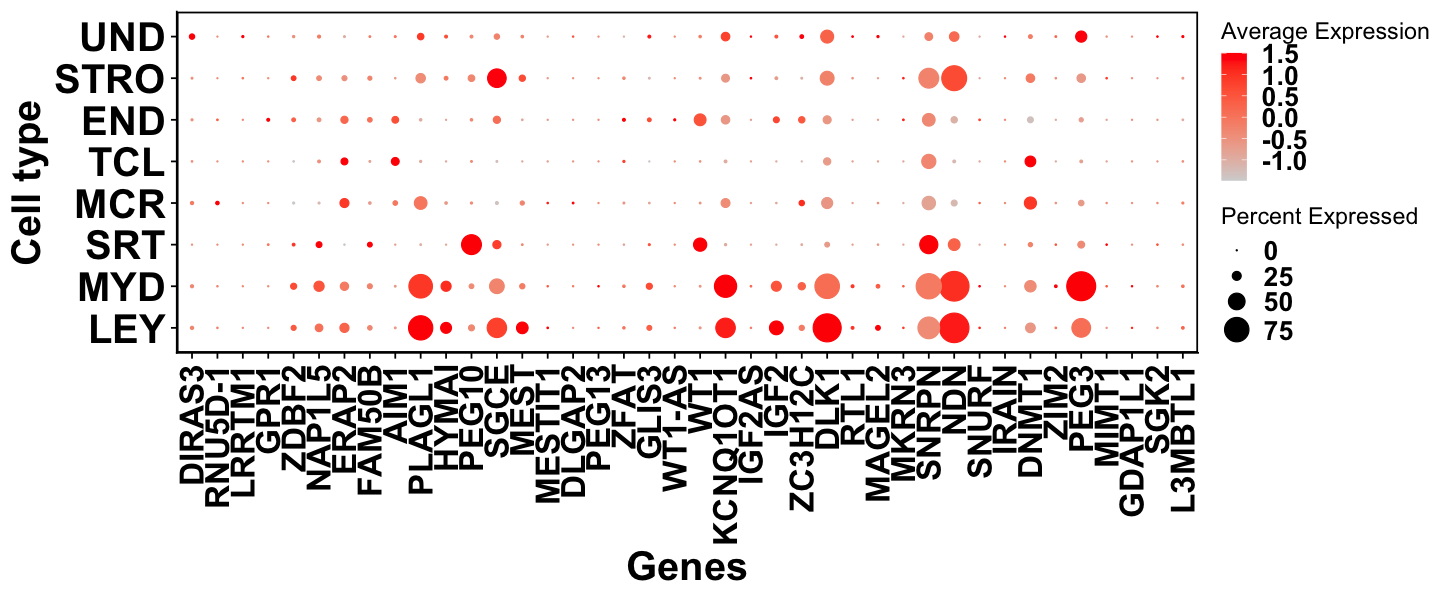

In [145]:
options(repr.plot.width=12, repr.plot.height=5)
Seurat_object <- azoospermia.integrated.new
DefaultAssay(Seurat_object) <- "RNA"
markers.to.plot <- PG_azoospermia
dp = DotPlot(Seurat_object, 
        col.min = -1.5,
        col.max = 1.5,
        features = rev(markers.to.plot), 
        cols = c("lightgrey", "red"), 
        dot.scale = 8) +
RotatedAxis() +
theme(axis.text.x = element_text(angle = 90, color = "black", face = "bold", size=20, vjust =.5, hjust =1), 
      axis.title.x = element_text(face = "bold", color = "black", size = 24),
      axis.text.y = element_text(angle = 0, face = "bold", color = "black", size=24),
      axis.title.y = element_text(face = "bold", color = "black", size = 24),
      legend.text = element_text(face = "bold", color = "black", size = 16),
      legend.position="right",
      panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "Genes", y = "Cell type")

dp

jpeg(paste(PD,'Paternal_genes_expression_inClusters_DotPlot.jpg',sep=''),width=1300, height=500, unit='px')
plot(dp)
dev.off()

pdf(paste(PD,'Paternal_genes_expression_inClusters_DotPlot.pdf',sep=''),width=13, height=7.5)
plot(dp)
dev.off()

In [174]:
Plot_sign <- function(Seraut.object, signature, operator = sum, title = '') {
    x <- Seraut.object
    DefaultAssay(x) <- "RNA"
    x[["Sign_exp"]] <- apply(FetchData(object = x, 
                                       vars = signature),
                             1,
                             operator)
    FP <- FeaturePlot(x, reduction = "umap", 
                      features = 'Sign_exp', 
                      label = T, 
                      order=T,
                      cols = c("lightgrey", "red")) +
    scale_x_continuous(breaks = c(-15,-10,-5,0,5,10))+
    scale_y_continuous(breaks = c(-15,-10,-5,0,5,10))+
                      #cols = as.vector(coolwarm(5))) ++
    theme(axis.text.x = element_text(angle = 90, color = "black", face = "bold", size=24, vjust =.5, hjust =1), 
      axis.title.x = element_text(face = "bold", color = "black", size = 24),
      axis.text.y = element_text(angle = 0, face = "bold", color = "black", size=24),
      axis.title.y = element_text(face = "bold", color = "black", size = 24),
      legend.text = element_text(face = "bold", color = "black", size = 16),
      legend.position="right",
      panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
    labs(title = title, 
         x = "UMAP 1", y = "UMAP 2") 
    return(FP)
    }

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



pdf 
  2

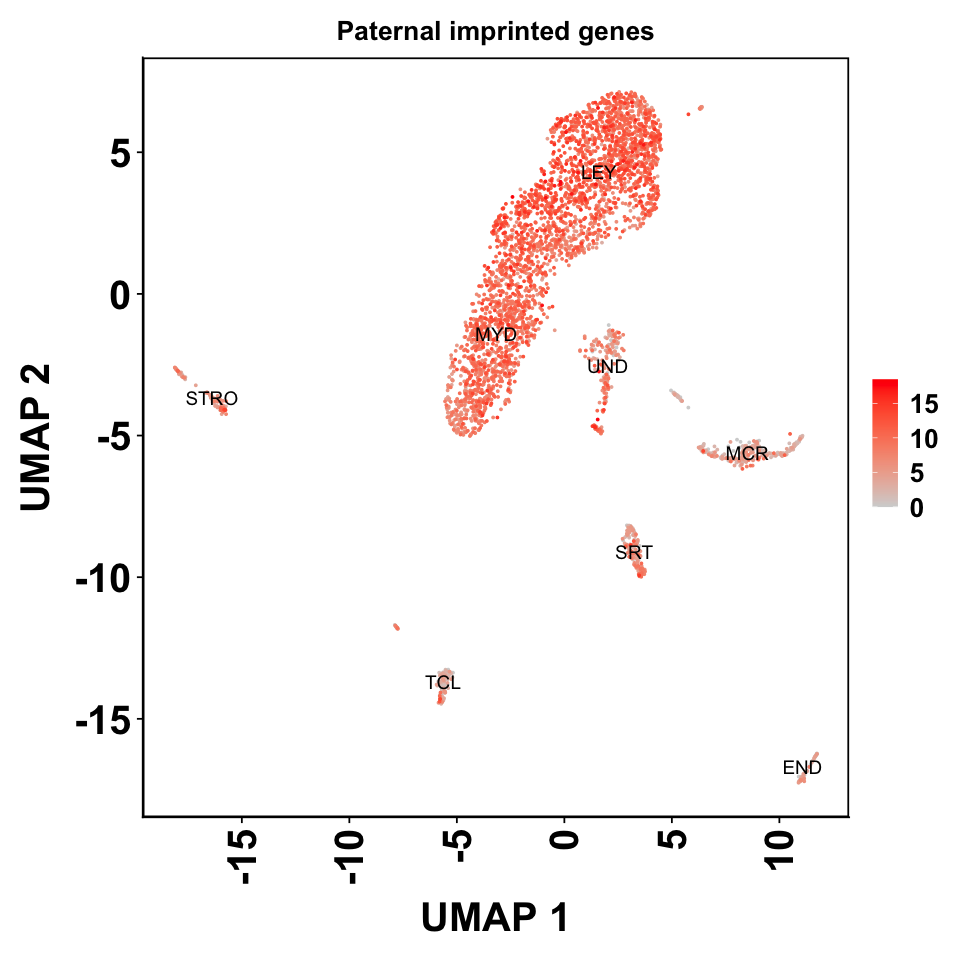

In [175]:
Seurat_object <- azoospermia.integrated.new
pat_signature <- Plot_sign(Seurat.object,
                           signature= PG_azoospermia, 
                           operator = sum, 
                          title = 'Paternal imprinted genes')
options(repr.plot.width=8, repr.plot.height=8)
pat_signature
pdf(paste(PD,'Paternal_genes_expression_SignatureSUM.pdf',sep=''),width=8, height=7)
plot(pat_signature)
dev.off()

pdf 
  2

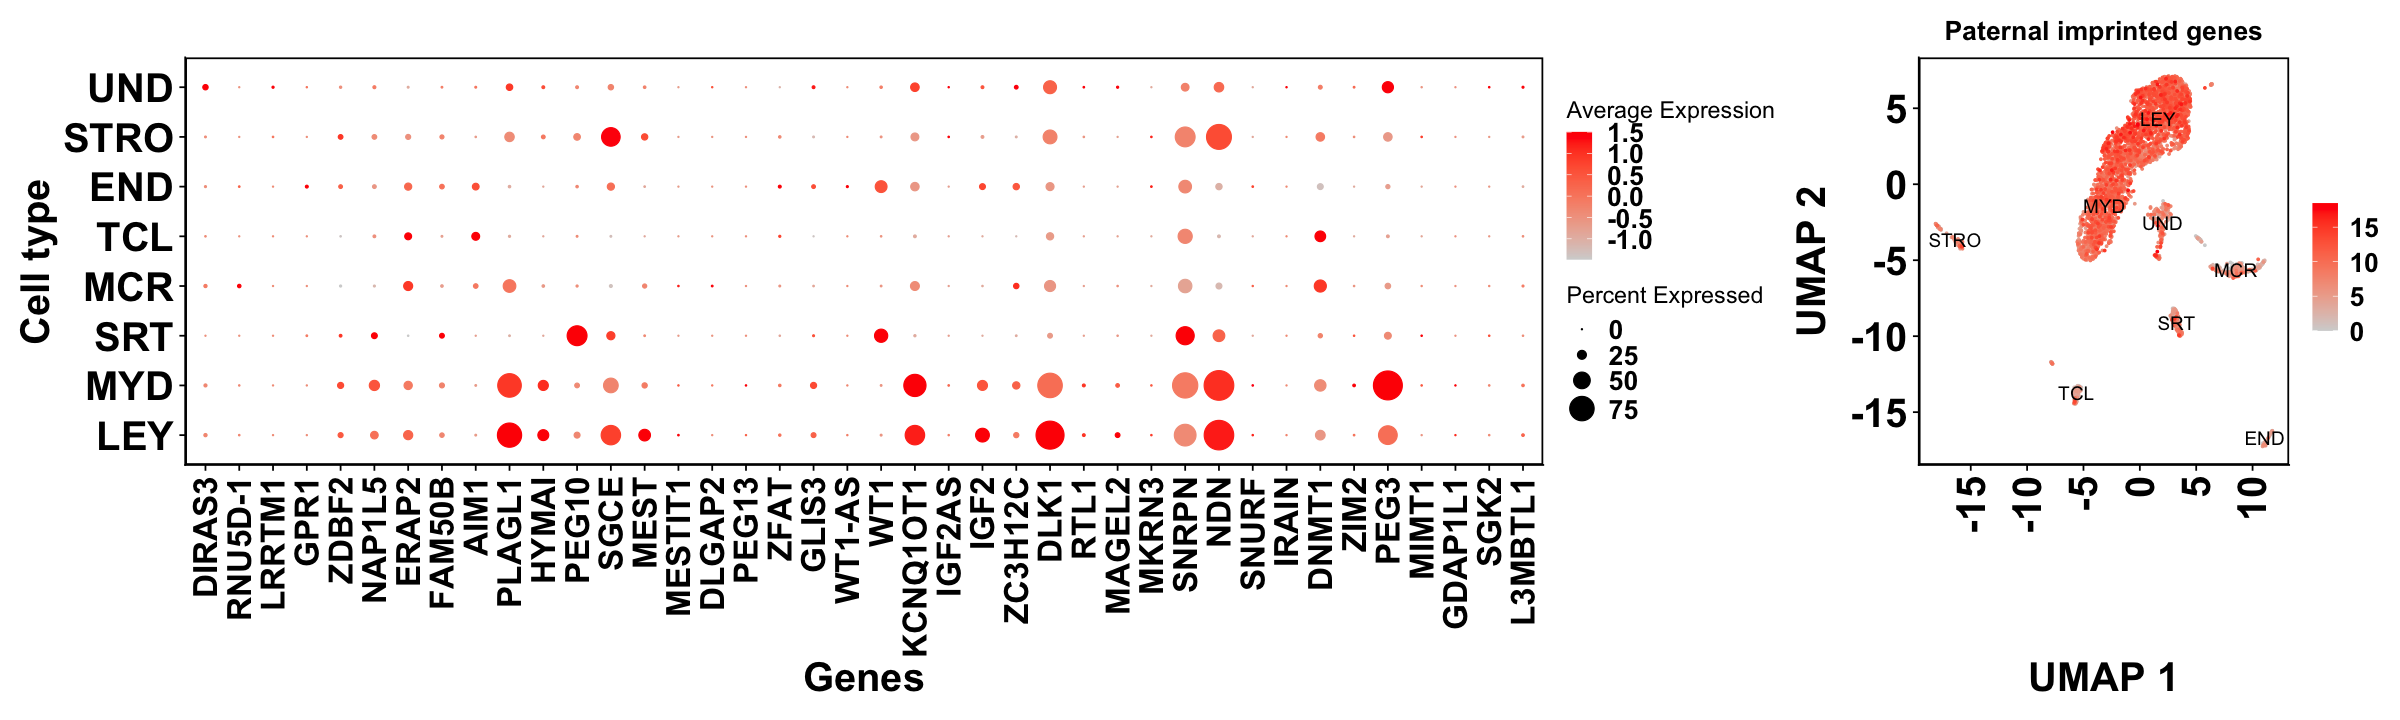

In [178]:
layout <- '
BBBBBBBBBBBAAA
BBBBBBBBBBBAAA
BBBBBBBBBBBAAA
BBBBBBBBBBBAAA
'
options(repr.plot.width=20, repr.plot.height=6)
wrap_plots(A = pat_signature, B = dp, design = layout) 

pdf(paste(outdir,"Figure1_panel_E.pdf",sep=''),  width=20, height=6)
wrap_plots(A = pat_signature, B = dp, design = layout) 
dev.off()

im = image_read_pdf(paste(outdir,"Figure1/Figure1_panel_E.pdf",sep=''),density = 140)
image_write(im, path = paste(outdir,"Figure1/Figure1_panel_E.tiff", sep=''), format = "tiff")

In [ ]:
Seurat_object <- azoospermia.integrated.new
for (gene in PG_azoospermia) {
    fp <- FeaturePlot(Seurat_object, 
            reduction = "umap", 
            pt.size = 1,
            features = gene,
            max.cutoff = 'q99',
            label = T, 
            order=T,
            cols = c("lightgrey", "red")) + theme(legend.position = 'right')

    jpeg(paste(PD,'FeaturePlot.',gene,'.jpg',sep=''),width=1000, height=500, unit='px')
    plot(fp)
    dev.off()
}


In [ ]:
PG_count = as.data.frame(azoospermia.integrated.new@assays$RNA@counts[PG_azoospermia,])
df = data.frame()
for (gene in PG_azoospermia) {
    df.tmp = data.frame(count = as.numeric(PG_count[gene,]),
                       Gene = gene)
    df = rbind(df,df.tmp)
}

In [ ]:
p <- ggplot(df, aes(x=Gene, y=count+1, fill = Gene)) + 
geom_boxplot() +
scale_y_continuous(trans='log10') +
theme(plot.title = element_text(color="black", size=26, face="bold.italic"),
      axis.text.x = element_text(angle = 90, face = "bold", color = "black", size=22, vjust =.5, hjust =1), 
      axis.title.x = element_text(face = "bold", color = "black", size = 24),
      axis.text.y = element_text(angle = 0, face = "bold", color = "black", size=22),
      axis.title.y = element_text(face = "bold", color = "black", size = 24),
      legend.text = element_text(face = "bold", color = "black", size = 12),
      legend.position="top",
      panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "Genes", y = "Log Expression Level") + NoLegend()
options(repr.plot.width=16, repr.plot.height=5)
p

jpeg(paste(PD,'Paternal_genes_expression.jpg',sep=''),width=1600, height=500, unit='px')
plot(p)
dev.off()

In [ ]:
df = data.frame()
for (gene in PG_azoospermia) {
    df.tmp = data.frame(count = PG_count[gene,][PG_count[gene,]!=0],
                       Gene = gene)
    df = rbind(df,df.tmp)
}
p <- ggplot(df, aes(x=Gene, y=count, fill = Gene)) + 
geom_boxplot() +
scale_y_continuous(trans='log10') +
theme(plot.title = element_text(color="black", size=26, face="bold.italic"),
      axis.text.x = element_text(angle = 90, face = "bold", color = "black", size=22, hjust =1), 
      axis.title.x = element_text(face = "bold", color = "black", size = 24),
      axis.text.y = element_text(angle = 0, face = "bold", color = "black", size=22),
      axis.title.y = element_text(face = "bold", color = "black", size = 24),
      legend.text = element_text(face = "bold", color = "black", size = 12),
      legend.position="top",
      panel.background = element_rect(fill = "white",colour = "black", size = 1, linetype = "solid")) +
labs(x = "UMAP 1", y = "UMAP 2") + NoLegend()
p


In [255]:
save('/Users/tascini.annasofia/Documents/AlfanoM/azoospermia.RData')

ERROR: Error in save("/Users/tascini.annasofia/Documents/AlfanoM/azoospermia.RData"): object ‘/Users/tascini.annasofia/Documents/AlfanoM/azoospermia.RData’ not found
